In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=None,fileName=None):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook,scheduler=scheduler)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    if fileName != None:
        errorFile = fileName + "_error.pdf"
        accFile = fileName + "_acc.pdf"
        fig_1.tight_layout() # This minimises whitespace around the axes. 
        fig_1.savefig(errorFile)
        fig_2.tight_layout() # This minimises whitespace around the axes. 
        fig_2.savefig(accFile)
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x7f0520639b70>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f0520639b70>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x7f0520639390>)


learning_rate 0.0225
epoch 1


Epoch 1: 2.9s to complete
    error(train)=1.49e+00, acc(train)=5.80e-01, error(valid)=1.50e+00, acc(valid)=5.77e-01


learning_rate 0.022495065603657317
epoch 2


Epoch 2: 2.9s to complete
    error(train)=1.15e+00, acc(train)=6.68e-01, error(valid)=1.16e+00, acc(valid)=6.68e-01


learning_rate 0.022480267284282714
epoch 3


Epoch 3: 3.0s to complete
    error(train)=9.74e-01, acc(train)=7.14e-01, error(valid)=9.89e-01, acc(valid)=7.09e-01


learning_rate 0.022455619646030798
epoch 4


Epoch 4: 3.0s to complete
    error(train)=8.62e-01, acc(train)=7.42e-01, error(valid)=8.80e-01, acc(valid)=7.36e-01


learning_rate 0.02242114701314478
epoch 5


Epoch 5: 3.0s to complete
    error(train)=7.80e-01, acc(train)=7.63e-01, error(valid)=8.00e-01, acc(valid)=7.58e-01


learning_rate 0.022376883405951377
epoch 6


Epoch 6: 2.9s to complete
    error(train)=7.33e-01, acc(train)=7.74e-01, error(valid)=7.58e-01, acc(valid)=7.66e-01


learning_rate 0.022322872507286887
epoch 7


Epoch 7: 2.9s to complete
    error(train)=6.82e-01, acc(train)=7.87e-01, error(valid)=7.13e-01, acc(valid)=7.79e-01


learning_rate 0.022259167619387475
epoch 8


Epoch 8: 3.0s to complete
    error(train)=6.45e-01, acc(train)=7.99e-01, error(valid)=6.77e-01, acc(valid)=7.90e-01


learning_rate 0.02218583161128631
epoch 9


Epoch 9: 2.9s to complete
    error(train)=6.23e-01, acc(train)=8.04e-01, error(valid)=6.64e-01, acc(valid)=7.91e-01


learning_rate 0.02210293685676943
epoch 10


Epoch 10: 3.0s to complete
    error(train)=5.92e-01, acc(train)=8.12e-01, error(valid)=6.30e-01, acc(valid)=7.99e-01


learning_rate 0.022010565162951537
epoch 11


Epoch 11: 3.1s to complete
    error(train)=5.65e-01, acc(train)=8.20e-01, error(valid)=6.09e-01, acc(valid)=8.06e-01


learning_rate 0.021908807689542256
epoch 12


Epoch 12: 3.0s to complete
    error(train)=5.45e-01, acc(train)=8.26e-01, error(valid)=5.94e-01, acc(valid)=8.10e-01


learning_rate 0.02179776485888251
epoch 13


Epoch 13: 3.0s to complete
    error(train)=5.31e-01, acc(train)=8.29e-01, error(valid)=5.87e-01, acc(valid)=8.13e-01


learning_rate 0.02167754625683981
epoch 14


Epoch 14: 3.0s to complete
    error(train)=5.17e-01, acc(train)=8.32e-01, error(valid)=5.73e-01, acc(valid)=8.13e-01


learning_rate 0.021548270524660195
epoch 15


Epoch 15: 3.0s to complete
    error(train)=5.03e-01, acc(train)=8.35e-01, error(valid)=5.66e-01, acc(valid)=8.15e-01


learning_rate 0.02141006524188368
epoch 16


Epoch 16: 3.1s to complete
    error(train)=4.88e-01, acc(train)=8.40e-01, error(valid)=5.54e-01, acc(valid)=8.20e-01


learning_rate 0.021263066800438633
epoch 17


Epoch 17: 3.0s to complete
    error(train)=4.83e-01, acc(train)=8.41e-01, error(valid)=5.52e-01, acc(valid)=8.20e-01


learning_rate 0.021107420270039437
epoch 18


Epoch 18: 3.1s to complete
    error(train)=4.75e-01, acc(train)=8.43e-01, error(valid)=5.46e-01, acc(valid)=8.22e-01


learning_rate 0.02094327925502015
epoch 19


Epoch 19: 3.0s to complete
    error(train)=4.62e-01, acc(train)=8.49e-01, error(valid)=5.38e-01, acc(valid)=8.25e-01


learning_rate 0.020770805742745615
epoch 20


Epoch 20: 3.1s to complete
    error(train)=4.61e-01, acc(train)=8.47e-01, error(valid)=5.43e-01, acc(valid)=8.22e-01


learning_rate 0.020590169943749473
epoch 21


Epoch 21: 3.1s to complete
    error(train)=4.49e-01, acc(train)=8.47e-01, error(valid)=5.30e-01, acc(valid)=8.21e-01


learning_rate 0.020401550123756905
epoch 22


Epoch 22: 3.0s to complete
    error(train)=4.49e-01, acc(train)=8.50e-01, error(valid)=5.35e-01, acc(valid)=8.26e-01


learning_rate 0.020205132427757892
epoch 23


Epoch 23: 3.1s to complete
    error(train)=4.37e-01, acc(train)=8.54e-01, error(valid)=5.27e-01, acc(valid)=8.26e-01


learning_rate 0.020001110696304596
epoch 24


Epoch 24: 3.1s to complete
    error(train)=4.31e-01, acc(train)=8.55e-01, error(valid)=5.22e-01, acc(valid)=8.28e-01


learning_rate 0.019789686274214114
epoch 25


Epoch 25: 3.1s to complete
    error(train)=4.14e-01, acc(train)=8.61e-01, error(valid)=5.11e-01, acc(valid)=8.31e-01


learning_rate 0.019571067811865475
epoch 26


Epoch 26: 3.0s to complete
    error(train)=4.25e-01, acc(train)=8.56e-01, error(valid)=5.23e-01, acc(valid)=8.27e-01


learning_rate 0.019345471059286887
epoch 27


Epoch 27: 3.0s to complete
    error(train)=4.01e-01, acc(train)=8.64e-01, error(valid)=5.03e-01, acc(valid)=8.31e-01


learning_rate 0.01911311865323652
epoch 28


Epoch 28: 3.0s to complete
    error(train)=4.00e-01, acc(train)=8.65e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


learning_rate 0.018874239897486895
epoch 29


Epoch 29: 3.0s to complete
    error(train)=3.99e-01, acc(train)=8.64e-01, error(valid)=5.10e-01, acc(valid)=8.29e-01


learning_rate 0.018629070536529766
epoch 30


Epoch 30: 3.0s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.02e-01, acc(valid)=8.34e-01


learning_rate 0.01837785252292473
epoch 31


Epoch 31: 3.0s to complete
    error(train)=3.90e-01, acc(train)=8.67e-01, error(valid)=5.06e-01, acc(valid)=8.33e-01


learning_rate 0.018120833778521306
epoch 32


Epoch 32: 3.0s to complete
    error(train)=3.81e-01, acc(train)=8.69e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


learning_rate 0.017858267949789966
epoch 33


Epoch 33: 3.0s to complete
    error(train)=3.81e-01, acc(train)=8.70e-01, error(valid)=5.01e-01, acc(valid)=8.34e-01


learning_rate 0.017590414157503714
epoch 34


Epoch 34: 3.0s to complete
    error(train)=3.71e-01, acc(train)=8.74e-01, error(valid)=4.95e-01, acc(valid)=8.36e-01


learning_rate 0.017317536741017152
epoch 35


Epoch 35: 3.0s to complete
    error(train)=3.70e-01, acc(train)=8.74e-01, error(valid)=5.00e-01, acc(valid)=8.36e-01


learning_rate 0.017039904997395466
epoch 36


Epoch 36: 3.0s to complete
    error(train)=3.70e-01, acc(train)=8.74e-01, error(valid)=4.99e-01, acc(valid)=8.33e-01


learning_rate 0.016757792915650726
epoch 37


Epoch 37: 2.9s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


learning_rate 0.016471478906347804
epoch 38


Epoch 38: 3.0s to complete
    error(train)=3.77e-01, acc(train)=8.69e-01, error(valid)=5.13e-01, acc(valid)=8.32e-01


learning_rate 0.016181245526846782
epoch 39


Epoch 39: 3.0s to complete
    error(train)=3.60e-01, acc(train)=8.76e-01, error(valid)=4.98e-01, acc(valid)=8.35e-01


learning_rate 0.015887379202452916
epoch 40


Epoch 40: 3.0s to complete
    error(train)=3.51e-01, acc(train)=8.79e-01, error(valid)=4.94e-01, acc(valid)=8.36e-01


learning_rate 0.015590169943749475
epoch 41


Epoch 41: 3.0s to complete
    error(train)=3.50e-01, acc(train)=8.79e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


learning_rate 0.015289911060392295
epoch 42


Epoch 42: 3.0s to complete
    error(train)=3.45e-01, acc(train)=8.82e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


learning_rate 0.014986898871648552
epoch 43


Epoch 43: 3.0s to complete
    error(train)=3.48e-01, acc(train)=8.79e-01, error(valid)=4.96e-01, acc(valid)=8.37e-01


learning_rate 0.014681432413965427
epoch 44


Epoch 44: 3.0s to complete
    error(train)=3.40e-01, acc(train)=8.83e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


learning_rate 0.014373813145857249
epoch 45


Epoch 45: 3.0s to complete
    error(train)=3.37e-01, acc(train)=8.83e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


learning_rate 0.01406434465040231
epoch 46


Epoch 46: 2.9s to complete
    error(train)=3.32e-01, acc(train)=8.86e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


learning_rate 0.013753332335643043
epoch 47


Epoch 47: 3.0s to complete
    error(train)=3.30e-01, acc(train)=8.86e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


learning_rate 0.013441083133185146
epoch 48


Epoch 48: 3.0s to complete
    error(train)=3.31e-01, acc(train)=8.85e-01, error(valid)=4.94e-01, acc(valid)=8.35e-01


learning_rate 0.013127905195293135
epoch 49


Epoch 49: 3.0s to complete
    error(train)=3.30e-01, acc(train)=8.85e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


learning_rate 0.012814107590781283
epoch 50


Epoch 50: 3.0s to complete
    error(train)=3.25e-01, acc(train)=8.87e-01, error(valid)=4.91e-01, acc(valid)=8.37e-01


learning_rate 0.0125
epoch 51


Epoch 51: 3.0s to complete
    error(train)=3.23e-01, acc(train)=8.89e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


learning_rate 0.012185892409218718
epoch 52


Epoch 52: 3.0s to complete
    error(train)=3.20e-01, acc(train)=8.89e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


learning_rate 0.011872094804706867
epoch 53


Epoch 53: 3.2s to complete
    error(train)=3.20e-01, acc(train)=8.88e-01, error(valid)=4.93e-01, acc(valid)=8.39e-01


learning_rate 0.011558916866814857
epoch 54


Epoch 54: 3.4s to complete
    error(train)=3.19e-01, acc(train)=8.88e-01, error(valid)=4.98e-01, acc(valid)=8.39e-01


learning_rate 0.011246667664356957
epoch 55


Epoch 55: 3.3s to complete
    error(train)=3.17e-01, acc(train)=8.90e-01, error(valid)=4.94e-01, acc(valid)=8.39e-01


learning_rate 0.01093565534959769
epoch 56


Epoch 56: 3.6s to complete
    error(train)=3.13e-01, acc(train)=8.91e-01, error(valid)=4.93e-01, acc(valid)=8.39e-01


learning_rate 0.010626186854142752
epoch 57


Epoch 57: 3.1s to complete
    error(train)=3.09e-01, acc(train)=8.93e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


learning_rate 0.010318567586034577
epoch 58


Epoch 58: 3.1s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=4.96e-01, acc(valid)=8.37e-01


learning_rate 0.010013101128351454
epoch 59


Epoch 59: 3.0s to complete
    error(train)=3.06e-01, acc(train)=8.93e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


learning_rate 0.009710088939607708
epoch 60


Epoch 60: 3.0s to complete
    error(train)=3.08e-01, acc(train)=8.92e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


learning_rate 0.009409830056250526
epoch 61


Epoch 61: 3.0s to complete
    error(train)=3.02e-01, acc(train)=8.95e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


learning_rate 0.009112620797547086
epoch 62


Epoch 62: 3.0s to complete
    error(train)=3.02e-01, acc(train)=8.95e-01, error(valid)=4.95e-01, acc(valid)=8.40e-01


learning_rate 0.008818754473153221
epoch 63


Epoch 63: 2.9s to complete
    error(train)=2.99e-01, acc(train)=8.95e-01, error(valid)=4.93e-01, acc(valid)=8.38e-01


learning_rate 0.008528521093652194
epoch 64


Epoch 64: 3.0s to complete
    error(train)=2.98e-01, acc(train)=8.97e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


learning_rate 0.008242207084349274
epoch 65


Epoch 65: 2.9s to complete
    error(train)=2.99e-01, acc(train)=8.95e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


learning_rate 0.007960095002604533
epoch 66


Epoch 66: 3.1s to complete
    error(train)=2.96e-01, acc(train)=8.96e-01, error(valid)=4.95e-01, acc(valid)=8.40e-01


learning_rate 0.007682463258982846
epoch 67


Epoch 67: 3.0s to complete
    error(train)=2.95e-01, acc(train)=8.96e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


learning_rate 0.007409585842496288
epoch 68


Epoch 68: 3.1s to complete
    error(train)=2.93e-01, acc(train)=8.97e-01, error(valid)=4.96e-01, acc(valid)=8.38e-01


learning_rate 0.007141732050210032
epoch 69


Epoch 69: 3.0s to complete
    error(train)=2.92e-01, acc(train)=8.98e-01, error(valid)=4.97e-01, acc(valid)=8.38e-01


learning_rate 0.006879166221478697
epoch 70


Epoch 70: 3.0s to complete
    error(train)=2.89e-01, acc(train)=9.00e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


learning_rate 0.00662214747707527
epoch 71


Epoch 71: 2.9s to complete
    error(train)=2.91e-01, acc(train)=8.99e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


learning_rate 0.006370929463470237
epoch 72


Epoch 72: 3.0s to complete
    error(train)=2.87e-01, acc(train)=9.01e-01, error(valid)=4.95e-01, acc(valid)=8.39e-01


learning_rate 0.006125760102513103
epoch 73


Epoch 73: 3.0s to complete
    error(train)=2.87e-01, acc(train)=8.99e-01, error(valid)=4.96e-01, acc(valid)=8.40e-01


learning_rate 0.005886881346763483
epoch 74


Epoch 74: 3.0s to complete
    error(train)=2.85e-01, acc(train)=9.00e-01, error(valid)=4.98e-01, acc(valid)=8.39e-01


learning_rate 0.005654528940713112
epoch 75


Epoch 75: 3.0s to complete
    error(train)=2.84e-01, acc(train)=9.01e-01, error(valid)=4.96e-01, acc(valid)=8.40e-01


learning_rate 0.005428932188134525
epoch 76


Epoch 76: 3.0s to complete
    error(train)=2.83e-01, acc(train)=9.01e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


learning_rate 0.005210313725785887
epoch 77


Epoch 77: 3.0s to complete
    error(train)=2.82e-01, acc(train)=9.01e-01, error(valid)=4.98e-01, acc(valid)=8.40e-01


learning_rate 0.004998889303695404
epoch 78


Epoch 78: 3.0s to complete
    error(train)=2.82e-01, acc(train)=9.01e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


learning_rate 0.004794867572242109
epoch 79


Epoch 79: 2.9s to complete
    error(train)=2.82e-01, acc(train)=9.01e-01, error(valid)=5.01e-01, acc(valid)=8.36e-01


learning_rate 0.004598449876243096
epoch 80


Epoch 80: 3.0s to complete
    error(train)=2.81e-01, acc(train)=9.02e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


learning_rate 0.004409830056250527
epoch 81


Epoch 81: 2.9s to complete
    error(train)=2.80e-01, acc(train)=9.02e-01, error(valid)=4.99e-01, acc(valid)=8.40e-01


learning_rate 0.0042291942572543805
epoch 82


Epoch 82: 3.0s to complete
    error(train)=2.78e-01, acc(train)=9.03e-01, error(valid)=4.98e-01, acc(valid)=8.40e-01


learning_rate 0.004056720744979852
epoch 83


Epoch 83: 3.0s to complete
    error(train)=2.78e-01, acc(train)=9.03e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


learning_rate 0.003892579729960565
epoch 84


Epoch 84: 3.1s to complete
    error(train)=2.78e-01, acc(train)=9.03e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


learning_rate 0.003736933199561366
epoch 85


Epoch 85: 3.0s to complete
    error(train)=2.76e-01, acc(train)=9.05e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


learning_rate 0.0035899347581163222
epoch 86


Epoch 86: 3.0s to complete
    error(train)=2.77e-01, acc(train)=9.03e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


learning_rate 0.0034517294753398063
epoch 87


Epoch 87: 3.0s to complete
    error(train)=2.76e-01, acc(train)=9.03e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


learning_rate 0.0033224537431601887
epoch 88


Epoch 88: 3.0s to complete
    error(train)=2.75e-01, acc(train)=9.04e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


learning_rate 0.0032022351411174865
epoch 89


Epoch 89: 3.0s to complete
    error(train)=2.74e-01, acc(train)=9.04e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


learning_rate 0.0030911923104577454
epoch 90


Epoch 90: 2.9s to complete
    error(train)=2.74e-01, acc(train)=9.04e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


learning_rate 0.002989434837048465
epoch 91


Epoch 91: 3.1s to complete
    error(train)=2.73e-01, acc(train)=9.05e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


learning_rate 0.0028970631432305694
epoch 92


Epoch 92: 3.0s to complete
    error(train)=2.74e-01, acc(train)=9.04e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


learning_rate 0.0028141683887136894
epoch 93


Epoch 93: 3.0s to complete
    error(train)=2.74e-01, acc(train)=9.04e-01, error(valid)=5.04e-01, acc(valid)=8.39e-01


learning_rate 0.0027408323806125258
epoch 94


Epoch 94: 3.0s to complete
    error(train)=2.73e-01, acc(train)=9.05e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


learning_rate 0.002677127492713114
epoch 95


Epoch 95: 3.0s to complete
    error(train)=2.72e-01, acc(train)=9.05e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


learning_rate 0.0026231165940486236
epoch 96


Epoch 96: 2.9s to complete
    error(train)=2.72e-01, acc(train)=9.06e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


learning_rate 0.0025788529868552225
epoch 97


Epoch 97: 2.9s to complete
    error(train)=2.71e-01, acc(train)=9.06e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


learning_rate 0.0025443803539692
epoch 98


Epoch 98: 3.0s to complete
    error(train)=2.70e-01, acc(train)=9.06e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


learning_rate 0.0025197327157172843
epoch 99


Epoch 99: 2.9s to complete
    error(train)=2.70e-01, acc(train)=9.05e-01, error(valid)=5.05e-01, acc(valid)=8.38e-01


learning_rate 0.0025049343963426843
epoch 100


Epoch 100: 3.0s to complete
    error(train)=2.70e-01, acc(train)=9.06e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


learning_rate 0.0375
epoch 1


Epoch 1: 2.9s to complete
    error(train)=1.25e+00, acc(train)=6.39e-01, error(valid)=1.26e+00, acc(valid)=6.36e-01


learning_rate 0.03749111808658317
epoch 2


Epoch 2: 3.0s to complete
    error(train)=9.25e-01, acc(train)=7.25e-01, error(valid)=9.36e-01, acc(valid)=7.18e-01


learning_rate 0.037464481111708886
epoch 3


Epoch 3: 3.0s to complete
    error(train)=7.91e-01, acc(train)=7.59e-01, error(valid)=8.09e-01, acc(valid)=7.54e-01


learning_rate 0.03742011536285544
epoch 4


Epoch 4: 3.0s to complete
    error(train)=7.04e-01, acc(train)=7.82e-01, error(valid)=7.32e-01, acc(valid)=7.74e-01


learning_rate 0.037358064623660606
epoch 5


Epoch 5: 2.9s to complete
    error(train)=6.45e-01, acc(train)=7.96e-01, error(valid)=6.74e-01, acc(valid)=7.86e-01


learning_rate 0.03727839013071248
epoch 6


Epoch 6: 3.0s to complete
    error(train)=6.03e-01, acc(train)=8.04e-01, error(valid)=6.42e-01, acc(valid)=7.92e-01


learning_rate 0.037181170513116396
epoch 7


Epoch 7: 2.9s to complete
    error(train)=5.87e-01, acc(train)=8.10e-01, error(valid)=6.31e-01, acc(valid)=7.95e-01


learning_rate 0.037066501714897455
epoch 8


Epoch 8: 3.0s to complete
    error(train)=5.50e-01, acc(train)=8.20e-01, error(valid)=6.02e-01, acc(valid)=8.05e-01


learning_rate 0.03693449690031536
epoch 9


Epoch 9: 3.0s to complete
    error(train)=5.17e-01, acc(train)=8.31e-01, error(valid)=5.74e-01, acc(valid)=8.12e-01


learning_rate 0.036785286342184975
epoch 10


Epoch 10: 3.0s to complete
    error(train)=4.95e-01, acc(train)=8.36e-01, error(valid)=5.55e-01, acc(valid)=8.17e-01


learning_rate 0.03661901729331277
epoch 11


Epoch 11: 3.0s to complete
    error(train)=4.92e-01, acc(train)=8.33e-01, error(valid)=5.57e-01, acc(valid)=8.14e-01


learning_rate 0.03643585384117606
epoch 12


Epoch 12: 3.0s to complete
    error(train)=4.65e-01, acc(train)=8.45e-01, error(valid)=5.35e-01, acc(valid)=8.23e-01


learning_rate 0.036235976745988524
epoch 13


Epoch 13: 3.0s to complete
    error(train)=4.53e-01, acc(train)=8.48e-01, error(valid)=5.29e-01, acc(valid)=8.26e-01


learning_rate 0.03601958326231166
epoch 14


Epoch 14: 3.0s to complete
    error(train)=4.40e-01, acc(train)=8.51e-01, error(valid)=5.23e-01, acc(valid)=8.29e-01


learning_rate 0.03578688694438835
epoch 15


Epoch 15: 3.0s to complete
    error(train)=4.26e-01, acc(train)=8.55e-01, error(valid)=5.15e-01, acc(valid)=8.29e-01


learning_rate 0.03553811743539062
epoch 16


Epoch 16: 3.0s to complete
    error(train)=4.15e-01, acc(train)=8.59e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


learning_rate 0.035273520240789544
epoch 17


Epoch 17: 3.0s to complete
    error(train)=4.07e-01, acc(train)=8.61e-01, error(valid)=5.05e-01, acc(valid)=8.33e-01


learning_rate 0.034993356486070985
epoch 18


Epoch 18: 3.0s to complete
    error(train)=4.16e-01, acc(train)=8.57e-01, error(valid)=5.19e-01, acc(valid)=8.28e-01


learning_rate 0.03469790265903627
epoch 19


Epoch 19: 3.0s to complete
    error(train)=3.96e-01, acc(train)=8.63e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


learning_rate 0.03438745033694211
epoch 20


Epoch 20: 3.0s to complete
    error(train)=3.83e-01, acc(train)=8.66e-01, error(valid)=4.95e-01, acc(valid)=8.35e-01


learning_rate 0.034062305898749055
epoch 21


Epoch 21: 3.0s to complete
    error(train)=3.77e-01, acc(train)=8.68e-01, error(valid)=4.93e-01, acc(valid)=8.34e-01


learning_rate 0.03372279022276243
epoch 22


Epoch 22: 3.4s to complete
    error(train)=3.79e-01, acc(train)=8.68e-01, error(valid)=5.03e-01, acc(valid)=8.34e-01


learning_rate 0.03336923836996421
epoch 23


Epoch 23: 3.3s to complete
    error(train)=3.65e-01, acc(train)=8.71e-01, error(valid)=4.90e-01, acc(valid)=8.36e-01


learning_rate 0.03300199925334827
epoch 24


Epoch 24: 3.5s to complete
    error(train)=3.61e-01, acc(train)=8.74e-01, error(valid)=4.93e-01, acc(valid)=8.36e-01


learning_rate 0.0326214352935854
epoch 25


Epoch 25: 3.0s to complete
    error(train)=3.58e-01, acc(train)=8.73e-01, error(valid)=4.96e-01, acc(valid)=8.33e-01


learning_rate 0.03222792206135785
epoch 26


Epoch 26: 3.0s to complete
    error(train)=3.56e-01, acc(train)=8.74e-01, error(valid)=4.94e-01, acc(valid)=8.35e-01


learning_rate 0.0318218479067164
epoch 27


Epoch 27: 3.0s to complete
    error(train)=3.48e-01, acc(train)=8.77e-01, error(valid)=4.89e-01, acc(valid)=8.39e-01


learning_rate 0.03140361357582573
epoch 28


Epoch 28: 3.0s to complete
    error(train)=3.38e-01, acc(train)=8.79e-01, error(valid)=4.87e-01, acc(valid)=8.38e-01


learning_rate 0.030973631815476414
epoch 29


Epoch 29: 3.0s to complete
    error(train)=3.44e-01, acc(train)=8.77e-01, error(valid)=4.96e-01, acc(valid)=8.37e-01


learning_rate 0.030532326965753576
epoch 30


Epoch 30: 3.0s to complete
    error(train)=3.24e-01, acc(train)=8.85e-01, error(valid)=4.77e-01, acc(valid)=8.41e-01


learning_rate 0.030080134541264517
epoch 31


Epoch 31: 3.0s to complete
    error(train)=3.26e-01, acc(train)=8.85e-01, error(valid)=4.88e-01, acc(valid)=8.39e-01


learning_rate 0.02961750080133835
epoch 32


Epoch 32: 3.0s to complete
    error(train)=3.24e-01, acc(train)=8.83e-01, error(valid)=4.88e-01, acc(valid)=8.36e-01


learning_rate 0.029144882309621936
epoch 33


Epoch 33: 3.0s to complete
    error(train)=3.17e-01, acc(train)=8.86e-01, error(valid)=4.86e-01, acc(valid)=8.38e-01


learning_rate 0.028662745483506682
epoch 34


Epoch 34: 3.0s to complete
    error(train)=3.25e-01, acc(train)=8.82e-01, error(valid)=5.00e-01, acc(valid)=8.33e-01


learning_rate 0.028171566133830872
epoch 35


Epoch 35: 3.0s to complete
    error(train)=3.10e-01, acc(train)=8.88e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


learning_rate 0.027671828995311842
epoch 36


Epoch 36: 2.9s to complete
    error(train)=3.07e-01, acc(train)=8.89e-01, error(valid)=4.92e-01, acc(valid)=8.37e-01


learning_rate 0.027164027248171307
epoch 37


Epoch 37: 2.9s to complete
    error(train)=3.08e-01, acc(train)=8.87e-01, error(valid)=4.94e-01, acc(valid)=8.34e-01


learning_rate 0.02664866203142605
epoch 38


Epoch 38: 3.0s to complete
    error(train)=2.99e-01, acc(train)=8.94e-01, error(valid)=4.89e-01, acc(valid)=8.41e-01


learning_rate 0.026126241948324205
epoch 39


Epoch 39: 2.9s to complete
    error(train)=2.94e-01, acc(train)=8.95e-01, error(valid)=4.92e-01, acc(valid)=8.38e-01


learning_rate 0.02559728256441525
epoch 40


Epoch 40: 3.0s to complete
    error(train)=2.93e-01, acc(train)=8.95e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


learning_rate 0.025062305898749054
epoch 41


Epoch 41: 2.9s to complete
    error(train)=2.89e-01, acc(train)=8.96e-01, error(valid)=4.93e-01, acc(valid)=8.40e-01


learning_rate 0.024521839908706128
epoch 42


Epoch 42: 3.0s to complete
    error(train)=2.83e-01, acc(train)=8.98e-01, error(valid)=4.89e-01, acc(valid)=8.41e-01


learning_rate 0.023976417968967392
epoch 43


Epoch 43: 2.9s to complete
    error(train)=2.86e-01, acc(train)=8.96e-01, error(valid)=5.01e-01, acc(valid)=8.39e-01


learning_rate 0.02342657834513777
epoch 44


Epoch 44: 3.0s to complete
    error(train)=2.78e-01, acc(train)=8.99e-01, error(valid)=4.90e-01, acc(valid)=8.41e-01


learning_rate 0.022872863662543045
epoch 45


Epoch 45: 2.9s to complete
    error(train)=2.77e-01, acc(train)=9.00e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


learning_rate 0.022315820370724156
epoch 46


Epoch 46: 3.0s to complete
    error(train)=2.72e-01, acc(train)=9.02e-01, error(valid)=4.95e-01, acc(valid)=8.42e-01


learning_rate 0.021755998204157478
epoch 47


Epoch 47: 2.9s to complete
    error(train)=2.77e-01, acc(train)=8.98e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


learning_rate 0.021193949639733263
epoch 48


Epoch 48: 2.9s to complete
    error(train)=2.73e-01, acc(train)=8.99e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


learning_rate 0.020630229351527644
epoch 49


Epoch 49: 3.0s to complete
    error(train)=2.65e-01, acc(train)=9.04e-01, error(valid)=4.98e-01, acc(valid)=8.42e-01


learning_rate 0.02006539366340631
epoch 50


Epoch 50: 2.9s to complete
    error(train)=2.69e-01, acc(train)=9.02e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


learning_rate 0.0195
epoch 51


Epoch 51: 2.9s to complete
    error(train)=2.65e-01, acc(train)=9.04e-01, error(valid)=5.08e-01, acc(valid)=8.39e-01


learning_rate 0.01893460633659369
epoch 52


Epoch 52: 2.9s to complete
    error(train)=2.62e-01, acc(train)=9.04e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


learning_rate 0.01836977064847236
epoch 53


Epoch 53: 2.9s to complete
    error(train)=2.61e-01, acc(train)=9.04e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


learning_rate 0.017806050360266744
epoch 54


Epoch 54: 3.0s to complete
    error(train)=2.52e-01, acc(train)=9.10e-01, error(valid)=5.03e-01, acc(valid)=8.39e-01


learning_rate 0.017244001795842522
epoch 55


Epoch 55: 3.0s to complete
    error(train)=2.50e-01, acc(train)=9.10e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


learning_rate 0.01668417962927584
epoch 56


Epoch 56: 2.9s to complete
    error(train)=2.49e-01, acc(train)=9.11e-01, error(valid)=5.07e-01, acc(valid)=8.40e-01


learning_rate 0.01612713633745695
epoch 57


Epoch 57: 3.0s to complete
    error(train)=2.52e-01, acc(train)=9.07e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


learning_rate 0.015573421654862238
epoch 58


Epoch 58: 3.0s to complete
    error(train)=2.44e-01, acc(train)=9.12e-01, error(valid)=5.10e-01, acc(valid)=8.39e-01


learning_rate 0.015023582031032615
epoch 59


Epoch 59: 2.9s to complete
    error(train)=2.44e-01, acc(train)=9.12e-01, error(valid)=5.15e-01, acc(valid)=8.40e-01


learning_rate 0.014478160091293874
epoch 60


Epoch 60: 3.0s to complete
    error(train)=2.41e-01, acc(train)=9.13e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


learning_rate 0.013937694101250947
epoch 61


Epoch 61: 3.0s to complete
    error(train)=2.42e-01, acc(train)=9.13e-01, error(valid)=5.14e-01, acc(valid)=8.39e-01


learning_rate 0.013402717435584754
epoch 62


Epoch 62: 3.0s to complete
    error(train)=2.39e-01, acc(train)=9.13e-01, error(valid)=5.16e-01, acc(valid)=8.37e-01


learning_rate 0.012873758051675796
epoch 63


Epoch 63: 3.0s to complete
    error(train)=2.37e-01, acc(train)=9.14e-01, error(valid)=5.16e-01, acc(valid)=8.38e-01


learning_rate 0.012351337968573949
epoch 64


Epoch 64: 3.0s to complete
    error(train)=2.37e-01, acc(train)=9.14e-01, error(valid)=5.17e-01, acc(valid)=8.39e-01


learning_rate 0.011835972751828691
epoch 65


Epoch 65: 3.0s to complete
    error(train)=2.33e-01, acc(train)=9.16e-01, error(valid)=5.18e-01, acc(valid)=8.39e-01


learning_rate 0.011328171004688158
epoch 66


Epoch 66: 3.0s to complete
    error(train)=2.32e-01, acc(train)=9.17e-01, error(valid)=5.19e-01, acc(valid)=8.38e-01


learning_rate 0.010828433866169121
epoch 67


Epoch 67: 3.0s to complete
    error(train)=2.29e-01, acc(train)=9.17e-01, error(valid)=5.20e-01, acc(valid)=8.39e-01


learning_rate 0.010337254516493316
epoch 68


Epoch 68: 3.0s to complete
    error(train)=2.29e-01, acc(train)=9.17e-01, error(valid)=5.21e-01, acc(valid)=8.37e-01


learning_rate 0.009855117690378055
epoch 69


Epoch 69: 3.0s to complete
    error(train)=2.27e-01, acc(train)=9.19e-01, error(valid)=5.22e-01, acc(valid)=8.40e-01


learning_rate 0.009382499198661652
epoch 70


Epoch 70: 3.0s to complete
    error(train)=2.28e-01, acc(train)=9.18e-01, error(valid)=5.25e-01, acc(valid)=8.39e-01


learning_rate 0.008919865458735484
epoch 71


Epoch 71: 3.0s to complete
    error(train)=2.26e-01, acc(train)=9.19e-01, error(valid)=5.24e-01, acc(valid)=8.37e-01


learning_rate 0.008467673034246427
epoch 72


Epoch 72: 3.0s to complete
    error(train)=2.24e-01, acc(train)=9.20e-01, error(valid)=5.23e-01, acc(valid)=8.38e-01


learning_rate 0.008026368184523585
epoch 73


Epoch 73: 3.0s to complete
    error(train)=2.22e-01, acc(train)=9.19e-01, error(valid)=5.27e-01, acc(valid)=8.37e-01


learning_rate 0.007596386424174269
epoch 74


Epoch 74: 3.0s to complete
    error(train)=2.24e-01, acc(train)=9.19e-01, error(valid)=5.27e-01, acc(valid)=8.37e-01


learning_rate 0.007178152093283603
epoch 75


Epoch 75: 3.0s to complete
    error(train)=2.20e-01, acc(train)=9.22e-01, error(valid)=5.25e-01, acc(valid)=8.40e-01


learning_rate 0.0067720779386421445
epoch 76


Epoch 76: 3.0s to complete
    error(train)=2.22e-01, acc(train)=9.20e-01, error(valid)=5.29e-01, acc(valid)=8.37e-01


learning_rate 0.006378564706414595
epoch 77


Epoch 77: 3.0s to complete
    error(train)=2.20e-01, acc(train)=9.20e-01, error(valid)=5.29e-01, acc(valid)=8.37e-01


learning_rate 0.005998000746651726
epoch 78


Epoch 78: 3.1s to complete
    error(train)=2.20e-01, acc(train)=9.21e-01, error(valid)=5.30e-01, acc(valid)=8.36e-01


learning_rate 0.005630761630035796
epoch 79


Epoch 79: 3.0s to complete
    error(train)=2.17e-01, acc(train)=9.23e-01, error(valid)=5.29e-01, acc(valid)=8.38e-01


learning_rate 0.005277209777237573
epoch 80


Epoch 80: 3.0s to complete
    error(train)=2.18e-01, acc(train)=9.22e-01, error(valid)=5.31e-01, acc(valid)=8.39e-01


learning_rate 0.004937694101250948
epoch 81


Epoch 81: 3.0s to complete
    error(train)=2.16e-01, acc(train)=9.24e-01, error(valid)=5.31e-01, acc(valid)=8.38e-01


learning_rate 0.004612549663057885
epoch 82


Epoch 82: 3.1s to complete
    error(train)=2.15e-01, acc(train)=9.24e-01, error(valid)=5.30e-01, acc(valid)=8.38e-01


learning_rate 0.0043020973409637325
epoch 83


Epoch 83: 3.0s to complete
    error(train)=2.15e-01, acc(train)=9.24e-01, error(valid)=5.31e-01, acc(valid)=8.38e-01


learning_rate 0.004006643513929016
epoch 84


Epoch 84: 3.0s to complete
    error(train)=2.14e-01, acc(train)=9.24e-01, error(valid)=5.32e-01, acc(valid)=8.37e-01


learning_rate 0.0037264797592104592
epoch 85


Epoch 85: 3.0s to complete
    error(train)=2.13e-01, acc(train)=9.25e-01, error(valid)=5.31e-01, acc(valid)=8.39e-01


learning_rate 0.0034618825646093795
epoch 86


Epoch 86: 3.0s to complete
    error(train)=2.13e-01, acc(train)=9.24e-01, error(valid)=5.34e-01, acc(valid)=8.38e-01


learning_rate 0.0032131130556116516
epoch 87


Epoch 87: 3.1s to complete
    error(train)=2.13e-01, acc(train)=9.24e-01, error(valid)=5.34e-01, acc(valid)=8.38e-01


learning_rate 0.0029804167376883397
epoch 88


Epoch 88: 3.1s to complete
    error(train)=2.12e-01, acc(train)=9.25e-01, error(valid)=5.33e-01, acc(valid)=8.38e-01


learning_rate 0.002764023254011476
epoch 89


Epoch 89: 3.0s to complete
    error(train)=2.14e-01, acc(train)=9.24e-01, error(valid)=5.35e-01, acc(valid)=8.37e-01


learning_rate 0.0025641461588239416
epoch 90


Epoch 90: 3.3s to complete
    error(train)=2.11e-01, acc(train)=9.25e-01, error(valid)=5.34e-01, acc(valid)=8.38e-01


learning_rate 0.0023809827066872363
epoch 91


Epoch 91: 3.4s to complete
    error(train)=2.11e-01, acc(train)=9.25e-01, error(valid)=5.35e-01, acc(valid)=8.37e-01


learning_rate 0.0022147136578150248
epoch 92


Epoch 92: 3.4s to complete
    error(train)=2.11e-01, acc(train)=9.26e-01, error(valid)=5.34e-01, acc(valid)=8.38e-01


learning_rate 0.0020655030996846405
epoch 93


Epoch 93: 3.4s to complete
    error(train)=2.11e-01, acc(train)=9.25e-01, error(valid)=5.36e-01, acc(valid)=8.40e-01


learning_rate 0.0019334982851025462
epoch 94


Epoch 94: 3.0s to complete
    error(train)=2.10e-01, acc(train)=9.26e-01, error(valid)=5.35e-01, acc(valid)=8.38e-01


learning_rate 0.0018188294868836052
epoch 95


Epoch 95: 3.0s to complete
    error(train)=2.10e-01, acc(train)=9.26e-01, error(valid)=5.36e-01, acc(valid)=8.36e-01


learning_rate 0.0017216098692875222
epoch 96


Epoch 96: 3.0s to complete
    error(train)=2.10e-01, acc(train)=9.26e-01, error(valid)=5.35e-01, acc(valid)=8.37e-01


learning_rate 0.0016419353763394004
epoch 97


Epoch 97: 3.0s to complete
    error(train)=2.09e-01, acc(train)=9.26e-01, error(valid)=5.36e-01, acc(valid)=8.38e-01


learning_rate 0.0015798846371445601
epoch 98


Epoch 98: 3.0s to complete
    error(train)=2.09e-01, acc(train)=9.26e-01, error(valid)=5.36e-01, acc(valid)=8.37e-01


learning_rate 0.001535518888291112
epoch 99


Epoch 99: 3.0s to complete
    error(train)=2.09e-01, acc(train)=9.26e-01, error(valid)=5.37e-01, acc(valid)=8.38e-01


learning_rate 0.0015088819134168312
epoch 100


Epoch 100: 2.9s to complete
    error(train)=2.09e-01, acc(train)=9.26e-01, error(valid)=5.37e-01, acc(valid)=8.37e-01


learning_rate 0.075
epoch 1


Epoch 1: 2.9s to complete
    error(train)=9.78e-01, acc(train)=7.07e-01, error(valid)=9.93e-01, acc(valid)=7.02e-01


learning_rate 0.07498168105357779
epoch 2


Epoch 2: 3.0s to complete
    error(train)=7.27e-01, acc(train)=7.74e-01, error(valid)=7.50e-01, acc(valid)=7.69e-01


learning_rate 0.07492674229289958
epoch 3


Epoch 3: 2.9s to complete
    error(train)=6.32e-01, acc(train)=7.99e-01, error(valid)=6.69e-01, acc(valid)=7.89e-01


learning_rate 0.07483523793588934
epoch 4


Epoch 4: 3.0s to complete
    error(train)=5.69e-01, acc(train)=8.16e-01, error(valid)=6.17e-01, acc(valid)=8.03e-01


learning_rate 0.0747072582863
epoch 5


Epoch 5: 3.0s to complete
    error(train)=5.46e-01, acc(train)=8.19e-01, error(valid)=6.01e-01, acc(valid)=8.04e-01


learning_rate 0.07454292964459448
epoch 6


Epoch 6: 3.0s to complete
    error(train)=5.23e-01, acc(train)=8.25e-01, error(valid)=5.90e-01, acc(valid)=8.08e-01


learning_rate 0.07434241418330258
epoch 7


Epoch 7: 2.9s to complete
    error(train)=5.00e-01, acc(train)=8.27e-01, error(valid)=5.78e-01, acc(valid)=8.04e-01


learning_rate 0.074105909786976
epoch 8


Epoch 8: 3.0s to complete
    error(train)=4.41e-01, acc(train)=8.51e-01, error(valid)=5.24e-01, acc(valid)=8.30e-01


learning_rate 0.07383364985690043
epoch 9


Epoch 9: 3.0s to complete
    error(train)=4.28e-01, acc(train)=8.55e-01, error(valid)=5.17e-01, acc(valid)=8.32e-01


learning_rate 0.0735259030807565
epoch 10


Epoch 10: 3.0s to complete
    error(train)=4.31e-01, acc(train)=8.49e-01, error(valid)=5.29e-01, acc(valid)=8.20e-01


learning_rate 0.07318297316745757
epoch 11


Epoch 11: 3.0s to complete
    error(train)=4.21e-01, acc(train)=8.54e-01, error(valid)=5.33e-01, acc(valid)=8.27e-01


learning_rate 0.07280519854742562
epoch 12


Epoch 12: 3.0s to complete
    error(train)=3.98e-01, acc(train)=8.59e-01, error(valid)=5.11e-01, acc(valid)=8.31e-01


learning_rate 0.07239295203860133
epoch 13


Epoch 13: 3.1s to complete
    error(train)=3.89e-01, acc(train)=8.62e-01, error(valid)=5.13e-01, acc(valid)=8.30e-01


learning_rate 0.07194664047851779
epoch 14


Epoch 14: 3.0s to complete
    error(train)=3.68e-01, acc(train)=8.71e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


learning_rate 0.07146670432280097
epoch 15


Epoch 15: 3.0s to complete
    error(train)=3.67e-01, acc(train)=8.70e-01, error(valid)=5.05e-01, acc(valid)=8.33e-01


learning_rate 0.07095361721049315
epoch 16


Epoch 16: 3.0s to complete
    error(train)=3.48e-01, acc(train)=8.76e-01, error(valid)=4.93e-01, acc(valid)=8.37e-01


learning_rate 0.07040788549662842
epoch 17


Epoch 17: 3.0s to complete
    error(train)=3.40e-01, acc(train)=8.78e-01, error(valid)=4.92e-01, acc(valid)=8.36e-01


learning_rate 0.0698300477525214
epoch 18


Epoch 18: 3.0s to complete
    error(train)=3.32e-01, acc(train)=8.81e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


learning_rate 0.06922067423426231
epoch 19


Epoch 19: 3.0s to complete
    error(train)=3.34e-01, acc(train)=8.80e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


learning_rate 0.0685803663199431
epoch 20


Epoch 20: 3.0s to complete
    error(train)=3.29e-01, acc(train)=8.82e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


learning_rate 0.06790975591616992
epoch 21


Epoch 21: 3.0s to complete
    error(train)=3.20e-01, acc(train)=8.84e-01, error(valid)=5.00e-01, acc(valid)=8.38e-01


learning_rate 0.0672095048344475
epoch 22


Epoch 22: 3.0s to complete
    error(train)=3.17e-01, acc(train)=8.84e-01, error(valid)=5.06e-01, acc(valid)=8.38e-01


learning_rate 0.06648030413805117
epoch 23


Epoch 23: 3.0s to complete
    error(train)=3.01e-01, acc(train)=8.91e-01, error(valid)=5.00e-01, acc(valid)=8.41e-01


learning_rate 0.0657228734600308
epoch 24


Epoch 24: 3.0s to complete
    error(train)=3.16e-01, acc(train)=8.83e-01, error(valid)=5.24e-01, acc(valid)=8.31e-01


learning_rate 0.0649379602930199
epoch 25


Epoch 25: 3.2s to complete
    error(train)=2.94e-01, acc(train)=8.93e-01, error(valid)=5.07e-01, acc(valid)=8.38e-01


learning_rate 0.06412633925155058
epoch 26


Epoch 26: 3.0s to complete
    error(train)=2.81e-01, acc(train)=8.99e-01, error(valid)=5.02e-01, acc(valid)=8.43e-01


learning_rate 0.06328881130760257
epoch 27


Epoch 27: 3.0s to complete
    error(train)=2.99e-01, acc(train)=8.90e-01, error(valid)=5.29e-01, acc(valid)=8.33e-01


learning_rate 0.062426203000140575
epoch 28


Epoch 28: 3.0s to complete
    error(train)=2.80e-01, acc(train)=8.94e-01, error(valid)=5.20e-01, acc(valid)=8.39e-01


learning_rate 0.061539365619420104
epoch 29


Epoch 29: 3.1s to complete
    error(train)=2.70e-01, acc(train)=9.01e-01, error(valid)=5.23e-01, acc(valid)=8.41e-01


learning_rate 0.06062917436686675
epoch 30


Epoch 30: 3.0s to complete
    error(train)=2.64e-01, acc(train)=9.04e-01, error(valid)=5.16e-01, acc(valid)=8.41e-01


learning_rate 0.059696527491358065
epoch 31


Epoch 31: 3.0s to complete
    error(train)=2.74e-01, acc(train)=8.98e-01, error(valid)=5.31e-01, acc(valid)=8.37e-01


learning_rate 0.05874234540276035
epoch 32


Epoch 32: 3.1s to complete
    error(train)=2.66e-01, acc(train)=8.98e-01, error(valid)=5.37e-01, acc(valid)=8.32e-01


learning_rate 0.05776756976359525
epoch 33


Epoch 33: 3.1s to complete
    error(train)=2.64e-01, acc(train)=9.00e-01, error(valid)=5.33e-01, acc(valid)=8.34e-01


learning_rate 0.05677316255973253
epoch 34


Epoch 34: 3.1s to complete
    error(train)=2.42e-01, acc(train)=9.10e-01, error(valid)=5.29e-01, acc(valid)=8.40e-01


learning_rate 0.055760105151026175
epoch 35


Epoch 35: 3.1s to complete
    error(train)=2.58e-01, acc(train)=9.03e-01, error(valid)=5.50e-01, acc(valid)=8.35e-01


learning_rate 0.05472939730283067
epoch 36


Epoch 36: 3.0s to complete
    error(train)=2.41e-01, acc(train)=9.10e-01, error(valid)=5.40e-01, acc(valid)=8.40e-01


learning_rate 0.05368205619935332
epoch 37


Epoch 37: 3.0s to complete
    error(train)=2.42e-01, acc(train)=9.10e-01, error(valid)=5.49e-01, acc(valid)=8.37e-01


learning_rate 0.052619115439816226
epoch 38


Epoch 38: 3.0s to complete
    error(train)=2.34e-01, acc(train)=9.12e-01, error(valid)=5.44e-01, acc(valid)=8.37e-01


learning_rate 0.05154162401841868
epoch 39


Epoch 39: 3.0s to complete
    error(train)=2.33e-01, acc(train)=9.12e-01, error(valid)=5.58e-01, acc(valid)=8.35e-01


learning_rate 0.05045064528910645
epoch 40


Epoch 40: 3.0s to complete
    error(train)=2.25e-01, acc(train)=9.14e-01, error(valid)=5.58e-01, acc(valid)=8.39e-01


learning_rate 0.049347255916169924
epoch 41


Epoch 41: 3.1s to complete
    error(train)=2.25e-01, acc(train)=9.14e-01, error(valid)=5.69e-01, acc(valid)=8.34e-01


learning_rate 0.04823254481170639
epoch 42


Epoch 42: 3.0s to complete
    error(train)=2.17e-01, acc(train)=9.17e-01, error(valid)=5.62e-01, acc(valid)=8.34e-01


learning_rate 0.047107612060995244
epoch 43


Epoch 43: 3.0s to complete
    error(train)=2.07e-01, acc(train)=9.23e-01, error(valid)=5.60e-01, acc(valid)=8.40e-01


learning_rate 0.04597356783684665
epoch 44


Epoch 44: 3.0s to complete
    error(train)=2.04e-01, acc(train)=9.22e-01, error(valid)=5.65e-01, acc(valid)=8.36e-01


learning_rate 0.04483153130399503
epoch 45


Epoch 45: 3.0s to complete
    error(train)=2.06e-01, acc(train)=9.23e-01, error(valid)=5.74e-01, acc(valid)=8.35e-01


learning_rate 0.04368262951461857
epoch 46


Epoch 46: 3.0s to complete
    error(train)=2.01e-01, acc(train)=9.24e-01, error(valid)=5.85e-01, acc(valid)=8.37e-01


learning_rate 0.042527996296074795
epoch 47


Epoch 47: 3.0s to complete
    error(train)=2.06e-01, acc(train)=9.22e-01, error(valid)=5.91e-01, acc(valid)=8.34e-01


learning_rate 0.04136877113194985
epoch 48


Epoch 48: 3.1s to complete
    error(train)=1.95e-01, acc(train)=9.26e-01, error(valid)=5.96e-01, acc(valid)=8.37e-01


learning_rate 0.04020609803752576
epoch 49


Epoch 49: 3.1s to complete
    error(train)=1.96e-01, acc(train)=9.26e-01, error(valid)=5.97e-01, acc(valid)=8.37e-01


learning_rate 0.03904112443077551
epoch 50


Epoch 50: 3.0s to complete
    error(train)=1.91e-01, acc(train)=9.27e-01, error(valid)=6.07e-01, acc(valid)=8.33e-01


learning_rate 0.037875
epoch 51


Epoch 51: 3.1s to complete
    error(train)=1.91e-01, acc(train)=9.29e-01, error(valid)=6.05e-01, acc(valid)=8.35e-01


learning_rate 0.03670887556922449
epoch 52


Epoch 52: 3.1s to complete
    error(train)=1.88e-01, acc(train)=9.29e-01, error(valid)=6.17e-01, acc(valid)=8.35e-01


learning_rate 0.03554390196247424
epoch 53


Epoch 53: 3.1s to complete
    error(train)=1.84e-01, acc(train)=9.30e-01, error(valid)=6.17e-01, acc(valid)=8.32e-01


learning_rate 0.03438122886805015
epoch 54


Epoch 54: 3.1s to complete
    error(train)=1.77e-01, acc(train)=9.32e-01, error(valid)=6.18e-01, acc(valid)=8.34e-01


learning_rate 0.0332220037039252
epoch 55


Epoch 55: 3.1s to complete
    error(train)=1.79e-01, acc(train)=9.33e-01, error(valid)=6.30e-01, acc(valid)=8.31e-01


learning_rate 0.03206737048538142
epoch 56


Epoch 56: 3.1s to complete
    error(train)=1.79e-01, acc(train)=9.31e-01, error(valid)=6.32e-01, acc(valid)=8.33e-01


learning_rate 0.030918468696004967
epoch 57


Epoch 57: 3.3s to complete
    error(train)=1.67e-01, acc(train)=9.38e-01, error(valid)=6.30e-01, acc(valid)=8.36e-01


learning_rate 0.029776432163153368
epoch 58


Epoch 58: 3.5s to complete
    error(train)=1.67e-01, acc(train)=9.38e-01, error(valid)=6.31e-01, acc(valid)=8.34e-01


learning_rate 0.02864238793900477
epoch 59


Epoch 59: 3.4s to complete
    error(train)=1.61e-01, acc(train)=9.40e-01, error(valid)=6.36e-01, acc(valid)=8.36e-01


learning_rate 0.027517455188293617
epoch 60


Epoch 60: 3.5s to complete
    error(train)=1.60e-01, acc(train)=9.40e-01, error(valid)=6.40e-01, acc(valid)=8.35e-01


learning_rate 0.02640274408383008
epoch 61


Epoch 61: 3.1s to complete
    error(train)=1.58e-01, acc(train)=9.41e-01, error(valid)=6.45e-01, acc(valid)=8.36e-01


learning_rate 0.02529935471089356
epoch 62


Epoch 62: 3.0s to complete
    error(train)=1.58e-01, acc(train)=9.41e-01, error(valid)=6.53e-01, acc(valid)=8.34e-01


learning_rate 0.02420837598158133
epoch 63


Epoch 63: 3.0s to complete
    error(train)=1.56e-01, acc(train)=9.41e-01, error(valid)=6.52e-01, acc(valid)=8.33e-01


learning_rate 0.023130884560183772
epoch 64


Epoch 64: 3.1s to complete
    error(train)=1.58e-01, acc(train)=9.40e-01, error(valid)=6.65e-01, acc(valid)=8.31e-01


learning_rate 0.022067943800646677
epoch 65


Epoch 65: 3.0s to complete
    error(train)=1.54e-01, acc(train)=9.43e-01, error(valid)=6.66e-01, acc(valid)=8.34e-01


learning_rate 0.021020602697169325
epoch 66


Epoch 66: 3.0s to complete
    error(train)=1.52e-01, acc(train)=9.43e-01, error(valid)=6.69e-01, acc(valid)=8.32e-01


learning_rate 0.019989894848973816
epoch 67


Epoch 67: 3.0s to complete
    error(train)=1.47e-01, acc(train)=9.46e-01, error(valid)=6.68e-01, acc(valid)=8.35e-01


learning_rate 0.018976837440267465
epoch 68


Epoch 68: 3.0s to complete
    error(train)=1.48e-01, acc(train)=9.46e-01, error(valid)=6.73e-01, acc(valid)=8.34e-01


learning_rate 0.01798243023640474
epoch 69


Epoch 69: 3.1s to complete
    error(train)=1.46e-01, acc(train)=9.46e-01, error(valid)=6.73e-01, acc(valid)=8.32e-01


learning_rate 0.01700765459723966
epoch 70


Epoch 70: 3.1s to complete
    error(train)=1.45e-01, acc(train)=9.46e-01, error(valid)=6.80e-01, acc(valid)=8.34e-01


learning_rate 0.016053472508641937
epoch 71


Epoch 71: 3.0s to complete
    error(train)=1.42e-01, acc(train)=9.48e-01, error(valid)=6.84e-01, acc(valid)=8.34e-01


learning_rate 0.015120825633133257
epoch 72


Epoch 72: 3.1s to complete
    error(train)=1.41e-01, acc(train)=9.48e-01, error(valid)=6.84e-01, acc(valid)=8.34e-01


learning_rate 0.014210634380579894
epoch 73


Epoch 73: 3.1s to complete
    error(train)=1.38e-01, acc(train)=9.50e-01, error(valid)=6.84e-01, acc(valid)=8.35e-01


learning_rate 0.01332379699985943
epoch 74


Epoch 74: 3.1s to complete
    error(train)=1.38e-01, acc(train)=9.49e-01, error(valid)=6.91e-01, acc(valid)=8.33e-01


learning_rate 0.01246118869239743
epoch 75


Epoch 75: 3.1s to complete
    error(train)=1.38e-01, acc(train)=9.50e-01, error(valid)=6.95e-01, acc(valid)=8.31e-01


learning_rate 0.011623660748449425
epoch 76


Epoch 76: 3.2s to complete
    error(train)=1.36e-01, acc(train)=9.50e-01, error(valid)=6.94e-01, acc(valid)=8.31e-01


learning_rate 0.010812039706980105
epoch 77


Epoch 77: 3.0s to complete
    error(train)=1.36e-01, acc(train)=9.50e-01, error(valid)=6.97e-01, acc(valid)=8.32e-01


learning_rate 0.010027126539969188
epoch 78


Epoch 78: 3.1s to complete
    error(train)=1.35e-01, acc(train)=9.52e-01, error(valid)=6.98e-01, acc(valid)=8.32e-01


learning_rate 0.009269695861948828
epoch 79


Epoch 79: 3.1s to complete
    error(train)=1.34e-01, acc(train)=9.52e-01, error(valid)=7.01e-01, acc(valid)=8.33e-01


learning_rate 0.008540495165552494
epoch 80


Epoch 80: 3.1s to complete
    error(train)=1.33e-01, acc(train)=9.52e-01, error(valid)=7.01e-01, acc(valid)=8.34e-01


learning_rate 0.00784024408383008
epoch 81


Epoch 81: 3.1s to complete
    error(train)=1.32e-01, acc(train)=9.53e-01, error(valid)=7.04e-01, acc(valid)=8.32e-01


learning_rate 0.0071696336800568874
epoch 82


Epoch 82: 3.1s to complete
    error(train)=1.32e-01, acc(train)=9.53e-01, error(valid)=7.07e-01, acc(valid)=8.32e-01


learning_rate 0.006529325765737698
epoch 83


Epoch 83: 3.0s to complete
    error(train)=1.31e-01, acc(train)=9.53e-01, error(valid)=7.08e-01, acc(valid)=8.30e-01


learning_rate 0.005919952247478596
epoch 84


Epoch 84: 3.1s to complete
    error(train)=1.30e-01, acc(train)=9.53e-01, error(valid)=7.09e-01, acc(valid)=8.33e-01


learning_rate 0.005342114503371572
epoch 85


Epoch 85: 3.1s to complete
    error(train)=1.30e-01, acc(train)=9.54e-01, error(valid)=7.10e-01, acc(valid)=8.32e-01


learning_rate 0.004796382789506845
epoch 86


Epoch 86: 3.1s to complete
    error(train)=1.30e-01, acc(train)=9.54e-01, error(valid)=7.11e-01, acc(valid)=8.32e-01


learning_rate 0.0042832956771990316
epoch 87


Epoch 87: 3.0s to complete
    error(train)=1.29e-01, acc(train)=9.54e-01, error(valid)=7.14e-01, acc(valid)=8.32e-01


learning_rate 0.0038033595214822004
epoch 88


Epoch 88: 3.1s to complete
    error(train)=1.28e-01, acc(train)=9.54e-01, error(valid)=7.12e-01, acc(valid)=8.32e-01


learning_rate 0.0033570479613986683
epoch 89


Epoch 89: 3.1s to complete
    error(train)=1.28e-01, acc(train)=9.55e-01, error(valid)=7.13e-01, acc(valid)=8.32e-01


learning_rate 0.0029448014525743802
epoch 90


Epoch 90: 3.1s to complete
    error(train)=1.28e-01, acc(train)=9.55e-01, error(valid)=7.13e-01, acc(valid)=8.32e-01


learning_rate 0.002567026832542425
epoch 91


Epoch 91: 3.1s to complete
    error(train)=1.28e-01, acc(train)=9.54e-01, error(valid)=7.15e-01, acc(valid)=8.31e-01


learning_rate 0.0022240969192434887
epoch 92


Epoch 92: 3.0s to complete
    error(train)=1.27e-01, acc(train)=9.55e-01, error(valid)=7.15e-01, acc(valid)=8.31e-01


learning_rate 0.0019163501430995713
epoch 93


Epoch 93: 3.1s to complete
    error(train)=1.27e-01, acc(train)=9.55e-01, error(valid)=7.16e-01, acc(valid)=8.31e-01


learning_rate 0.0016440902130240016
epoch 94


Epoch 94: 3.0s to complete
    error(train)=1.27e-01, acc(train)=9.54e-01, error(valid)=7.17e-01, acc(valid)=8.32e-01


learning_rate 0.0014075858166974352
epoch 95


Epoch 95: 3.1s to complete
    error(train)=1.27e-01, acc(train)=9.55e-01, error(valid)=7.17e-01, acc(valid)=8.32e-01


learning_rate 0.0012070703554055145
epoch 96


Epoch 96: 3.0s to complete
    error(train)=1.27e-01, acc(train)=9.55e-01, error(valid)=7.17e-01, acc(valid)=8.32e-01


learning_rate 0.001042741713700013
epoch 97


Epoch 97: 3.1s to complete
    error(train)=1.27e-01, acc(train)=9.55e-01, error(valid)=7.17e-01, acc(valid)=8.32e-01


learning_rate 0.0009147620641106551
epoch 98


Epoch 98: 3.1s to complete
    error(train)=1.27e-01, acc(train)=9.55e-01, error(valid)=7.18e-01, acc(valid)=8.31e-01


learning_rate 0.0008232577071004183
epoch 99


Epoch 99: 3.1s to complete
    error(train)=1.27e-01, acc(train)=9.55e-01, error(valid)=7.18e-01, acc(valid)=8.32e-01


learning_rate 0.0007683189464222144
epoch 100


Epoch 100: 3.1s to complete
    error(train)=1.27e-01, acc(train)=9.55e-01, error(valid)=7.18e-01, acc(valid)=8.32e-01


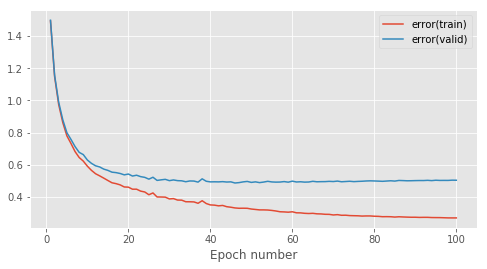

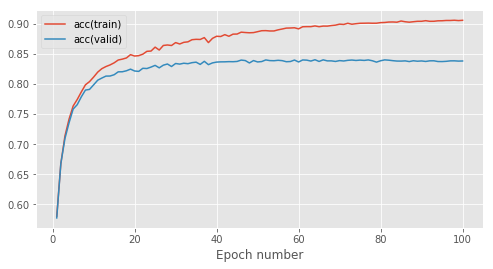

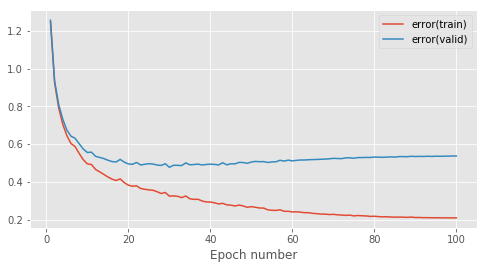

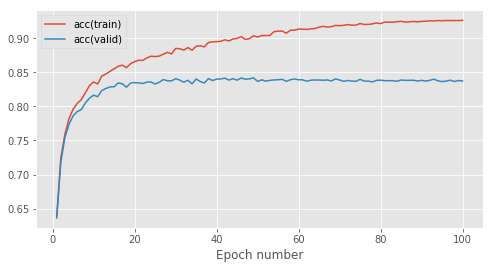

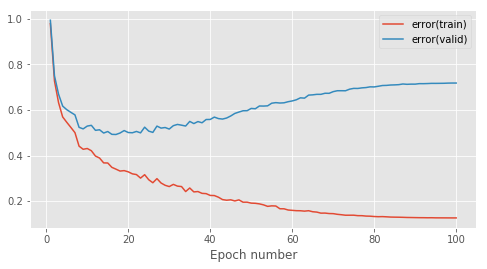

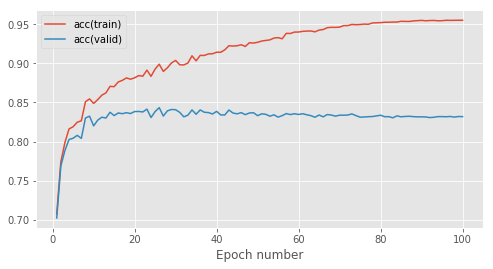

In [3]:
##############SGD With scheduler with no restarts

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 0.0075
# learning_ranges = [1.05,1.1,1.15,1.2]
learning_ranges = [3,5,10]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

for learning_range in learning_ranges:
    

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    sgd_scheduler_no_restart = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=100,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=1.0)

    error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=sgd_scheduler_no_restart)

learning_rate 0.0225
epoch 1


Epoch 1: 3.0s to complete
    error(train)=1.45e+00, acc(train)=5.93e-01, error(valid)=1.45e+00, acc(valid)=5.90e-01


learning_rate 0.02242114701314478
epoch 2


Epoch 2: 2.9s to complete
    error(train)=1.13e+00, acc(train)=6.73e-01, error(valid)=1.13e+00, acc(valid)=6.67e-01


learning_rate 0.02218583161128631
epoch 3


Epoch 3: 3.0s to complete
    error(train)=9.40e-01, acc(train)=7.23e-01, error(valid)=9.46e-01, acc(valid)=7.20e-01


learning_rate 0.02179776485888251
epoch 4


Epoch 4: 3.0s to complete
    error(train)=8.45e-01, acc(train)=7.48e-01, error(valid)=8.63e-01, acc(valid)=7.43e-01


learning_rate 0.021263066800438633
epoch 5


Epoch 5: 3.0s to complete
    error(train)=7.66e-01, acc(train)=7.68e-01, error(valid)=7.86e-01, acc(valid)=7.62e-01


learning_rate 0.020590169943749473
epoch 6


Epoch 6: 3.0s to complete
    error(train)=7.15e-01, acc(train)=7.78e-01, error(valid)=7.37e-01, acc(valid)=7.71e-01


learning_rate 0.019789686274214114
epoch 7


Epoch 7: 3.0s to complete
    error(train)=6.66e-01, acc(train)=7.92e-01, error(valid)=6.95e-01, acc(valid)=7.85e-01


learning_rate 0.018874239897486895
epoch 8


Epoch 8: 3.0s to complete
    error(train)=6.37e-01, acc(train)=7.96e-01, error(valid)=6.68e-01, acc(valid)=7.88e-01


learning_rate 0.017858267949789966
epoch 9


Epoch 9: 3.0s to complete
    error(train)=6.09e-01, acc(train)=8.06e-01, error(valid)=6.46e-01, acc(valid)=7.96e-01


learning_rate 0.016757792915650726
epoch 10


Epoch 10: 2.9s to complete
    error(train)=5.90e-01, acc(train)=8.11e-01, error(valid)=6.29e-01, acc(valid)=8.01e-01


learning_rate 0.015590169943749475
epoch 11


Epoch 11: 3.0s to complete
    error(train)=5.80e-01, acc(train)=8.14e-01, error(valid)=6.25e-01, acc(valid)=8.02e-01


learning_rate 0.014373813145857249
epoch 12


Epoch 12: 3.0s to complete
    error(train)=5.60e-01, acc(train)=8.22e-01, error(valid)=6.10e-01, acc(valid)=8.07e-01


learning_rate 0.013127905195293135
epoch 13


Epoch 13: 3.0s to complete
    error(train)=5.39e-01, acc(train)=8.27e-01, error(valid)=5.90e-01, acc(valid)=8.12e-01


learning_rate 0.011872094804706867
epoch 14


Epoch 14: 3.0s to complete
    error(train)=5.30e-01, acc(train)=8.32e-01, error(valid)=5.84e-01, acc(valid)=8.16e-01


learning_rate 0.010626186854142752
epoch 15


Epoch 15: 2.9s to complete
    error(train)=5.20e-01, acc(train)=8.33e-01, error(valid)=5.77e-01, acc(valid)=8.15e-01


learning_rate 0.009409830056250526
epoch 16


Epoch 16: 3.0s to complete
    error(train)=5.13e-01, acc(train)=8.35e-01, error(valid)=5.71e-01, acc(valid)=8.17e-01


learning_rate 0.008242207084349274
epoch 17


Epoch 17: 3.0s to complete
    error(train)=5.06e-01, acc(train)=8.37e-01, error(valid)=5.66e-01, acc(valid)=8.17e-01


learning_rate 0.007141732050210032
epoch 18


Epoch 18: 3.0s to complete
    error(train)=4.98e-01, acc(train)=8.40e-01, error(valid)=5.60e-01, acc(valid)=8.20e-01


learning_rate 0.006125760102513103
epoch 19


Epoch 19: 3.0s to complete
    error(train)=4.95e-01, acc(train)=8.40e-01, error(valid)=5.58e-01, acc(valid)=8.21e-01


learning_rate 0.005210313725785887
epoch 20


Epoch 20: 3.0s to complete
    error(train)=4.88e-01, acc(train)=8.43e-01, error(valid)=5.53e-01, acc(valid)=8.22e-01


learning_rate 0.004409830056250527
epoch 21


Epoch 21: 3.0s to complete
    error(train)=4.87e-01, acc(train)=8.43e-01, error(valid)=5.51e-01, acc(valid)=8.22e-01


learning_rate 0.003736933199561366
epoch 22


Epoch 22: 3.0s to complete
    error(train)=4.84e-01, acc(train)=8.44e-01, error(valid)=5.49e-01, acc(valid)=8.21e-01


learning_rate 0.0032022351411174865
epoch 23


Epoch 23: 3.0s to complete
    error(train)=4.80e-01, acc(train)=8.45e-01, error(valid)=5.47e-01, acc(valid)=8.24e-01


learning_rate 0.0028141683887136894
epoch 24


Epoch 24: 3.3s to complete
    error(train)=4.77e-01, acc(train)=8.46e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


learning_rate 0.0025788529868552225
epoch 25


Epoch 25: 3.4s to complete
    error(train)=4.76e-01, acc(train)=8.46e-01, error(valid)=5.44e-01, acc(valid)=8.26e-01


learning_rate 0.02025
epoch 26


Epoch 26: 3.5s to complete
    error(train)=4.85e-01, acc(train)=8.41e-01, error(valid)=5.55e-01, acc(valid)=8.19e-01


learning_rate 0.020242215117127368
epoch 27


Epoch 27: 3.3s to complete
    error(train)=4.92e-01, acc(train)=8.37e-01, error(valid)=5.64e-01, acc(valid)=8.19e-01


learning_rate 0.02021887412583935
epoch 28


Epoch 28: 3.3s to complete
    error(train)=4.73e-01, acc(train)=8.43e-01, error(valid)=5.47e-01, acc(valid)=8.24e-01


learning_rate 0.020180017974165992
epoch 29


Epoch 29: 3.0s to complete
    error(train)=4.66e-01, acc(train)=8.46e-01, error(valid)=5.47e-01, acc(valid)=8.24e-01


learning_rate 0.020125714829000732
epoch 30


Epoch 30: 3.0s to complete
    error(train)=4.53e-01, acc(train)=8.50e-01, error(valid)=5.36e-01, acc(valid)=8.25e-01


learning_rate 0.020056059956512527
epoch 31


Epoch 31: 3.0s to complete
    error(train)=4.53e-01, acc(train)=8.48e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


learning_rate 0.019971175555016603
epoch 32


Epoch 32: 2.9s to complete
    error(train)=4.47e-01, acc(train)=8.49e-01, error(valid)=5.40e-01, acc(valid)=8.24e-01


learning_rate 0.019871210540597095
epoch 33


Epoch 33: 2.9s to complete
    error(train)=4.34e-01, acc(train)=8.55e-01, error(valid)=5.27e-01, acc(valid)=8.27e-01


learning_rate 0.019756340285857644
epoch 34


Epoch 34: 3.0s to complete
    error(train)=4.26e-01, acc(train)=8.58e-01, error(valid)=5.26e-01, acc(valid)=8.30e-01


learning_rate 0.01962676631225823
epoch 35


Epoch 35: 3.0s to complete
    error(train)=4.19e-01, acc(train)=8.58e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


learning_rate 0.019482715936578084
epoch 36


Epoch 36: 3.0s to complete
    error(train)=4.16e-01, acc(train)=8.59e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


learning_rate 0.01932444187212479
epoch 37


Epoch 37: 3.0s to complete
    error(train)=4.12e-01, acc(train)=8.60e-01, error(valid)=5.18e-01, acc(valid)=8.28e-01


learning_rate 0.01915222178538929
epoch 38


Epoch 38: 3.0s to complete
    error(train)=4.02e-01, acc(train)=8.64e-01, error(valid)=5.17e-01, acc(valid)=8.33e-01


learning_rate 0.018966357808924496
epoch 39


Epoch 39: 2.9s to complete
    error(train)=3.94e-01, acc(train)=8.67e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


learning_rate 0.018767176011302133
epoch 40


Epoch 40: 3.0s to complete
    error(train)=3.97e-01, acc(train)=8.66e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


learning_rate 0.01855502582507766
epoch 41


Epoch 41: 2.9s to complete
    error(train)=3.87e-01, acc(train)=8.68e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


learning_rate 0.01833027943376683
epoch 42


Epoch 42: 3.0s to complete
    error(train)=3.84e-01, acc(train)=8.68e-01, error(valid)=5.07e-01, acc(valid)=8.34e-01


learning_rate 0.018093331118909338
epoch 43


Epoch 43: 2.9s to complete
    error(train)=3.81e-01, acc(train)=8.71e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


learning_rate 0.01784459656836503
epoch 44


Epoch 44: 2.9s to complete
    error(train)=3.75e-01, acc(train)=8.71e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


learning_rate 0.01758451214705612
epoch 45


Epoch 45: 3.0s to complete
    error(train)=3.74e-01, acc(train)=8.72e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


learning_rate 0.01731353413143487
epoch 46


Epoch 46: 3.0s to complete
    error(train)=3.67e-01, acc(train)=8.74e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


learning_rate 0.017032137909019623
epoch 47


Epoch 47: 3.0s to complete
    error(train)=3.61e-01, acc(train)=8.77e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


learning_rate 0.01674081714440358
epoch 48


Epoch 48: 2.9s to complete
    error(train)=3.75e-01, acc(train)=8.69e-01, error(valid)=5.16e-01, acc(valid)=8.36e-01


learning_rate 0.016440082913199334
epoch 49


Epoch 49: 3.0s to complete
    error(train)=3.56e-01, acc(train)=8.78e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


learning_rate 0.016130462805438596
epoch 50


Epoch 50: 2.9s to complete
    error(train)=3.54e-01, acc(train)=8.79e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


learning_rate 0.0158125
epoch 51


Epoch 51: 3.0s to complete
    error(train)=3.56e-01, acc(train)=8.76e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


learning_rate 0.015486752311688775
epoch 52


Epoch 52: 3.0s to complete
    error(train)=3.54e-01, acc(train)=8.77e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


learning_rate 0.015153791212640022
epoch 53


Epoch 53: 3.0s to complete
    error(train)=3.49e-01, acc(train)=8.79e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


learning_rate 0.014814200829762415
epoch 54


Epoch 54: 2.9s to complete
    error(train)=3.46e-01, acc(train)=8.79e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


learning_rate 0.014468576919981112
epoch 55


Epoch 55: 3.0s to complete
    error(train)=3.37e-01, acc(train)=8.84e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


learning_rate 0.01411752582507766
epoch 56


Epoch 56: 2.9s to complete
    error(train)=3.41e-01, acc(train)=8.82e-01, error(valid)=5.08e-01, acc(valid)=8.37e-01


learning_rate 0.013761663407960483
epoch 57


Epoch 57: 3.0s to complete
    error(train)=3.37e-01, acc(train)=8.83e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


learning_rate 0.013401613972232072
epoch 58


Epoch 58: 3.0s to complete
    error(train)=3.42e-01, acc(train)=8.81e-01, error(valid)=5.14e-01, acc(valid)=8.37e-01


learning_rate 0.013038009166948309
epoch 59


Epoch 59: 3.0s to complete
    error(train)=3.29e-01, acc(train)=8.86e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


learning_rate 0.012671486878491406
epoch 60


Epoch 60: 3.0s to complete
    error(train)=3.26e-01, acc(train)=8.87e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


learning_rate 0.012302690111500427
epoch 61


Epoch 61: 3.0s to complete
    error(train)=3.25e-01, acc(train)=8.87e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


learning_rate 0.011932265860822659
epoch 62


Epoch 62: 3.0s to complete
    error(train)=3.33e-01, acc(train)=8.84e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


learning_rate 0.011560863976464796
epoch 63


Epoch 63: 3.0s to complete
    error(train)=3.18e-01, acc(train)=8.90e-01, error(valid)=5.02e-01, acc(valid)=8.41e-01


learning_rate 0.011189136023535209
epoch 64


Epoch 64: 3.0s to complete
    error(train)=3.18e-01, acc(train)=8.90e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


learning_rate 0.010817734139177346
epoch 65


Epoch 65: 3.0s to complete
    error(train)=3.17e-01, acc(train)=8.89e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


learning_rate 0.010447309888499578
epoch 66


Epoch 66: 2.9s to complete
    error(train)=3.15e-01, acc(train)=8.91e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


learning_rate 0.010078513121508599
epoch 67


Epoch 67: 3.0s to complete
    error(train)=3.14e-01, acc(train)=8.91e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


learning_rate 0.009711990833051694
epoch 68


Epoch 68: 3.0s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=5.02e-01, acc(valid)=8.40e-01


learning_rate 0.00934838602776793
epoch 69


Epoch 69: 3.0s to complete
    error(train)=3.09e-01, acc(train)=8.94e-01, error(valid)=5.04e-01, acc(valid)=8.41e-01


learning_rate 0.008988336592039518
epoch 70


Epoch 70: 3.0s to complete
    error(train)=3.04e-01, acc(train)=8.95e-01, error(valid)=5.02e-01, acc(valid)=8.41e-01


learning_rate 0.008632474174922343
epoch 71


Epoch 71: 3.0s to complete
    error(train)=3.08e-01, acc(train)=8.92e-01, error(valid)=5.10e-01, acc(valid)=8.36e-01


learning_rate 0.008281423080018892
epoch 72


Epoch 72: 3.0s to complete
    error(train)=3.04e-01, acc(train)=8.94e-01, error(valid)=5.06e-01, acc(valid)=8.42e-01


learning_rate 0.007935799170237587
epoch 73


Epoch 73: 3.0s to complete
    error(train)=3.00e-01, acc(train)=8.96e-01, error(valid)=5.05e-01, acc(valid)=8.41e-01


learning_rate 0.007596208787359981
epoch 74


Epoch 74: 3.0s to complete
    error(train)=2.99e-01, acc(train)=8.97e-01, error(valid)=5.04e-01, acc(valid)=8.42e-01


learning_rate 0.00726324768831123
epoch 75


Epoch 75: 3.0s to complete
    error(train)=2.98e-01, acc(train)=8.97e-01, error(valid)=5.03e-01, acc(valid)=8.42e-01


learning_rate 0.006937500000000003
epoch 76


Epoch 76: 3.0s to complete
    error(train)=2.98e-01, acc(train)=8.96e-01, error(valid)=5.11e-01, acc(valid)=8.39e-01


learning_rate 0.0066195371945614034
epoch 77


Epoch 77: 3.0s to complete
    error(train)=2.96e-01, acc(train)=8.97e-01, error(valid)=5.06e-01, acc(valid)=8.42e-01


learning_rate 0.00630991708680067
epoch 78


Epoch 78: 3.0s to complete
    error(train)=2.99e-01, acc(train)=8.95e-01, error(valid)=5.14e-01, acc(valid)=8.36e-01


learning_rate 0.006009182855596424
epoch 79


Epoch 79: 3.0s to complete
    error(train)=2.94e-01, acc(train)=8.98e-01, error(valid)=5.08e-01, acc(valid)=8.39e-01


learning_rate 0.005717862090980378
epoch 80


Epoch 80: 3.0s to complete
    error(train)=2.93e-01, acc(train)=8.98e-01, error(valid)=5.07e-01, acc(valid)=8.40e-01


learning_rate 0.005436465868565136
epoch 81


Epoch 81: 3.0s to complete
    error(train)=2.90e-01, acc(train)=8.99e-01, error(valid)=5.05e-01, acc(valid)=8.42e-01


learning_rate 0.005165487852943881
epoch 82


Epoch 82: 2.9s to complete
    error(train)=2.91e-01, acc(train)=8.99e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


learning_rate 0.004905403431634975
epoch 83


Epoch 83: 3.0s to complete
    error(train)=2.89e-01, acc(train)=9.00e-01, error(valid)=5.07e-01, acc(valid)=8.41e-01


learning_rate 0.004656668881090663
epoch 84


Epoch 84: 3.0s to complete
    error(train)=2.88e-01, acc(train)=9.00e-01, error(valid)=5.08e-01, acc(valid)=8.40e-01


learning_rate 0.004419720566233173
epoch 85


Epoch 85: 3.0s to complete
    error(train)=2.87e-01, acc(train)=9.01e-01, error(valid)=5.07e-01, acc(valid)=8.41e-01


learning_rate 0.004194974174922343
epoch 86


Epoch 86: 3.0s to complete
    error(train)=2.89e-01, acc(train)=8.99e-01, error(valid)=5.09e-01, acc(valid)=8.40e-01


learning_rate 0.003982823988697868
epoch 87


Epoch 87: 3.0s to complete
    error(train)=2.86e-01, acc(train)=9.01e-01, error(valid)=5.07e-01, acc(valid)=8.42e-01


learning_rate 0.003783642191075504
epoch 88


Epoch 88: 3.0s to complete
    error(train)=2.84e-01, acc(train)=9.02e-01, error(valid)=5.07e-01, acc(valid)=8.41e-01


learning_rate 0.003597778214610713
epoch 89


Epoch 89: 3.0s to complete
    error(train)=2.85e-01, acc(train)=9.02e-01, error(valid)=5.09e-01, acc(valid)=8.41e-01


learning_rate 0.003425558127875211
epoch 90


Epoch 90: 3.0s to complete
    error(train)=2.85e-01, acc(train)=9.02e-01, error(valid)=5.08e-01, acc(valid)=8.41e-01


learning_rate 0.0032672840634219167
epoch 91


Epoch 91: 3.0s to complete
    error(train)=2.82e-01, acc(train)=9.03e-01, error(valid)=5.07e-01, acc(valid)=8.42e-01


learning_rate 0.0031232336877417693
epoch 92


Epoch 92: 3.1s to complete
    error(train)=2.83e-01, acc(train)=9.02e-01, error(valid)=5.09e-01, acc(valid)=8.40e-01


learning_rate 0.0029936597141423564
epoch 93


Epoch 93: 3.4s to complete
    error(train)=2.82e-01, acc(train)=9.03e-01, error(valid)=5.09e-01, acc(valid)=8.41e-01


learning_rate 0.0028787894594029034
epoch 94


Epoch 94: 3.4s to complete
    error(train)=2.82e-01, acc(train)=9.03e-01, error(valid)=5.10e-01, acc(valid)=8.39e-01


learning_rate 0.002778824444983399
epoch 95


Epoch 95: 3.4s to complete
    error(train)=2.82e-01, acc(train)=9.03e-01, error(valid)=5.09e-01, acc(valid)=8.42e-01


learning_rate 0.0026939400434874746
epoch 96


Epoch 96: 3.1s to complete
    error(train)=2.82e-01, acc(train)=9.03e-01, error(valid)=5.10e-01, acc(valid)=8.39e-01


learning_rate 0.0026242851709992695
epoch 97


Epoch 97: 3.1s to complete
    error(train)=2.81e-01, acc(train)=9.03e-01, error(valid)=5.10e-01, acc(valid)=8.40e-01


learning_rate 0.00256998202583401
epoch 98


Epoch 98: 2.9s to complete
    error(train)=2.81e-01, acc(train)=9.03e-01, error(valid)=5.10e-01, acc(valid)=8.40e-01


learning_rate 0.0025311258741606488
epoch 99


Epoch 99: 3.0s to complete
    error(train)=2.80e-01, acc(train)=9.03e-01, error(valid)=5.10e-01, acc(valid)=8.39e-01


learning_rate 0.002507784882872632
epoch 100


Epoch 100: 3.0s to complete
    error(train)=2.79e-01, acc(train)=9.04e-01, error(valid)=5.10e-01, acc(valid)=8.41e-01


learning_rate 0.0375
epoch 1


Epoch 1: 2.9s to complete
    error(train)=1.23e+00, acc(train)=6.46e-01, error(valid)=1.24e+00, acc(valid)=6.41e-01


learning_rate 0.037358064623660606
epoch 2


Epoch 2: 2.9s to complete
    error(train)=9.59e-01, acc(train)=7.18e-01, error(valid)=9.70e-01, acc(valid)=7.15e-01


learning_rate 0.03693449690031536
epoch 3


Epoch 3: 3.0s to complete
    error(train)=8.22e-01, acc(train)=7.50e-01, error(valid)=8.42e-01, acc(valid)=7.43e-01


learning_rate 0.036235976745988524
epoch 4


Epoch 4: 3.0s to complete
    error(train)=7.21e-01, acc(train)=7.78e-01, error(valid)=7.49e-01, acc(valid)=7.71e-01


learning_rate 0.035273520240789544
epoch 5


Epoch 5: 3.0s to complete
    error(train)=6.38e-01, acc(train)=8.00e-01, error(valid)=6.72e-01, acc(valid)=7.87e-01


learning_rate 0.034062305898749055
epoch 6


Epoch 6: 3.0s to complete
    error(train)=6.02e-01, acc(train)=8.09e-01, error(valid)=6.39e-01, acc(valid)=8.01e-01


learning_rate 0.0326214352935854
epoch 7


Epoch 7: 3.2s to complete
    error(train)=5.80e-01, acc(train)=8.11e-01, error(valid)=6.28e-01, acc(valid)=7.95e-01


learning_rate 0.030973631815476414
epoch 8


Epoch 8: 3.1s to complete
    error(train)=5.50e-01, acc(train)=8.21e-01, error(valid)=6.03e-01, acc(valid)=8.07e-01


learning_rate 0.029144882309621936
epoch 9


Epoch 9: 3.1s to complete
    error(train)=5.25e-01, acc(train)=8.30e-01, error(valid)=5.80e-01, acc(valid)=8.16e-01


learning_rate 0.027164027248171307
epoch 10


Epoch 10: 3.0s to complete
    error(train)=5.06e-01, acc(train)=8.34e-01, error(valid)=5.67e-01, acc(valid)=8.17e-01


learning_rate 0.025062305898749054
epoch 11


Epoch 11: 3.0s to complete
    error(train)=4.90e-01, acc(train)=8.37e-01, error(valid)=5.56e-01, acc(valid)=8.17e-01


learning_rate 0.022872863662543045
epoch 12


Epoch 12: 3.0s to complete
    error(train)=4.80e-01, acc(train)=8.40e-01, error(valid)=5.48e-01, acc(valid)=8.20e-01


learning_rate 0.020630229351527644
epoch 13


Epoch 13: 3.1s to complete
    error(train)=4.69e-01, acc(train)=8.45e-01, error(valid)=5.40e-01, acc(valid)=8.24e-01


learning_rate 0.01836977064847236
epoch 14


Epoch 14: 3.0s to complete
    error(train)=4.54e-01, acc(train)=8.50e-01, error(valid)=5.29e-01, acc(valid)=8.29e-01


learning_rate 0.01612713633745695
epoch 15


Epoch 15: 3.0s to complete
    error(train)=4.44e-01, acc(train)=8.53e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


learning_rate 0.013937694101250947
epoch 16


Epoch 16: 3.0s to complete
    error(train)=4.37e-01, acc(train)=8.55e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


learning_rate 0.011835972751828691
epoch 17


Epoch 17: 3.0s to complete
    error(train)=4.32e-01, acc(train)=8.56e-01, error(valid)=5.16e-01, acc(valid)=8.30e-01


learning_rate 0.009855117690378055
epoch 18


Epoch 18: 3.0s to complete
    error(train)=4.27e-01, acc(train)=8.59e-01, error(valid)=5.11e-01, acc(valid)=8.33e-01


learning_rate 0.008026368184523585
epoch 19


Epoch 19: 3.0s to complete
    error(train)=4.20e-01, acc(train)=8.62e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


learning_rate 0.006378564706414595
epoch 20


Epoch 20: 3.0s to complete
    error(train)=4.16e-01, acc(train)=8.62e-01, error(valid)=5.04e-01, acc(valid)=8.36e-01


learning_rate 0.004937694101250948
epoch 21


Epoch 21: 3.0s to complete
    error(train)=4.13e-01, acc(train)=8.62e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


learning_rate 0.0037264797592104592
epoch 22


Epoch 22: 3.0s to complete
    error(train)=4.11e-01, acc(train)=8.63e-01, error(valid)=5.01e-01, acc(valid)=8.35e-01


learning_rate 0.002764023254011476
epoch 23


Epoch 23: 3.0s to complete
    error(train)=4.10e-01, acc(train)=8.64e-01, error(valid)=5.00e-01, acc(valid)=8.37e-01


learning_rate 0.0020655030996846405
epoch 24


Epoch 24: 3.0s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=5.00e-01, acc(valid)=8.36e-01


learning_rate 0.0016419353763394004
epoch 25


Epoch 25: 3.0s to complete
    error(train)=4.08e-01, acc(train)=8.64e-01, error(valid)=5.00e-01, acc(valid)=8.36e-01


learning_rate 0.03375
epoch 26


Epoch 26: 3.0s to complete
    error(train)=4.31e-01, acc(train)=8.54e-01, error(valid)=5.23e-01, acc(valid)=8.27e-01


learning_rate 0.03373585563534409
epoch 27


Epoch 27: 3.0s to complete
    error(train)=4.27e-01, acc(train)=8.55e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


learning_rate 0.03369344735539826
epoch 28


Epoch 28: 3.0s to complete
    error(train)=4.20e-01, acc(train)=8.56e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


learning_rate 0.03362284955869596
epoch 29


Epoch 29: 3.0s to complete
    error(train)=4.07e-01, acc(train)=8.61e-01, error(valid)=5.08e-01, acc(valid)=8.32e-01


learning_rate 0.03352418609776189
epoch 30


Epoch 30: 3.0s to complete
    error(train)=4.11e-01, acc(train)=8.58e-01, error(valid)=5.16e-01, acc(valid)=8.31e-01


learning_rate 0.03339763006183262
epoch 31


Epoch 31: 3.0s to complete
    error(train)=3.94e-01, acc(train)=8.64e-01, error(valid)=5.03e-01, acc(valid)=8.31e-01


learning_rate 0.03324340347319918
epoch 32


Epoch 32: 3.0s to complete
    error(train)=3.92e-01, acc(train)=8.65e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


learning_rate 0.033061776897704585
epoch 33


Epoch 33: 3.0s to complete
    error(train)=3.82e-01, acc(train)=8.68e-01, error(valid)=5.02e-01, acc(valid)=8.35e-01


learning_rate 0.032853068970079384
epoch 34


Epoch 34: 3.0s to complete
    error(train)=3.69e-01, acc(train)=8.73e-01, error(valid)=4.94e-01, acc(valid)=8.38e-01


learning_rate 0.032617645834948056
epoch 35


Epoch 35: 3.0s to complete
    error(train)=3.75e-01, acc(train)=8.69e-01, error(valid)=5.09e-01, acc(valid)=8.32e-01


learning_rate 0.032355920504486935
epoch 36


Epoch 36: 3.0s to complete
    error(train)=3.59e-01, acc(train)=8.75e-01, error(valid)=4.91e-01, acc(valid)=8.39e-01


learning_rate 0.032068352133860535
epoch 37


Epoch 37: 3.0s to complete
    error(train)=3.71e-01, acc(train)=8.68e-01, error(valid)=5.06e-01, acc(valid)=8.30e-01


learning_rate 0.0317554452157073
epoch 38


Epoch 38: 3.0s to complete
    error(train)=3.58e-01, acc(train)=8.74e-01, error(valid)=5.00e-01, acc(valid)=8.36e-01


learning_rate 0.03141774869508817
epoch 39


Epoch 39: 3.0s to complete
    error(train)=3.47e-01, acc(train)=8.78e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


learning_rate 0.031055855006450354
epoch 40


Epoch 40: 3.0s to complete
    error(train)=3.42e-01, acc(train)=8.79e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


learning_rate 0.03067039903429603
epoch 41


Epoch 41: 3.0s to complete
    error(train)=3.46e-01, acc(train)=8.76e-01, error(valid)=5.00e-01, acc(valid)=8.35e-01


learning_rate 0.03026205699937917
epoch 42


Epoch 42: 3.0s to complete
    error(train)=3.51e-01, acc(train)=8.74e-01, error(valid)=5.09e-01, acc(valid)=8.36e-01


learning_rate 0.029831545272384574
epoch 43


Epoch 43: 3.1s to complete
    error(train)=3.23e-01, acc(train)=8.85e-01, error(valid)=4.85e-01, acc(valid)=8.39e-01


learning_rate 0.029379619117170262
epoch 44


Epoch 44: 3.0s to complete
    error(train)=3.42e-01, acc(train)=8.75e-01, error(valid)=5.08e-01, acc(valid)=8.30e-01


learning_rate 0.02890707136577802
epoch 45


Epoch 45: 3.0s to complete
    error(train)=3.21e-01, acc(train)=8.85e-01, error(valid)=4.95e-01, acc(valid)=8.41e-01


learning_rate 0.02841473102753659
epoch 46


Epoch 46: 3.0s to complete
    error(train)=3.20e-01, acc(train)=8.86e-01, error(valid)=4.95e-01, acc(valid)=8.38e-01


learning_rate 0.027903461834697624
epoch 47


Epoch 47: 3.0s to complete
    error(train)=3.11e-01, acc(train)=8.88e-01, error(valid)=4.90e-01, acc(valid)=8.40e-01


learning_rate 0.0273741607271558
epoch 48


Epoch 48: 3.0s to complete
    error(train)=3.15e-01, acc(train)=8.85e-01, error(valid)=4.98e-01, acc(valid)=8.38e-01


learning_rate 0.026827756278911468
epoch 49


Epoch 49: 3.0s to complete
    error(train)=3.09e-01, acc(train)=8.89e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


learning_rate 0.02626520706903632
epoch 50


Epoch 50: 3.0s to complete
    error(train)=2.98e-01, acc(train)=8.93e-01, error(valid)=4.91e-01, acc(valid)=8.41e-01


learning_rate 0.025687500000000002
epoch 51


Epoch 51: 3.0s to complete
    error(train)=2.97e-01, acc(train)=8.94e-01, error(valid)=4.94e-01, acc(valid)=8.40e-01


learning_rate 0.025095648566307773
epoch 52


Epoch 52: 3.0s to complete
    error(train)=2.96e-01, acc(train)=8.92e-01, error(valid)=4.97e-01, acc(valid)=8.40e-01


learning_rate 0.024490691076486798
epoch 53


Epoch 53: 3.0s to complete
    error(train)=2.87e-01, acc(train)=8.97e-01, error(valid)=4.90e-01, acc(valid)=8.44e-01


learning_rate 0.02387368883154016
epoch 54


Epoch 54: 3.0s to complete
    error(train)=2.86e-01, acc(train)=8.97e-01, error(valid)=4.91e-01, acc(valid)=8.42e-01


learning_rate 0.023245724263064274
epoch 55


Epoch 55: 3.0s to complete
    error(train)=2.93e-01, acc(train)=8.94e-01, error(valid)=4.99e-01, acc(valid)=8.39e-01


learning_rate 0.02260789903429603
epoch 56


Epoch 56: 3.0s to complete
    error(train)=2.90e-01, acc(train)=8.94e-01, error(valid)=5.03e-01, acc(valid)=8.42e-01


learning_rate 0.02196133210742116
epoch 57


Epoch 57: 3.0s to complete
    error(train)=2.78e-01, acc(train)=9.00e-01, error(valid)=4.96e-01, acc(valid)=8.43e-01


learning_rate 0.02130715778053433
epoch 58


Epoch 58: 3.0s to complete
    error(train)=2.74e-01, acc(train)=9.01e-01, error(valid)=4.99e-01, acc(valid)=8.41e-01


learning_rate 0.020646523697694815
epoch 59


Epoch 59: 3.0s to complete
    error(train)=2.77e-01, acc(train)=8.99e-01, error(valid)=5.03e-01, acc(valid)=8.42e-01


learning_rate 0.019980588835568892
epoch 60


Epoch 60: 3.2s to complete
    error(train)=2.77e-01, acc(train)=8.98e-01, error(valid)=5.06e-01, acc(valid)=8.36e-01


learning_rate 0.019310521470190915
epoch 61


Epoch 61: 3.3s to complete
    error(train)=2.67e-01, acc(train)=9.04e-01, error(valid)=4.98e-01, acc(valid)=8.41e-01


learning_rate 0.018637497127410182
epoch 62


Epoch 62: 3.4s to complete
    error(train)=2.64e-01, acc(train)=9.04e-01, error(valid)=5.03e-01, acc(valid)=8.43e-01


learning_rate 0.017962696520619135
epoch 63


Epoch 63: 3.6s to complete
    error(train)=2.61e-01, acc(train)=9.06e-01, error(valid)=5.02e-01, acc(valid)=8.45e-01


learning_rate 0.017287303479380872
epoch 64


Epoch 64: 3.0s to complete
    error(train)=2.63e-01, acc(train)=9.05e-01, error(valid)=5.04e-01, acc(valid)=8.42e-01


learning_rate 0.016612502872589825
epoch 65


Epoch 65: 3.0s to complete
    error(train)=2.56e-01, acc(train)=9.07e-01, error(valid)=5.02e-01, acc(valid)=8.43e-01


learning_rate 0.015939478529809092
epoch 66


Epoch 66: 3.0s to complete
    error(train)=2.58e-01, acc(train)=9.06e-01, error(valid)=5.08e-01, acc(valid)=8.42e-01


learning_rate 0.015269411164431115
epoch 67


Epoch 67: 3.0s to complete
    error(train)=2.59e-01, acc(train)=9.06e-01, error(valid)=5.10e-01, acc(valid)=8.42e-01


learning_rate 0.014603476302305187
epoch 68


Epoch 68: 3.0s to complete
    error(train)=2.55e-01, acc(train)=9.07e-01, error(valid)=5.08e-01, acc(valid)=8.42e-01


learning_rate 0.013942842219465675
epoch 69


Epoch 69: 3.1s to complete
    error(train)=2.50e-01, acc(train)=9.09e-01, error(valid)=5.09e-01, acc(valid)=8.41e-01


learning_rate 0.013288667892578841
epoch 70


Epoch 70: 3.1s to complete
    error(train)=2.45e-01, acc(train)=9.12e-01, error(valid)=5.05e-01, acc(valid)=8.44e-01


learning_rate 0.012642100965703973
epoch 71


Epoch 71: 3.0s to complete
    error(train)=2.47e-01, acc(train)=9.10e-01, error(valid)=5.08e-01, acc(valid)=8.41e-01


learning_rate 0.012004275736935733
epoch 72


Epoch 72: 3.0s to complete
    error(train)=2.46e-01, acc(train)=9.10e-01, error(valid)=5.12e-01, acc(valid)=8.40e-01


learning_rate 0.01137631116845984
epoch 73


Epoch 73: 3.0s to complete
    error(train)=2.41e-01, acc(train)=9.13e-01, error(valid)=5.10e-01, acc(valid)=8.42e-01


learning_rate 0.010759308923513204
epoch 74


Epoch 74: 3.1s to complete
    error(train)=2.41e-01, acc(train)=9.13e-01, error(valid)=5.10e-01, acc(valid)=8.43e-01


learning_rate 0.010154351433692234
epoch 75


Epoch 75: 3.0s to complete
    error(train)=2.41e-01, acc(train)=9.12e-01, error(valid)=5.13e-01, acc(valid)=8.42e-01


learning_rate 0.009562500000000003
epoch 76


Epoch 76: 3.0s to complete
    error(train)=2.39e-01, acc(train)=9.13e-01, error(valid)=5.14e-01, acc(valid)=8.43e-01


learning_rate 0.008984792930963676
epoch 77


Epoch 77: 3.1s to complete
    error(train)=2.34e-01, acc(train)=9.16e-01, error(valid)=5.13e-01, acc(valid)=8.43e-01


learning_rate 0.00842224372108854
epoch 78


Epoch 78: 3.0s to complete
    error(train)=2.34e-01, acc(train)=9.15e-01, error(valid)=5.13e-01, acc(valid)=8.43e-01


learning_rate 0.007875839272844206
epoch 79


Epoch 79: 3.0s to complete
    error(train)=2.35e-01, acc(train)=9.15e-01, error(valid)=5.18e-01, acc(valid)=8.41e-01


learning_rate 0.007346538165302377
epoch 80


Epoch 80: 3.0s to complete
    error(train)=2.33e-01, acc(train)=9.16e-01, error(valid)=5.15e-01, acc(valid)=8.42e-01


learning_rate 0.006835268972463417
epoch 81


Epoch 81: 3.0s to complete
    error(train)=2.31e-01, acc(train)=9.17e-01, error(valid)=5.16e-01, acc(valid)=8.43e-01


learning_rate 0.006342928634221982
epoch 82


Epoch 82: 3.1s to complete
    error(train)=2.30e-01, acc(train)=9.18e-01, error(valid)=5.16e-01, acc(valid)=8.44e-01


learning_rate 0.005870380882829743
epoch 83


Epoch 83: 3.1s to complete
    error(train)=2.28e-01, acc(train)=9.18e-01, error(valid)=5.14e-01, acc(valid)=8.43e-01


learning_rate 0.005418454727615429
epoch 84


Epoch 84: 3.0s to complete
    error(train)=2.27e-01, acc(train)=9.19e-01, error(valid)=5.14e-01, acc(valid)=8.42e-01


learning_rate 0.004987943000620835
epoch 85


Epoch 85: 3.0s to complete
    error(train)=2.27e-01, acc(train)=9.18e-01, error(valid)=5.16e-01, acc(valid)=8.42e-01


learning_rate 0.004579600965703975
epoch 86


Epoch 86: 3.2s to complete
    error(train)=2.27e-01, acc(train)=9.19e-01, error(valid)=5.18e-01, acc(valid)=8.42e-01


learning_rate 0.004194144993549647
epoch 87


Epoch 87: 3.0s to complete
    error(train)=2.26e-01, acc(train)=9.20e-01, error(valid)=5.20e-01, acc(valid)=8.42e-01


learning_rate 0.003832251304911831
epoch 88


Epoch 88: 3.0s to complete
    error(train)=2.25e-01, acc(train)=9.19e-01, error(valid)=5.17e-01, acc(valid)=8.44e-01


learning_rate 0.0034945547842927032
epoch 89


Epoch 89: 3.0s to complete
    error(train)=2.23e-01, acc(train)=9.20e-01, error(valid)=5.18e-01, acc(valid)=8.43e-01


learning_rate 0.003181647866139467
epoch 90


Epoch 90: 3.0s to complete
    error(train)=2.23e-01, acc(train)=9.21e-01, error(valid)=5.18e-01, acc(valid)=8.45e-01


learning_rate 0.0028940794955130593
epoch 91


Epoch 91: 3.0s to complete
    error(train)=2.24e-01, acc(train)=9.19e-01, error(valid)=5.19e-01, acc(valid)=8.43e-01


learning_rate 0.002632354165051947
epoch 92


Epoch 92: 3.1s to complete
    error(train)=2.22e-01, acc(train)=9.21e-01, error(valid)=5.18e-01, acc(valid)=8.44e-01


learning_rate 0.002396931029920619
epoch 93


Epoch 93: 3.1s to complete
    error(train)=2.21e-01, acc(train)=9.21e-01, error(valid)=5.18e-01, acc(valid)=8.43e-01


learning_rate 0.0021882231022954156
epoch 94


Epoch 94: 3.0s to complete
    error(train)=2.22e-01, acc(train)=9.21e-01, error(valid)=5.19e-01, acc(valid)=8.44e-01


learning_rate 0.0020065965268008237
epoch 95


Epoch 95: 3.1s to complete
    error(train)=2.21e-01, acc(train)=9.22e-01, error(valid)=5.18e-01, acc(valid)=8.42e-01


learning_rate 0.0018523699381673834
epoch 96


Epoch 96: 3.1s to complete
    error(train)=2.21e-01, acc(train)=9.21e-01, error(valid)=5.20e-01, acc(valid)=8.43e-01


learning_rate 0.001725813902238109
epoch 97


Epoch 97: 3.0s to complete
    error(train)=2.20e-01, acc(train)=9.22e-01, error(valid)=5.19e-01, acc(valid)=8.44e-01


learning_rate 0.001627150441304046
epoch 98


Epoch 98: 3.0s to complete
    error(train)=2.20e-01, acc(train)=9.22e-01, error(valid)=5.19e-01, acc(valid)=8.44e-01


learning_rate 0.001556552644601742
epoch 99


Epoch 99: 3.0s to complete
    error(train)=2.20e-01, acc(train)=9.21e-01, error(valid)=5.20e-01, acc(valid)=8.44e-01


learning_rate 0.0015141443646559086
epoch 100


Epoch 100: 3.0s to complete
    error(train)=2.20e-01, acc(train)=9.22e-01, error(valid)=5.20e-01, acc(valid)=8.43e-01


learning_rate 0.075
epoch 1


Epoch 1: 2.9s to complete
    error(train)=9.67e-01, acc(train)=7.09e-01, error(valid)=9.75e-01, acc(valid)=7.03e-01


learning_rate 0.0747072582863
epoch 2


Epoch 2: 3.0s to complete
    error(train)=7.39e-01, acc(train)=7.68e-01, error(valid)=7.60e-01, acc(valid)=7.61e-01


learning_rate 0.07383364985690043
epoch 3


Epoch 3: 3.0s to complete
    error(train)=6.27e-01, acc(train)=7.98e-01, error(valid)=6.61e-01, acc(valid)=7.86e-01


learning_rate 0.07239295203860133
epoch 4


Epoch 4: 3.0s to complete
    error(train)=5.65e-01, acc(train)=8.16e-01, error(valid)=6.06e-01, acc(valid)=8.03e-01


learning_rate 0.07040788549662842
epoch 5


Epoch 5: 3.0s to complete
    error(train)=5.30e-01, acc(train)=8.24e-01, error(valid)=5.83e-01, acc(valid)=8.07e-01


learning_rate 0.06790975591616992
epoch 6


Epoch 6: 3.1s to complete
    error(train)=5.05e-01, acc(train)=8.30e-01, error(valid)=5.62e-01, acc(valid)=8.11e-01


learning_rate 0.0649379602930199
epoch 7


Epoch 7: 3.1s to complete
    error(train)=4.91e-01, acc(train)=8.35e-01, error(valid)=5.58e-01, acc(valid)=8.18e-01


learning_rate 0.061539365619420104
epoch 8


Epoch 8: 3.1s to complete
    error(train)=4.56e-01, acc(train)=8.44e-01, error(valid)=5.25e-01, acc(valid)=8.22e-01


learning_rate 0.05776756976359525
epoch 9


Epoch 9: 3.1s to complete
    error(train)=4.28e-01, acc(train)=8.54e-01, error(valid)=5.09e-01, acc(valid)=8.32e-01


learning_rate 0.05368205619935332
epoch 10


Epoch 10: 3.0s to complete
    error(train)=4.11e-01, acc(train)=8.60e-01, error(valid)=4.97e-01, acc(valid)=8.35e-01


learning_rate 0.049347255916169924
epoch 11


Epoch 11: 3.1s to complete
    error(train)=3.98e-01, acc(train)=8.63e-01, error(valid)=4.94e-01, acc(valid)=8.34e-01


learning_rate 0.04483153130399503
epoch 12


Epoch 12: 3.0s to complete
    error(train)=3.90e-01, acc(train)=8.66e-01, error(valid)=4.92e-01, acc(valid)=8.38e-01


learning_rate 0.04020609803752576
epoch 13


Epoch 13: 3.0s to complete
    error(train)=3.71e-01, acc(train)=8.73e-01, error(valid)=4.79e-01, acc(valid)=8.43e-01


learning_rate 0.03554390196247424
epoch 14


Epoch 14: 3.0s to complete
    error(train)=3.64e-01, acc(train)=8.74e-01, error(valid)=4.80e-01, acc(valid)=8.40e-01


learning_rate 0.030918468696004967
epoch 15


Epoch 15: 3.1s to complete
    error(train)=3.55e-01, acc(train)=8.76e-01, error(valid)=4.73e-01, acc(valid)=8.43e-01


learning_rate 0.02640274408383008
epoch 16


Epoch 16: 3.1s to complete
    error(train)=3.50e-01, acc(train)=8.77e-01, error(valid)=4.73e-01, acc(valid)=8.46e-01


learning_rate 0.022067943800646677
epoch 17


Epoch 17: 3.1s to complete
    error(train)=3.42e-01, acc(train)=8.81e-01, error(valid)=4.68e-01, acc(valid)=8.45e-01


learning_rate 0.01798243023640474
epoch 18


Epoch 18: 3.0s to complete
    error(train)=3.33e-01, acc(train)=8.84e-01, error(valid)=4.64e-01, acc(valid)=8.47e-01


learning_rate 0.014210634380579894
epoch 19


Epoch 19: 3.1s to complete
    error(train)=3.28e-01, acc(train)=8.87e-01, error(valid)=4.60e-01, acc(valid)=8.48e-01


learning_rate 0.010812039706980105
epoch 20


Epoch 20: 3.1s to complete
    error(train)=3.24e-01, acc(train)=8.88e-01, error(valid)=4.59e-01, acc(valid)=8.49e-01


learning_rate 0.00784024408383008
epoch 21


Epoch 21: 3.1s to complete
    error(train)=3.20e-01, acc(train)=8.90e-01, error(valid)=4.57e-01, acc(valid)=8.51e-01


learning_rate 0.005342114503371572
epoch 22


Epoch 22: 3.1s to complete
    error(train)=3.18e-01, acc(train)=8.90e-01, error(valid)=4.57e-01, acc(valid)=8.50e-01


learning_rate 0.0033570479613986683
epoch 23


Epoch 23: 3.1s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=4.56e-01, acc(valid)=8.51e-01


learning_rate 0.0019163501430995713
epoch 24


Epoch 24: 3.2s to complete
    error(train)=3.16e-01, acc(train)=8.91e-01, error(valid)=4.55e-01, acc(valid)=8.52e-01


learning_rate 0.001042741713700013
epoch 25


Epoch 25: 3.1s to complete
    error(train)=3.15e-01, acc(train)=8.91e-01, error(valid)=4.56e-01, acc(valid)=8.51e-01


learning_rate 0.0675
epoch 26


Epoch 26: 3.1s to complete
    error(train)=3.56e-01, acc(train)=8.73e-01, error(valid)=4.86e-01, acc(valid)=8.40e-01


learning_rate 0.06747072445454941
epoch 27


Epoch 27: 3.2s to complete
    error(train)=3.66e-01, acc(train)=8.70e-01, error(valid)=5.04e-01, acc(valid)=8.33e-01


learning_rate 0.06738294917745222
epoch 28


Epoch 28: 3.6s to complete
    error(train)=3.50e-01, acc(train)=8.75e-01, error(valid)=4.99e-01, acc(valid)=8.35e-01


learning_rate 0.0672368281563707
epoch 29


Epoch 29: 3.6s to complete
    error(train)=3.52e-01, acc(train)=8.73e-01, error(valid)=5.02e-01, acc(valid)=8.34e-01


learning_rate 0.06703261773722811
epoch 30


Epoch 30: 3.6s to complete
    error(train)=3.29e-01, acc(train)=8.82e-01, error(valid)=4.84e-01, acc(valid)=8.40e-01


learning_rate 0.06677067617449077
epoch 31


Epoch 31: 3.1s to complete
    error(train)=3.36e-01, acc(train)=8.76e-01, error(valid)=5.07e-01, acc(valid)=8.32e-01


learning_rate 0.06645146300266806
epoch 32


Epoch 32: 3.1s to complete
    error(train)=3.18e-01, acc(train)=8.85e-01, error(valid)=4.90e-01, acc(valid)=8.38e-01


learning_rate 0.06607553823013275
epoch 33


Epoch 33: 3.1s to complete
    error(train)=3.11e-01, acc(train)=8.87e-01, error(valid)=4.92e-01, acc(valid)=8.40e-01


learning_rate 0.06564356135667593
epoch 34


Epoch 34: 3.1s to complete
    error(train)=3.10e-01, acc(train)=8.89e-01, error(valid)=4.97e-01, acc(valid)=8.37e-01


learning_rate 0.06515629021652039
epoch 35


Epoch 35: 3.1s to complete
    error(train)=3.19e-01, acc(train)=8.82e-01, error(valid)=5.19e-01, acc(valid)=8.32e-01


learning_rate 0.06461457964882181
epoch 36


Epoch 36: 3.1s to complete
    error(train)=2.88e-01, acc(train)=8.95e-01, error(valid)=4.88e-01, acc(valid)=8.43e-01


learning_rate 0.06401937999799041
epoch 37


Epoch 37: 3.2s to complete
    error(train)=3.02e-01, acc(train)=8.90e-01, error(valid)=5.05e-01, acc(valid)=8.39e-01


learning_rate 0.06337173544646395
epoch 38


Epoch 38: 3.0s to complete
    error(train)=2.87e-01, acc(train)=8.95e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


learning_rate 0.0626727821828569
epoch 39


Epoch 39: 3.0s to complete
    error(train)=2.99e-01, acc(train)=8.88e-01, error(valid)=5.22e-01, acc(valid)=8.34e-01


learning_rate 0.061923746408699576
epoch 40


Epoch 40: 3.0s to complete
    error(train)=2.83e-01, acc(train)=8.91e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 0.061125942187263874
epoch 41


Epoch 41: 3.1s to complete
    error(train)=2.79e-01, acc(train)=8.94e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


learning_rate 0.06028076913824991
epoch 42


Epoch 42: 3.0s to complete
    error(train)=2.64e-01, acc(train)=9.00e-01, error(valid)=5.09e-01, acc(valid)=8.40e-01


learning_rate 0.05938970998237737
epoch 43


Epoch 43: 3.1s to complete
    error(train)=2.57e-01, acc(train)=9.04e-01, error(valid)=5.16e-01, acc(valid)=8.41e-01


learning_rate 0.058454327940189614
epoch 44


Epoch 44: 3.0s to complete
    error(train)=2.53e-01, acc(train)=9.06e-01, error(valid)=5.15e-01, acc(valid)=8.42e-01


learning_rate 0.057476263989633576
epoch 45


Epoch 45: 3.0s to complete
    error(train)=2.47e-01, acc(train)=9.06e-01, error(valid)=5.14e-01, acc(valid)=8.41e-01


learning_rate 0.0564572339872269
epoch 46


Epoch 46: 3.0s to complete
    error(train)=2.53e-01, acc(train)=9.05e-01, error(valid)=5.31e-01, acc(valid)=8.38e-01


learning_rate 0.055399025657862526
epoch 47


Epoch 47: 3.0s to complete
    error(train)=2.49e-01, acc(train)=9.06e-01, error(valid)=5.34e-01, acc(valid)=8.37e-01


learning_rate 0.05430349545853177
epoch 48


Epoch 48: 3.0s to complete
    error(train)=2.45e-01, acc(train)=9.06e-01, error(valid)=5.32e-01, acc(valid)=8.39e-01


learning_rate 0.05317256532146792
epoch 49


Epoch 49: 3.0s to complete
    error(train)=2.41e-01, acc(train)=9.09e-01, error(valid)=5.38e-01, acc(valid)=8.40e-01


learning_rate 0.052008219282424016
epoch 50


Epoch 50: 3.0s to complete
    error(train)=2.37e-01, acc(train)=9.09e-01, error(valid)=5.50e-01, acc(valid)=8.35e-01


learning_rate 0.050812500000000003
epoch 51


Epoch 51: 3.0s to complete
    error(train)=2.42e-01, acc(train)=9.05e-01, error(valid)=5.52e-01, acc(valid)=8.34e-01


learning_rate 0.049587505172125394
epoch 52


Epoch 52: 3.0s to complete
    error(train)=2.16e-01, acc(train)=9.19e-01, error(valid)=5.37e-01, acc(valid)=8.44e-01


learning_rate 0.0483353838559843
epoch 53


Epoch 53: 3.0s to complete
    error(train)=2.26e-01, acc(train)=9.14e-01, error(valid)=5.54e-01, acc(valid)=8.40e-01


learning_rate 0.04705833269783894
epoch 54


Epoch 54: 3.0s to complete
    error(train)=2.20e-01, acc(train)=9.14e-01, error(valid)=5.57e-01, acc(valid)=8.34e-01


learning_rate 0.045758592079365584
epoch 55


Epoch 55: 3.0s to complete
    error(train)=2.18e-01, acc(train)=9.16e-01, error(valid)=5.64e-01, acc(valid)=8.37e-01


learning_rate 0.04443844218726387
epoch 56


Epoch 56: 3.0s to complete
    error(train)=2.14e-01, acc(train)=9.17e-01, error(valid)=5.64e-01, acc(valid)=8.35e-01


learning_rate 0.043100199013034496
epoch 57


Epoch 57: 3.0s to complete
    error(train)=2.00e-01, acc(train)=9.23e-01, error(valid)=5.61e-01, acc(valid)=8.39e-01


learning_rate 0.04174621028994314
epoch 58


Epoch 58: 3.0s to complete
    error(train)=2.04e-01, acc(train)=9.22e-01, error(valid)=5.68e-01, acc(valid)=8.38e-01


learning_rate 0.04037885137429857
epoch 59


Epoch 59: 3.0s to complete
    error(train)=1.93e-01, acc(train)=9.27e-01, error(valid)=5.72e-01, acc(valid)=8.40e-01


learning_rate 0.0390005210782705
epoch 60


Epoch 60: 3.0s to complete
    error(train)=1.92e-01, acc(train)=9.26e-01, error(valid)=5.70e-01, acc(valid)=8.38e-01


learning_rate 0.037613637461557936
epoch 61


Epoch 61: 3.0s to complete
    error(train)=1.85e-01, acc(train)=9.29e-01, error(valid)=5.83e-01, acc(valid)=8.38e-01


learning_rate 0.03622063358929084
epoch 62


Epoch 62: 3.0s to complete
    error(train)=1.92e-01, acc(train)=9.25e-01, error(valid)=5.90e-01, acc(valid)=8.36e-01


learning_rate 0.034823953263607044
epoch 63


Epoch 63: 3.2s to complete
    error(train)=1.85e-01, acc(train)=9.27e-01, error(valid)=5.85e-01, acc(valid)=8.36e-01


learning_rate 0.03342604673639297
epoch 64


Epoch 64: 3.0s to complete
    error(train)=1.83e-01, acc(train)=9.30e-01, error(valid)=5.92e-01, acc(valid)=8.38e-01


learning_rate 0.03202936641070917
epoch 65


Epoch 65: 3.1s to complete
    error(train)=1.81e-01, acc(train)=9.31e-01, error(valid)=6.05e-01, acc(valid)=8.34e-01


learning_rate 0.030636362538442072
epoch 66


Epoch 66: 3.0s to complete
    error(train)=1.73e-01, acc(train)=9.35e-01, error(valid)=6.03e-01, acc(valid)=8.36e-01


learning_rate 0.029249478921729518
epoch 67


Epoch 67: 3.0s to complete
    error(train)=1.73e-01, acc(train)=9.33e-01, error(valid)=6.05e-01, acc(valid)=8.36e-01


learning_rate 0.027871148625701437
epoch 68


Epoch 68: 3.0s to complete
    error(train)=1.67e-01, acc(train)=9.37e-01, error(valid)=6.09e-01, acc(valid)=8.38e-01


learning_rate 0.026503789710056864
epoch 69


Epoch 69: 3.0s to complete
    error(train)=1.66e-01, acc(train)=9.37e-01, error(valid)=6.08e-01, acc(valid)=8.39e-01


learning_rate 0.025149800986965513
epoch 70


Epoch 70: 3.0s to complete
    error(train)=1.64e-01, acc(train)=9.38e-01, error(valid)=6.15e-01, acc(valid)=8.40e-01


learning_rate 0.023811557812736136
epoch 71


Epoch 71: 3.0s to complete
    error(train)=1.62e-01, acc(train)=9.40e-01, error(valid)=6.22e-01, acc(valid)=8.37e-01


learning_rate 0.022491407920634424
epoch 72


Epoch 72: 3.2s to complete
    error(train)=1.59e-01, acc(train)=9.40e-01, error(valid)=6.21e-01, acc(valid)=8.37e-01


learning_rate 0.021191667302161068
epoch 73


Epoch 73: 3.1s to complete
    error(train)=1.56e-01, acc(train)=9.42e-01, error(valid)=6.23e-01, acc(valid)=8.35e-01


learning_rate 0.0199146161440157
epoch 74


Epoch 74: 3.1s to complete
    error(train)=1.53e-01, acc(train)=9.44e-01, error(valid)=6.23e-01, acc(valid)=8.38e-01


learning_rate 0.018662494827874625
epoch 75


Epoch 75: 3.0s to complete
    error(train)=1.52e-01, acc(train)=9.44e-01, error(valid)=6.28e-01, acc(valid)=8.39e-01


learning_rate 0.01743750000000001
epoch 76


Epoch 76: 3.0s to complete
    error(train)=1.51e-01, acc(train)=9.44e-01, error(valid)=6.32e-01, acc(valid)=8.38e-01


learning_rate 0.01624178071757598
epoch 77


Epoch 77: 3.0s to complete
    error(train)=1.49e-01, acc(train)=9.45e-01, error(valid)=6.33e-01, acc(valid)=8.37e-01


learning_rate 0.015077434678532097
epoch 78


Epoch 78: 3.1s to complete
    error(train)=1.47e-01, acc(train)=9.45e-01, error(valid)=6.37e-01, acc(valid)=8.39e-01


learning_rate 0.013946504541468242
epoch 79


Epoch 79: 3.1s to complete
    error(train)=1.47e-01, acc(train)=9.45e-01, error(valid)=6.36e-01, acc(valid)=8.40e-01


learning_rate 0.012850974342137481
epoch 80


Epoch 80: 3.1s to complete
    error(train)=1.45e-01, acc(train)=9.47e-01, error(valid)=6.42e-01, acc(valid)=8.38e-01


learning_rate 0.011792766012773119
epoch 81


Epoch 81: 3.1s to complete
    error(train)=1.44e-01, acc(train)=9.46e-01, error(valid)=6.44e-01, acc(valid)=8.37e-01


learning_rate 0.010773736010366426
epoch 82


Epoch 82: 3.1s to complete
    error(train)=1.43e-01, acc(train)=9.47e-01, error(valid)=6.44e-01, acc(valid)=8.38e-01


learning_rate 0.009795672059810398
epoch 83


Epoch 83: 3.1s to complete
    error(train)=1.42e-01, acc(train)=9.47e-01, error(valid)=6.48e-01, acc(valid)=8.37e-01


learning_rate 0.008860290017622636
epoch 84


Epoch 84: 3.1s to complete
    error(train)=1.41e-01, acc(train)=9.48e-01, error(valid)=6.51e-01, acc(valid)=8.37e-01


learning_rate 0.007969230861750099
epoch 85


Epoch 85: 3.1s to complete
    error(train)=1.40e-01, acc(train)=9.48e-01, error(valid)=6.51e-01, acc(valid)=8.37e-01


learning_rate 0.007124057812736132
epoch 86


Epoch 86: 3.0s to complete
    error(train)=1.39e-01, acc(train)=9.49e-01, error(valid)=6.51e-01, acc(valid)=8.37e-01


learning_rate 0.006326253591300432
epoch 87


Epoch 87: 3.0s to complete
    error(train)=1.39e-01, acc(train)=9.49e-01, error(valid)=6.53e-01, acc(valid)=8.36e-01


learning_rate 0.0055772178171430925
epoch 88


Epoch 88: 3.0s to complete
    error(train)=1.38e-01, acc(train)=9.50e-01, error(valid)=6.52e-01, acc(valid)=8.38e-01


learning_rate 0.00487826455353606
epoch 89


Epoch 89: 3.3s to complete
    error(train)=1.37e-01, acc(train)=9.50e-01, error(valid)=6.55e-01, acc(valid)=8.37e-01


learning_rate 0.004230620002009595
epoch 90


Epoch 90: 3.0s to complete
    error(train)=1.36e-01, acc(train)=9.50e-01, error(valid)=6.55e-01, acc(valid)=8.37e-01


learning_rate 0.0036354203511781927
epoch 91


Epoch 91: 3.1s to complete
    error(train)=1.36e-01, acc(train)=9.50e-01, error(valid)=6.55e-01, acc(valid)=8.38e-01


learning_rate 0.003093709783479611
epoch 92


Epoch 92: 3.0s to complete
    error(train)=1.36e-01, acc(train)=9.51e-01, error(valid)=6.56e-01, acc(valid)=8.38e-01


learning_rate 0.002606438643324072
epoch 93


Epoch 93: 3.1s to complete
    error(train)=1.36e-01, acc(train)=9.50e-01, error(valid)=6.57e-01, acc(valid)=8.36e-01


learning_rate 0.002174461769867256
epoch 94


Epoch 94: 3.2s to complete
    error(train)=1.35e-01, acc(train)=9.51e-01, error(valid)=6.57e-01, acc(valid)=8.38e-01


learning_rate 0.0017985369973319378
epoch 95


Epoch 95: 3.4s to complete
    error(train)=1.35e-01, acc(train)=9.51e-01, error(valid)=6.57e-01, acc(valid)=8.38e-01


learning_rate 0.0014793238255092352
epoch 96


Epoch 96: 3.4s to complete
    error(train)=1.35e-01, acc(train)=9.51e-01, error(valid)=6.57e-01, acc(valid)=8.38e-01


learning_rate 0.0012173822627719
epoch 97


Epoch 97: 3.5s to complete
    error(train)=1.35e-01, acc(train)=9.51e-01, error(valid)=6.58e-01, acc(valid)=8.38e-01


learning_rate 0.0010131718436293046
epoch 98


Epoch 98: 3.1s to complete
    error(train)=1.34e-01, acc(train)=9.51e-01, error(valid)=6.58e-01, acc(valid)=8.38e-01


learning_rate 0.0008670508225477917
epoch 99


Epoch 99: 3.0s to complete
    error(train)=1.34e-01, acc(train)=9.51e-01, error(valid)=6.59e-01, acc(valid)=8.38e-01


learning_rate 0.0007792755454506015
epoch 100


Epoch 100: 3.0s to complete
    error(train)=1.34e-01, acc(train)=9.51e-01, error(valid)=6.59e-01, acc(valid)=8.38e-01


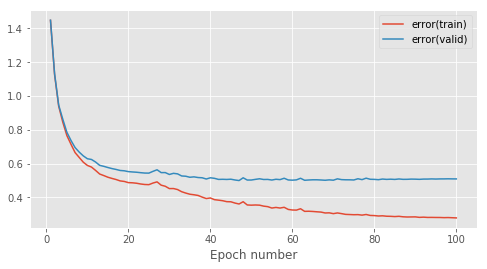

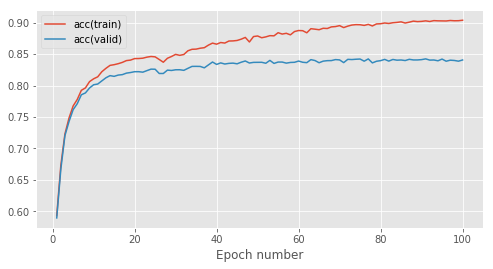

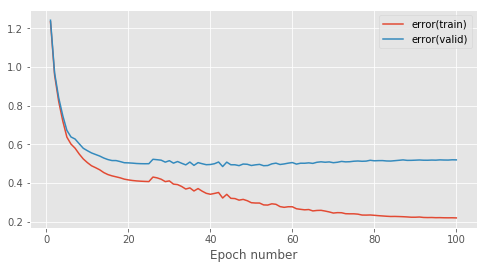

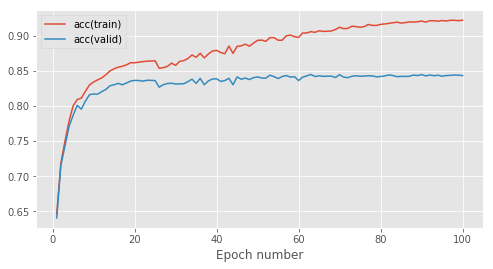

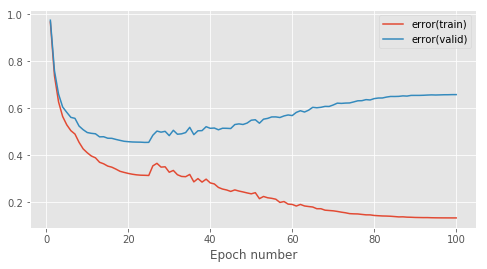

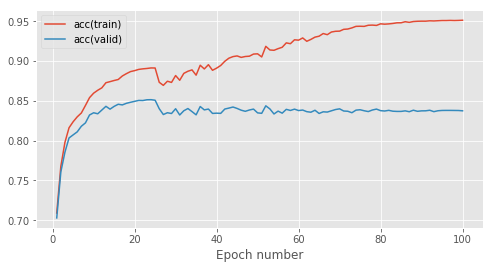

In [4]:
##############SGD With scheduler with special restarts

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 0.0075
# learning_ranges = [1.05,1.1,1.15,1.2]
learning_ranges = [3,5,10]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

for learning_range in learning_ranges:
    

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    sgd_scheduler_special = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=25,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=3.0)

    error = CrossEntropySoftmaxError()

    # Use a basic gradient descent learning rule
    learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=sgd_scheduler_special)

learning_rate 0.00030000000000000003
epoch 1


Epoch 1: 4.5s to complete
    error(train)=1.07e+00, acc(train)=6.87e-01, error(valid)=1.08e+00, acc(valid)=6.86e-01


learning_rate 0.0002999342080487642
epoch 2


Epoch 2: 4.4s to complete
    error(train)=8.47e-01, acc(train)=7.49e-01, error(valid)=8.63e-01, acc(valid)=7.44e-01


learning_rate 0.0002997368971237696
epoch 3


Epoch 3: 4.5s to complete
    error(train)=7.26e-01, acc(train)=7.82e-01, error(valid)=7.55e-01, acc(valid)=7.72e-01


learning_rate 0.00029940826194707734
epoch 4


Epoch 4: 4.5s to complete
    error(train)=6.57e-01, acc(train)=7.97e-01, error(valid)=6.92e-01, acc(valid)=7.88e-01


learning_rate 0.0002989486268419304
epoch 5


Epoch 5: 4.5s to complete
    error(train)=6.00e-01, acc(train)=8.13e-01, error(valid)=6.41e-01, acc(valid)=8.02e-01


learning_rate 0.00029835844541268507
epoch 6


Epoch 6: 4.6s to complete
    error(train)=5.69e-01, acc(train)=8.20e-01, error(valid)=6.17e-01, acc(valid)=8.09e-01


learning_rate 0.0002976383000971585
epoch 7


Epoch 7: 4.5s to complete
    error(train)=5.35e-01, acc(train)=8.28e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


learning_rate 0.000296788901591833
epoch 8


Epoch 8: 4.6s to complete
    error(train)=5.18e-01, acc(train)=8.32e-01, error(valid)=5.82e-01, acc(valid)=8.14e-01


learning_rate 0.0002958110881504842
epoch 9


Epoch 9: 4.7s to complete
    error(train)=4.91e-01, acc(train)=8.38e-01, error(valid)=5.60e-01, acc(valid)=8.20e-01


learning_rate 0.00029470582475692576
epoch 10


Epoch 10: 4.7s to complete
    error(train)=4.81e-01, acc(train)=8.42e-01, error(valid)=5.57e-01, acc(valid)=8.23e-01


learning_rate 0.0002934742021726872
epoch 11


Epoch 11: 5.0s to complete
    error(train)=4.66e-01, acc(train)=8.46e-01, error(valid)=5.45e-01, acc(valid)=8.24e-01


learning_rate 0.00029211743586056346
epoch 12


Epoch 12: 4.6s to complete
    error(train)=4.50e-01, acc(train)=8.50e-01, error(valid)=5.36e-01, acc(valid)=8.27e-01


learning_rate 0.00029063686478510023
epoch 13


Epoch 13: 4.7s to complete
    error(train)=4.43e-01, acc(train)=8.51e-01, error(valid)=5.34e-01, acc(valid)=8.29e-01


learning_rate 0.0002890339500911975
epoch 14


Epoch 14: 4.7s to complete
    error(train)=4.30e-01, acc(train)=8.54e-01, error(valid)=5.29e-01, acc(valid)=8.24e-01


learning_rate 0.00028731027366213596
epoch 15


Epoch 15: 4.7s to complete
    error(train)=4.17e-01, acc(train)=8.58e-01, error(valid)=5.21e-01, acc(valid)=8.28e-01


learning_rate 0.00028546753655844906
epoch 16


Epoch 16: 4.7s to complete
    error(train)=4.05e-01, acc(train)=8.63e-01, error(valid)=5.16e-01, acc(valid)=8.34e-01


learning_rate 0.0002835075573391818
epoch 17


Epoch 17: 4.7s to complete
    error(train)=4.02e-01, acc(train)=8.63e-01, error(valid)=5.18e-01, acc(valid)=8.32e-01


learning_rate 0.0002814322702671925
epoch 18


Epoch 18: 4.7s to complete
    error(train)=3.90e-01, acc(train)=8.66e-01, error(valid)=5.10e-01, acc(valid)=8.33e-01


learning_rate 0.0002792437234002687
epoch 19


Epoch 19: 4.7s to complete
    error(train)=3.87e-01, acc(train)=8.68e-01, error(valid)=5.11e-01, acc(valid)=8.35e-01


learning_rate 0.0002769440765699416
epoch 20


Epoch 20: 4.7s to complete
    error(train)=3.76e-01, acc(train)=8.70e-01, error(valid)=5.06e-01, acc(valid)=8.32e-01


learning_rate 0.000274535599249993
epoch 21


Epoch 21: 4.7s to complete
    error(train)=3.65e-01, acc(train)=8.75e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


learning_rate 0.00027202066831675875
epoch 22


Epoch 22: 4.7s to complete
    error(train)=3.57e-01, acc(train)=8.77e-01, error(valid)=4.99e-01, acc(valid)=8.37e-01


learning_rate 0.0002694017657034386
epoch 23


Epoch 23: 4.7s to complete
    error(train)=3.60e-01, acc(train)=8.75e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


learning_rate 0.00026668147595072794
epoch 24


Epoch 24: 4.7s to complete
    error(train)=3.54e-01, acc(train)=8.76e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


learning_rate 0.0002638624836561882
epoch 25


Epoch 25: 4.8s to complete
    error(train)=3.45e-01, acc(train)=8.80e-01, error(valid)=5.01e-01, acc(valid)=8.38e-01


learning_rate 0.000260947570824873
epoch 26


Epoch 26: 4.7s to complete
    error(train)=3.42e-01, acc(train)=8.81e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


learning_rate 0.0002579396141238252
epoch 27


Epoch 27: 4.8s to complete
    error(train)=3.38e-01, acc(train)=8.82e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


learning_rate 0.0002548415820431536
epoch 28


Epoch 28: 4.7s to complete
    error(train)=3.29e-01, acc(train)=8.85e-01, error(valid)=5.07e-01, acc(valid)=8.37e-01


learning_rate 0.00025165653196649197
epoch 29


Epoch 29: 4.7s to complete
    error(train)=3.28e-01, acc(train)=8.84e-01, error(valid)=5.03e-01, acc(valid)=8.35e-01


learning_rate 0.0002483876071537302
epoch 30


Epoch 30: 5.1s to complete
    error(train)=3.34e-01, acc(train)=8.81e-01, error(valid)=5.17e-01, acc(valid)=8.34e-01


learning_rate 0.0002450380336389964
epoch 31


Epoch 31: 4.8s to complete
    error(train)=3.22e-01, acc(train)=8.86e-01, error(valid)=5.09e-01, acc(valid)=8.37e-01


learning_rate 0.00024161111704695077
epoch 32


Epoch 32: 5.0s to complete
    error(train)=3.18e-01, acc(train)=8.88e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


learning_rate 0.00023811023933053286
epoch 33


Epoch 33: 5.1s to complete
    error(train)=3.10e-01, acc(train)=8.91e-01, error(valid)=5.04e-01, acc(valid)=8.37e-01


learning_rate 0.00023453885543338283
epoch 34


Epoch 34: 5.1s to complete
    error(train)=3.01e-01, acc(train)=8.94e-01, error(valid)=5.06e-01, acc(valid)=8.39e-01


learning_rate 0.0002309004898802287
epoch 35


Epoch 35: 5.1s to complete
    error(train)=2.97e-01, acc(train)=8.95e-01, error(valid)=5.07e-01, acc(valid)=8.40e-01


learning_rate 0.00022719873329860626
epoch 36


Epoch 36: 5.2s to complete
    error(train)=2.98e-01, acc(train)=8.95e-01, error(valid)=5.13e-01, acc(valid)=8.37e-01


learning_rate 0.00022343723887534306
epoch 37


Epoch 37: 5.2s to complete
    error(train)=2.94e-01, acc(train)=8.95e-01, error(valid)=5.14e-01, acc(valid)=8.38e-01


learning_rate 0.00021961971875130408
epoch 38


Epoch 38: 4.9s to complete
    error(train)=2.93e-01, acc(train)=8.95e-01, error(valid)=5.15e-01, acc(valid)=8.37e-01


learning_rate 0.00021574994035795708
epoch 39


Epoch 39: 4.7s to complete
    error(train)=2.89e-01, acc(train)=8.97e-01, error(valid)=5.17e-01, acc(valid)=8.36e-01


learning_rate 0.00021183172269937224
epoch 40


Epoch 40: 4.7s to complete
    error(train)=2.87e-01, acc(train)=8.97e-01, error(valid)=5.22e-01, acc(valid)=8.37e-01


learning_rate 0.00020786893258332631
epoch 41


Epoch 41: 4.8s to complete
    error(train)=2.78e-01, acc(train)=9.02e-01, error(valid)=5.16e-01, acc(valid)=8.39e-01


learning_rate 0.0002038654808052306
epoch 42


Epoch 42: 4.7s to complete
    error(train)=2.79e-01, acc(train)=9.00e-01, error(valid)=5.22e-01, acc(valid)=8.37e-01


learning_rate 0.00019982531828864733
epoch 43


Epoch 43: 4.7s to complete
    error(train)=2.75e-01, acc(train)=9.02e-01, error(valid)=5.24e-01, acc(valid)=8.36e-01


learning_rate 0.0001957524321862057
epoch 44


Epoch 44: 4.8s to complete
    error(train)=2.73e-01, acc(train)=9.02e-01, error(valid)=5.26e-01, acc(valid)=8.34e-01


learning_rate 0.00019165084194476333
epoch 45


Epoch 45: 5.4s to complete
    error(train)=2.73e-01, acc(train)=9.00e-01, error(valid)=5.32e-01, acc(valid)=8.36e-01


learning_rate 0.00018752459533869745
epoch 46


Epoch 46: 5.4s to complete
    error(train)=2.67e-01, acc(train)=9.05e-01, error(valid)=5.29e-01, acc(valid)=8.39e-01


learning_rate 0.00018337776447524057
epoch 47


Epoch 47: 5.3s to complete
    error(train)=2.60e-01, acc(train)=9.07e-01, error(valid)=5.25e-01, acc(valid)=8.38e-01


learning_rate 0.00017921444177580194
epoch 48


Epoch 48: 4.9s to complete
    error(train)=2.61e-01, acc(train)=9.07e-01, error(valid)=5.30e-01, acc(valid)=8.41e-01


learning_rate 0.00017503873593724178
epoch 49


Epoch 49: 4.8s to complete
    error(train)=2.57e-01, acc(train)=9.09e-01, error(valid)=5.30e-01, acc(valid)=8.39e-01


learning_rate 0.00017085476787708376
epoch 50


Epoch 50: 4.8s to complete
    error(train)=2.58e-01, acc(train)=9.08e-01, error(valid)=5.39e-01, acc(valid)=8.35e-01


learning_rate 0.0001666666666666667
epoch 51


Epoch 51: 4.7s to complete
    error(train)=2.50e-01, acc(train)=9.11e-01, error(valid)=5.35e-01, acc(valid)=8.39e-01


learning_rate 0.00016247856545624956
epoch 52


Epoch 52: 4.8s to complete
    error(train)=2.50e-01, acc(train)=9.11e-01, error(valid)=5.37e-01, acc(valid)=8.36e-01


learning_rate 0.00015829459739609154
epoch 53


Epoch 53: 4.7s to complete
    error(train)=2.45e-01, acc(train)=9.13e-01, error(valid)=5.33e-01, acc(valid)=8.39e-01


learning_rate 0.00015411889155753143
epoch 54


Epoch 54: 4.7s to complete
    error(train)=2.48e-01, acc(train)=9.11e-01, error(valid)=5.44e-01, acc(valid)=8.37e-01


learning_rate 0.00014995556885809275
epoch 55


Epoch 55: 4.8s to complete
    error(train)=2.44e-01, acc(train)=9.12e-01, error(valid)=5.44e-01, acc(valid)=8.40e-01


learning_rate 0.00014580873799463587
epoch 56


Epoch 56: 4.7s to complete
    error(train)=2.40e-01, acc(train)=9.15e-01, error(valid)=5.45e-01, acc(valid)=8.38e-01


learning_rate 0.00014168249138857004
epoch 57


Epoch 57: 4.7s to complete
    error(train)=2.38e-01, acc(train)=9.15e-01, error(valid)=5.46e-01, acc(valid)=8.37e-01


learning_rate 0.0001375809011471277
epoch 58


Epoch 58: 4.8s to complete
    error(train)=2.45e-01, acc(train)=9.10e-01, error(valid)=5.61e-01, acc(valid)=8.34e-01


learning_rate 0.00013350801504468605
epoch 59


Epoch 59: 4.8s to complete
    error(train)=2.34e-01, acc(train)=9.17e-01, error(valid)=5.47e-01, acc(valid)=8.37e-01


learning_rate 0.00012946785252810277
epoch 60


Epoch 60: 4.8s to complete
    error(train)=2.32e-01, acc(train)=9.18e-01, error(valid)=5.50e-01, acc(valid)=8.37e-01


learning_rate 0.000125464400750007
epoch 61


Epoch 61: 4.8s to complete
    error(train)=2.31e-01, acc(train)=9.18e-01, error(valid)=5.50e-01, acc(valid)=8.38e-01


learning_rate 0.00012150161063396116
epoch 62


Epoch 62: 4.9s to complete
    error(train)=2.32e-01, acc(train)=9.17e-01, error(valid)=5.58e-01, acc(valid)=8.35e-01


learning_rate 0.00011758339297537628
epoch 63


Epoch 63: 4.7s to complete
    error(train)=2.29e-01, acc(train)=9.19e-01, error(valid)=5.60e-01, acc(valid)=8.39e-01


learning_rate 0.00011371361458202927
epoch 64


Epoch 64: 4.8s to complete
    error(train)=2.28e-01, acc(train)=9.19e-01, error(valid)=5.60e-01, acc(valid)=8.36e-01


learning_rate 0.00010989609445799032
epoch 65


Epoch 65: 4.8s to complete
    error(train)=2.24e-01, acc(train)=9.21e-01, error(valid)=5.61e-01, acc(valid)=8.37e-01


learning_rate 0.0001061346000347271
epoch 66


Epoch 66: 4.7s to complete
    error(train)=2.23e-01, acc(train)=9.21e-01, error(valid)=5.61e-01, acc(valid)=8.36e-01


learning_rate 0.00010243284345310461
epoch 67


Epoch 67: 4.8s to complete
    error(train)=2.23e-01, acc(train)=9.20e-01, error(valid)=5.68e-01, acc(valid)=8.37e-01


learning_rate 9.879447789995049e-05
epoch 68


Epoch 68: 4.7s to complete
    error(train)=2.21e-01, acc(train)=9.21e-01, error(valid)=5.70e-01, acc(valid)=8.34e-01


learning_rate 9.522309400280042e-05
epoch 69


Epoch 69: 4.8s to complete
    error(train)=2.19e-01, acc(train)=9.22e-01, error(valid)=5.70e-01, acc(valid)=8.36e-01


learning_rate 9.172221628638263e-05
epoch 70


Epoch 70: 4.7s to complete
    error(train)=2.17e-01, acc(train)=9.23e-01, error(valid)=5.70e-01, acc(valid)=8.35e-01


learning_rate 8.829529969433693e-05
epoch 71


Epoch 71: 4.7s to complete
    error(train)=2.16e-01, acc(train)=9.24e-01, error(valid)=5.69e-01, acc(valid)=8.36e-01


learning_rate 8.494572617960317e-05
epoch 72


Epoch 72: 4.7s to complete
    error(train)=2.17e-01, acc(train)=9.23e-01, error(valid)=5.73e-01, acc(valid)=8.37e-01


learning_rate 8.167680136684137e-05
epoch 73


Epoch 73: 4.8s to complete
    error(train)=2.14e-01, acc(train)=9.24e-01, error(valid)=5.74e-01, acc(valid)=8.37e-01


learning_rate 7.849175129017978e-05
epoch 74


Epoch 74: 4.8s to complete
    error(train)=2.12e-01, acc(train)=9.25e-01, error(valid)=5.73e-01, acc(valid)=8.35e-01


learning_rate 7.539371920950818e-05
epoch 75


Epoch 75: 4.7s to complete
    error(train)=2.11e-01, acc(train)=9.26e-01, error(valid)=5.75e-01, acc(valid)=8.37e-01


learning_rate 7.238576250846035e-05
epoch 76


Epoch 76: 4.6s to complete
    error(train)=2.10e-01, acc(train)=9.26e-01, error(valid)=5.80e-01, acc(valid)=8.35e-01


learning_rate 6.947084967714515e-05
epoch 77


Epoch 77: 4.7s to complete
    error(train)=2.09e-01, acc(train)=9.27e-01, error(valid)=5.76e-01, acc(valid)=8.34e-01


learning_rate 6.665185738260539e-05
epoch 78


Epoch 78: 4.7s to complete
    error(train)=2.08e-01, acc(train)=9.27e-01, error(valid)=5.78e-01, acc(valid)=8.36e-01


learning_rate 6.393156762989478e-05
epoch 79


Epoch 79: 4.7s to complete
    error(train)=2.06e-01, acc(train)=9.28e-01, error(valid)=5.79e-01, acc(valid)=8.34e-01


learning_rate 6.131266501657462e-05
epoch 80


Epoch 80: 4.7s to complete
    error(train)=2.06e-01, acc(train)=9.27e-01, error(valid)=5.79e-01, acc(valid)=8.35e-01


learning_rate 5.879773408334036e-05
epoch 81


Epoch 81: 4.6s to complete
    error(train)=2.07e-01, acc(train)=9.27e-01, error(valid)=5.85e-01, acc(valid)=8.35e-01


learning_rate 5.638925676339174e-05
epoch 82


Epoch 82: 4.6s to complete
    error(train)=2.04e-01, acc(train)=9.28e-01, error(valid)=5.84e-01, acc(valid)=8.36e-01


learning_rate 5.408960993306469e-05
epoch 83


Epoch 83: 4.7s to complete
    error(train)=2.04e-01, acc(train)=9.28e-01, error(valid)=5.84e-01, acc(valid)=8.35e-01


learning_rate 5.190106306614087e-05
epoch 84


Epoch 84: 4.7s to complete
    error(train)=2.02e-01, acc(train)=9.29e-01, error(valid)=5.86e-01, acc(valid)=8.36e-01


learning_rate 4.982577599415155e-05
epoch 85


Epoch 85: 4.7s to complete
    error(train)=2.04e-01, acc(train)=9.29e-01, error(valid)=5.87e-01, acc(valid)=8.34e-01


learning_rate 4.78657967748843e-05
epoch 86


Epoch 86: 4.7s to complete
    error(train)=2.02e-01, acc(train)=9.29e-01, error(valid)=5.88e-01, acc(valid)=8.37e-01


learning_rate 4.602305967119742e-05
epoch 87


Epoch 87: 4.8s to complete
    error(train)=2.00e-01, acc(train)=9.30e-01, error(valid)=5.88e-01, acc(valid)=8.36e-01


learning_rate 4.429938324213585e-05
epoch 88


Epoch 88: 4.7s to complete
    error(train)=2.02e-01, acc(train)=9.29e-01, error(valid)=5.92e-01, acc(valid)=8.35e-01


learning_rate 4.269646854823316e-05
epoch 89


Epoch 89: 4.7s to complete
    error(train)=2.00e-01, acc(train)=9.30e-01, error(valid)=5.92e-01, acc(valid)=8.36e-01


learning_rate 4.121589747276994e-05
epoch 90


Epoch 90: 4.7s to complete
    error(train)=2.00e-01, acc(train)=9.30e-01, error(valid)=5.91e-01, acc(valid)=8.34e-01


learning_rate 3.98591311606462e-05
epoch 91


Epoch 91: 4.7s to complete
    error(train)=1.99e-01, acc(train)=9.30e-01, error(valid)=5.93e-01, acc(valid)=8.36e-01


learning_rate 3.862750857640759e-05
epoch 92


Epoch 92: 4.8s to complete
    error(train)=1.99e-01, acc(train)=9.30e-01, error(valid)=5.92e-01, acc(valid)=8.35e-01


learning_rate 3.752224518284919e-05
epoch 93


Epoch 93: 4.7s to complete
    error(train)=1.98e-01, acc(train)=9.31e-01, error(valid)=5.93e-01, acc(valid)=8.34e-01


learning_rate 3.654443174150035e-05
epoch 94


Epoch 94: 5.1s to complete
    error(train)=1.97e-01, acc(train)=9.31e-01, error(valid)=5.94e-01, acc(valid)=8.36e-01


learning_rate 3.5695033236174856e-05
epoch 95


Epoch 95: 5.3s to complete
    error(train)=1.98e-01, acc(train)=9.30e-01, error(valid)=5.96e-01, acc(valid)=8.36e-01


learning_rate 3.497488792064832e-05
epoch 96


Epoch 96: 5.4s to complete
    error(train)=1.96e-01, acc(train)=9.31e-01, error(valid)=5.98e-01, acc(valid)=8.37e-01


learning_rate 3.4384706491402965e-05
epoch 97


Epoch 97: 4.8s to complete
    error(train)=1.96e-01, acc(train)=9.31e-01, error(valid)=5.97e-01, acc(valid)=8.35e-01


learning_rate 3.3925071386256e-05
epoch 98


Epoch 98: 4.9s to complete
    error(train)=1.95e-01, acc(train)=9.32e-01, error(valid)=5.97e-01, acc(valid)=8.35e-01


learning_rate 3.359643620956379e-05
epoch 99


Epoch 99: 4.7s to complete
    error(train)=1.95e-01, acc(train)=9.31e-01, error(valid)=6.00e-01, acc(valid)=8.36e-01


learning_rate 3.339912528456912e-05
epoch 100


Epoch 100: 4.8s to complete
    error(train)=1.94e-01, acc(train)=9.32e-01, error(valid)=5.99e-01, acc(valid)=8.34e-01


learning_rate 0.0005
epoch 1


Epoch 1: 4.5s to complete
    error(train)=9.27e-01, acc(train)=7.26e-01, error(valid)=9.43e-01, acc(valid)=7.20e-01


learning_rate 0.0004998815744877756
epoch 2


Epoch 2: 4.5s to complete
    error(train)=7.29e-01, acc(train)=7.76e-01, error(valid)=7.56e-01, acc(valid)=7.68e-01


learning_rate 0.0004995264148227852
epoch 3


Epoch 3: 4.6s to complete
    error(train)=6.24e-01, acc(train)=8.04e-01, error(valid)=6.61e-01, acc(valid)=7.96e-01


learning_rate 0.0004989348715047393
epoch 4


Epoch 4: 4.5s to complete
    error(train)=5.71e-01, acc(train)=8.17e-01, error(valid)=6.22e-01, acc(valid)=8.05e-01


learning_rate 0.0004981075283154747
epoch 5


Epoch 5: 4.6s to complete
    error(train)=5.23e-01, acc(train)=8.29e-01, error(valid)=5.82e-01, acc(valid)=8.11e-01


learning_rate 0.0004970452017428332
epoch 6


Epoch 6: 4.6s to complete
    error(train)=4.90e-01, acc(train)=8.38e-01, error(valid)=5.59e-01, acc(valid)=8.18e-01


learning_rate 0.0004957489401748854
epoch 7


Epoch 7: 4.7s to complete
    error(train)=4.73e-01, acc(train)=8.42e-01, error(valid)=5.54e-01, acc(valid)=8.18e-01


learning_rate 0.0004942200228652995
epoch 8


Epoch 8: 4.7s to complete
    error(train)=4.42e-01, acc(train)=8.52e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


learning_rate 0.0004924599586708715
epoch 9


Epoch 9: 4.7s to complete
    error(train)=4.21e-01, acc(train)=8.57e-01, error(valid)=5.25e-01, acc(valid)=8.29e-01


learning_rate 0.0004904704845624663
epoch 10


Epoch 10: 4.7s to complete
    error(train)=4.08e-01, acc(train)=8.59e-01, error(valid)=5.18e-01, acc(valid)=8.28e-01


learning_rate 0.0004882535639108369
epoch 11


Epoch 11: 4.6s to complete
    error(train)=3.95e-01, acc(train)=8.63e-01, error(valid)=5.15e-01, acc(valid)=8.30e-01


learning_rate 0.00048581138454901416
epoch 12


Epoch 12: 4.7s to complete
    error(train)=3.88e-01, acc(train)=8.67e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


learning_rate 0.00048314635661318034
epoch 13


Epoch 13: 4.7s to complete
    error(train)=3.81e-01, acc(train)=8.67e-01, error(valid)=5.20e-01, acc(valid)=8.27e-01


learning_rate 0.00048026111016415547
epoch 14


Epoch 14: 4.7s to complete
    error(train)=3.65e-01, acc(train)=8.71e-01, error(valid)=5.11e-01, acc(valid)=8.32e-01


learning_rate 0.0004771584925918447
epoch 15


Epoch 15: 4.7s to complete
    error(train)=3.63e-01, acc(train)=8.73e-01, error(valid)=5.15e-01, acc(valid)=8.35e-01


learning_rate 0.00047384156580520826
epoch 16


Epoch 16: 4.7s to complete
    error(train)=3.43e-01, acc(train)=8.78e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


learning_rate 0.00047031360321052724
epoch 17


Epoch 17: 4.7s to complete
    error(train)=3.30e-01, acc(train)=8.83e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


learning_rate 0.00046657808648094647
epoch 18


Epoch 18: 4.7s to complete
    error(train)=3.21e-01, acc(train)=8.86e-01, error(valid)=5.01e-01, acc(valid)=8.40e-01


learning_rate 0.00046263870212048363
epoch 19


Epoch 19: 4.7s to complete
    error(train)=3.20e-01, acc(train)=8.86e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


learning_rate 0.0004584993378258948
epoch 20


Epoch 20: 4.7s to complete
    error(train)=3.17e-01, acc(train)=8.85e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


learning_rate 0.0004541640786499874
epoch 21


Epoch 21: 4.7s to complete
    error(train)=3.04e-01, acc(train)=8.91e-01, error(valid)=5.09e-01, acc(valid)=8.39e-01


learning_rate 0.0004496372029701657
epoch 22


Epoch 22: 4.7s to complete
    error(train)=2.97e-01, acc(train)=8.94e-01, error(valid)=5.10e-01, acc(valid)=8.37e-01


learning_rate 0.0004449231782661894
epoch 23


Epoch 23: 4.8s to complete
    error(train)=2.94e-01, acc(train)=8.93e-01, error(valid)=5.13e-01, acc(valid)=8.36e-01


learning_rate 0.0004400266567113103
epoch 24


Epoch 24: 4.8s to complete
    error(train)=2.91e-01, acc(train)=8.94e-01, error(valid)=5.22e-01, acc(valid)=8.38e-01


learning_rate 0.0004349524705811388
epoch 25


Epoch 25: 4.8s to complete
    error(train)=2.80e-01, acc(train)=8.98e-01, error(valid)=5.14e-01, acc(valid)=8.41e-01


learning_rate 0.0004297056274847714
epoch 26


Epoch 26: 4.7s to complete
    error(train)=2.77e-01, acc(train)=8.99e-01, error(valid)=5.20e-01, acc(valid)=8.40e-01


learning_rate 0.0004242913054228853
epoch 27


Epoch 27: 4.7s to complete
    error(train)=2.70e-01, acc(train)=9.00e-01, error(valid)=5.31e-01, acc(valid)=8.37e-01


learning_rate 0.00041871484767767647
epoch 28


Epoch 28: 4.8s to complete
    error(train)=2.62e-01, acc(train)=9.03e-01, error(valid)=5.30e-01, acc(valid)=8.37e-01


learning_rate 0.00041298175753968553
epoch 29


Epoch 29: 4.7s to complete
    error(train)=2.64e-01, acc(train)=9.03e-01, error(valid)=5.39e-01, acc(valid)=8.37e-01


learning_rate 0.00040709769287671437
epoch 30


Epoch 30: 4.8s to complete
    error(train)=2.60e-01, acc(train)=9.03e-01, error(valid)=5.42e-01, acc(valid)=8.37e-01


learning_rate 0.00040106846055019355
epoch 31


Epoch 31: 4.8s to complete
    error(train)=2.48e-01, acc(train)=9.08e-01, error(valid)=5.44e-01, acc(valid)=8.38e-01


learning_rate 0.00039490001068451133
epoch 32


Epoch 32: 5.0s to complete
    error(train)=2.50e-01, acc(train)=9.06e-01, error(valid)=5.48e-01, acc(valid)=8.33e-01


learning_rate 0.0003885984307949592
epoch 33


Epoch 33: 5.1s to complete
    error(train)=2.40e-01, acc(train)=9.09e-01, error(valid)=5.52e-01, acc(valid)=8.34e-01


learning_rate 0.0003821699397800891
epoch 34


Epoch 34: 5.2s to complete
    error(train)=2.42e-01, acc(train)=9.09e-01, error(valid)=5.58e-01, acc(valid)=8.33e-01


learning_rate 0.00037562088178441167
epoch 35


Epoch 35: 5.1s to complete
    error(train)=2.33e-01, acc(train)=9.13e-01, error(valid)=5.62e-01, acc(valid)=8.37e-01


learning_rate 0.00036895771993749124
epoch 36


Epoch 36: 5.2s to complete
    error(train)=2.33e-01, acc(train)=9.12e-01, error(valid)=5.65e-01, acc(valid)=8.36e-01


learning_rate 0.00036218702997561745
epoch 37


Epoch 37: 5.2s to complete
    error(train)=2.22e-01, acc(train)=9.16e-01, error(valid)=5.71e-01, acc(valid)=8.35e-01


learning_rate 0.0003553154937523473
epoch 38


Epoch 38: 5.0s to complete
    error(train)=2.18e-01, acc(train)=9.19e-01, error(valid)=5.76e-01, acc(valid)=8.35e-01


learning_rate 0.00034834989264432274
epoch 39


Epoch 39: 4.7s to complete
    error(train)=2.17e-01, acc(train)=9.17e-01, error(valid)=5.76e-01, acc(valid)=8.39e-01


learning_rate 0.00034129710085887
epoch 40


Epoch 40: 4.8s to complete
    error(train)=2.18e-01, acc(train)=9.17e-01, error(valid)=5.85e-01, acc(valid)=8.33e-01


learning_rate 0.00033416407864998737
epoch 41


Epoch 41: 4.7s to complete
    error(train)=2.22e-01, acc(train)=9.13e-01, error(valid)=6.00e-01, acc(valid)=8.28e-01


learning_rate 0.00032695786544941505
epoch 42


Epoch 42: 4.6s to complete
    error(train)=2.05e-01, acc(train)=9.22e-01, error(valid)=5.96e-01, acc(valid)=8.34e-01


learning_rate 0.00031968557291956525
epoch 43


Epoch 43: 5.5s to complete
    error(train)=2.04e-01, acc(train)=9.22e-01, error(valid)=6.08e-01, acc(valid)=8.34e-01


learning_rate 0.0003123543779351703
epoch 44


Epoch 44: 5.2s to complete
    error(train)=1.97e-01, acc(train)=9.25e-01, error(valid)=6.00e-01, acc(valid)=8.34e-01


learning_rate 0.00030497151550057394
epoch 45


Epoch 45: 5.1s to complete
    error(train)=1.98e-01, acc(train)=9.24e-01, error(valid)=6.15e-01, acc(valid)=8.34e-01


learning_rate 0.00029754427160965546
epoch 46


Epoch 46: 4.7s to complete
    error(train)=1.93e-01, acc(train)=9.26e-01, error(valid)=6.14e-01, acc(valid)=8.34e-01


learning_rate 0.00029007997605543304
epoch 47


Epoch 47: 4.7s to complete
    error(train)=1.92e-01, acc(train)=9.27e-01, error(valid)=6.28e-01, acc(valid)=8.31e-01


learning_rate 0.0002825859951964435
epoch 48


Epoch 48: 4.7s to complete
    error(train)=1.87e-01, acc(train)=9.29e-01, error(valid)=6.15e-01, acc(valid)=8.33e-01


learning_rate 0.0002750697246870352
epoch 49


Epoch 49: 4.7s to complete
    error(train)=1.86e-01, acc(train)=9.29e-01, error(valid)=6.33e-01, acc(valid)=8.32e-01


learning_rate 0.0002675385821787508
epoch 50


Epoch 50: 4.7s to complete
    error(train)=1.86e-01, acc(train)=9.29e-01, error(valid)=6.47e-01, acc(valid)=8.31e-01


learning_rate 0.00026000000000000003
epoch 51


Epoch 51: 4.7s to complete
    error(train)=1.89e-01, acc(train)=9.25e-01, error(valid)=6.58e-01, acc(valid)=8.29e-01


learning_rate 0.0002524614178212492
epoch 52


Epoch 52: 4.6s to complete
    error(train)=1.76e-01, acc(train)=9.34e-01, error(valid)=6.50e-01, acc(valid)=8.30e-01


learning_rate 0.00024493027531296484
epoch 53


Epoch 53: 4.7s to complete
    error(train)=1.75e-01, acc(train)=9.33e-01, error(valid)=6.55e-01, acc(valid)=8.31e-01


learning_rate 0.00023741400480355656
epoch 54


Epoch 54: 4.6s to complete
    error(train)=1.70e-01, acc(train)=9.35e-01, error(valid)=6.65e-01, acc(valid)=8.29e-01


learning_rate 0.00022992002394456695
epoch 55


Epoch 55: 4.6s to complete
    error(train)=1.69e-01, acc(train)=9.36e-01, error(valid)=6.69e-01, acc(valid)=8.28e-01


learning_rate 0.00022245572839034455
epoch 56


Epoch 56: 4.7s to complete
    error(train)=1.65e-01, acc(train)=9.37e-01, error(valid)=6.71e-01, acc(valid)=8.30e-01


learning_rate 0.00021502848449942604
epoch 57


Epoch 57: 4.7s to complete
    error(train)=1.62e-01, acc(train)=9.39e-01, error(valid)=6.79e-01, acc(valid)=8.32e-01


learning_rate 0.00020764562206482986
epoch 58


Epoch 58: 4.6s to complete
    error(train)=1.59e-01, acc(train)=9.40e-01, error(valid)=6.79e-01, acc(valid)=8.33e-01


learning_rate 0.0002003144270804349
epoch 59


Epoch 59: 4.7s to complete
    error(train)=1.59e-01, acc(train)=9.40e-01, error(valid)=6.92e-01, acc(valid)=8.25e-01


learning_rate 0.00019304213455058501
epoch 60


Epoch 60: 4.7s to complete
    error(train)=1.58e-01, acc(train)=9.39e-01, error(valid)=6.98e-01, acc(valid)=8.31e-01


learning_rate 0.00018583592135001264
epoch 61


Epoch 61: 4.7s to complete
    error(train)=1.53e-01, acc(train)=9.42e-01, error(valid)=7.06e-01, acc(valid)=8.28e-01


learning_rate 0.00017870289914113008
epoch 62


Epoch 62: 4.8s to complete
    error(train)=1.52e-01, acc(train)=9.42e-01, error(valid)=7.03e-01, acc(valid)=8.30e-01


learning_rate 0.0001716501073556773
epoch 63


Epoch 63: 4.7s to complete
    error(train)=1.48e-01, acc(train)=9.45e-01, error(valid)=7.10e-01, acc(valid)=8.29e-01


learning_rate 0.00016468450624765267
epoch 64


Epoch 64: 4.7s to complete
    error(train)=1.48e-01, acc(train)=9.44e-01, error(valid)=7.17e-01, acc(valid)=8.30e-01


learning_rate 0.00015781297002438255
epoch 65


Epoch 65: 4.7s to complete
    error(train)=1.44e-01, acc(train)=9.46e-01, error(valid)=7.22e-01, acc(valid)=8.28e-01


learning_rate 0.00015104228006250877
epoch 66


Epoch 66: 4.7s to complete
    error(train)=1.44e-01, acc(train)=9.46e-01, error(valid)=7.30e-01, acc(valid)=8.31e-01


learning_rate 0.0001443791182155883
epoch 67


Epoch 67: 4.7s to complete
    error(train)=1.44e-01, acc(train)=9.45e-01, error(valid)=7.34e-01, acc(valid)=8.27e-01


learning_rate 0.0001378300602199109
epoch 68


Epoch 68: 4.7s to complete
    error(train)=1.40e-01, acc(train)=9.48e-01, error(valid)=7.35e-01, acc(valid)=8.30e-01


learning_rate 0.00013140156920504075
epoch 69


Epoch 69: 4.8s to complete
    error(train)=1.39e-01, acc(train)=9.48e-01, error(valid)=7.37e-01, acc(valid)=8.28e-01


learning_rate 0.00012509998931548873
epoch 70


Epoch 70: 4.8s to complete
    error(train)=1.36e-01, acc(train)=9.49e-01, error(valid)=7.43e-01, acc(valid)=8.30e-01


learning_rate 0.00011893153944980647
epoch 71


Epoch 71: 4.7s to complete
    error(train)=1.35e-01, acc(train)=9.49e-01, error(valid)=7.49e-01, acc(valid)=8.27e-01


learning_rate 0.0001129023071232857
epoch 72


Epoch 72: 4.7s to complete
    error(train)=1.34e-01, acc(train)=9.50e-01, error(valid)=7.56e-01, acc(valid)=8.27e-01


learning_rate 0.00010701824246031446
epoch 73


Epoch 73: 4.7s to complete
    error(train)=1.33e-01, acc(train)=9.50e-01, error(valid)=7.59e-01, acc(valid)=8.27e-01


learning_rate 0.0001012851523223236
epoch 74


Epoch 74: 4.6s to complete
    error(train)=1.32e-01, acc(train)=9.51e-01, error(valid)=7.66e-01, acc(valid)=8.27e-01


learning_rate 9.570869457711471e-05
epoch 75


Epoch 75: 4.7s to complete
    error(train)=1.30e-01, acc(train)=9.51e-01, error(valid)=7.66e-01, acc(valid)=8.30e-01


learning_rate 9.029437251522861e-05
epoch 76


Epoch 76: 4.7s to complete
    error(train)=1.29e-01, acc(train)=9.52e-01, error(valid)=7.71e-01, acc(valid)=8.27e-01


learning_rate 8.504752941886128e-05
epoch 77


Epoch 77: 4.6s to complete
    error(train)=1.27e-01, acc(train)=9.53e-01, error(valid)=7.75e-01, acc(valid)=8.29e-01


learning_rate 7.99733432886897e-05
epoch 78


Epoch 78: 4.7s to complete
    error(train)=1.26e-01, acc(train)=9.53e-01, error(valid)=7.75e-01, acc(valid)=8.28e-01


learning_rate 7.50768217338106e-05
epoch 79


Epoch 79: 4.7s to complete
    error(train)=1.26e-01, acc(train)=9.53e-01, error(valid)=7.81e-01, acc(valid)=8.28e-01


learning_rate 7.03627970298343e-05
epoch 80


Epoch 80: 4.6s to complete
    error(train)=1.25e-01, acc(train)=9.54e-01, error(valid)=7.85e-01, acc(valid)=8.27e-01


learning_rate 6.583592135001264e-05
epoch 81


Epoch 81: 5.0s to complete
    error(train)=1.25e-01, acc(train)=9.54e-01, error(valid)=7.86e-01, acc(valid)=8.27e-01


learning_rate 6.150066217410513e-05
epoch 82


Epoch 82: 4.6s to complete
    error(train)=1.23e-01, acc(train)=9.55e-01, error(valid)=7.91e-01, acc(valid)=8.28e-01


learning_rate 5.736129787951643e-05
epoch 83


Epoch 83: 4.6s to complete
    error(train)=1.24e-01, acc(train)=9.54e-01, error(valid)=7.93e-01, acc(valid)=8.28e-01


learning_rate 5.342191351905355e-05
epoch 84


Epoch 84: 4.6s to complete
    error(train)=1.21e-01, acc(train)=9.56e-01, error(valid)=7.96e-01, acc(valid)=8.27e-01


learning_rate 4.968639678947279e-05
epoch 85


Epoch 85: 4.7s to complete
    error(train)=1.21e-01, acc(train)=9.56e-01, error(valid)=7.98e-01, acc(valid)=8.27e-01


learning_rate 4.6158434194791735e-05
epoch 86


Epoch 86: 4.7s to complete
    error(train)=1.20e-01, acc(train)=9.56e-01, error(valid)=7.99e-01, acc(valid)=8.27e-01


learning_rate 4.284150740815536e-05
epoch 87


Epoch 87: 4.7s to complete
    error(train)=1.20e-01, acc(train)=9.56e-01, error(valid)=8.03e-01, acc(valid)=8.27e-01


learning_rate 3.9738889835844526e-05
epoch 88


Epoch 88: 4.8s to complete
    error(train)=1.19e-01, acc(train)=9.57e-01, error(valid)=8.05e-01, acc(valid)=8.26e-01


learning_rate 3.685364338681968e-05
epoch 89


Epoch 89: 4.6s to complete
    error(train)=1.19e-01, acc(train)=9.57e-01, error(valid)=8.07e-01, acc(valid)=8.27e-01


learning_rate 3.418861545098589e-05
epoch 90


Epoch 90: 4.7s to complete
    error(train)=1.18e-01, acc(train)=9.56e-01, error(valid)=8.07e-01, acc(valid)=8.27e-01


learning_rate 3.174643608916316e-05
epoch 91


Epoch 91: 4.7s to complete
    error(train)=1.18e-01, acc(train)=9.57e-01, error(valid)=8.11e-01, acc(valid)=8.28e-01


learning_rate 2.9529515437533666e-05
epoch 92


Epoch 92: 5.0s to complete
    error(train)=1.18e-01, acc(train)=9.57e-01, error(valid)=8.12e-01, acc(valid)=8.26e-01


learning_rate 2.7540041329128542e-05
epoch 93


Epoch 93: 5.2s to complete
    error(train)=1.17e-01, acc(train)=9.57e-01, error(valid)=8.15e-01, acc(valid)=8.26e-01


learning_rate 2.5779977134700618e-05
epoch 94


Epoch 94: 5.3s to complete
    error(train)=1.17e-01, acc(train)=9.57e-01, error(valid)=8.16e-01, acc(valid)=8.28e-01


learning_rate 2.4251059825114733e-05
epoch 95


Epoch 95: 4.9s to complete
    error(train)=1.16e-01, acc(train)=9.58e-01, error(valid)=8.16e-01, acc(valid)=8.26e-01


learning_rate 2.2954798257166962e-05
epoch 96


Epoch 96: 4.8s to complete
    error(train)=1.17e-01, acc(train)=9.57e-01, error(valid)=8.19e-01, acc(valid)=8.27e-01


learning_rate 2.1892471684525338e-05
epoch 97


Epoch 97: 4.8s to complete
    error(train)=1.17e-01, acc(train)=9.58e-01, error(valid)=8.19e-01, acc(valid)=8.26e-01


learning_rate 2.1065128495260804e-05
epoch 98


Epoch 98: 4.7s to complete
    error(train)=1.16e-01, acc(train)=9.58e-01, error(valid)=8.20e-01, acc(valid)=8.27e-01


learning_rate 2.0473585177214826e-05
epoch 99


Epoch 99: 4.8s to complete
    error(train)=1.15e-01, acc(train)=9.58e-01, error(valid)=8.21e-01, acc(valid)=8.27e-01


learning_rate 2.0118425512224417e-05
epoch 100


Epoch 100: 5.2s to complete
    error(train)=1.16e-01, acc(train)=9.58e-01, error(valid)=8.22e-01, acc(valid)=8.28e-01


learning_rate 0.001
epoch 1


Epoch 1: 4.6s to complete
    error(train)=7.54e-01, acc(train)=7.70e-01, error(valid)=7.75e-01, acc(valid)=7.62e-01


learning_rate 0.0009997557473810372
epoch 2


Epoch 2: 4.7s to complete
    error(train)=6.07e-01, acc(train)=8.03e-01, error(valid)=6.50e-01, acc(valid)=7.89e-01


learning_rate 0.0009990232305719944
epoch 3


Epoch 3: 5.0s to complete
    error(train)=5.44e-01, acc(train)=8.20e-01, error(valid)=6.01e-01, acc(valid)=8.04e-01


learning_rate 0.0009978031724785245
epoch 4


Epoch 4: 4.8s to complete
    error(train)=4.83e-01, acc(train)=8.37e-01, error(valid)=5.55e-01, acc(valid)=8.18e-01


learning_rate 0.0009960967771506667
epoch 5


Epoch 5: 4.7s to complete
    error(train)=4.58e-01, acc(train)=8.43e-01, error(valid)=5.36e-01, acc(valid)=8.22e-01


learning_rate 0.0009939057285945933
epoch 6


Epoch 6: 4.8s to complete
    error(train)=4.48e-01, acc(train)=8.46e-01, error(valid)=5.43e-01, acc(valid)=8.22e-01


learning_rate 0.000991232189110701
epoch 7


Epoch 7: 4.8s to complete
    error(train)=4.17e-01, acc(train)=8.55e-01, error(valid)=5.24e-01, acc(valid)=8.27e-01


learning_rate 0.00098807879715968
epoch 8


Epoch 8: 4.8s to complete
    error(train)=3.96e-01, acc(train)=8.60e-01, error(valid)=5.13e-01, acc(valid)=8.29e-01


learning_rate 0.0009844486647586723
epoch 9


Epoch 9: 4.9s to complete
    error(train)=3.76e-01, acc(train)=8.67e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


learning_rate 0.0009803453744100868
epoch 10


Epoch 10: 4.8s to complete
    error(train)=3.74e-01, acc(train)=8.67e-01, error(valid)=5.21e-01, acc(valid)=8.29e-01


learning_rate 0.0009757729755661011
epoch 11


Epoch 11: 4.8s to complete
    error(train)=3.43e-01, acc(train)=8.76e-01, error(valid)=5.03e-01, acc(valid)=8.37e-01


learning_rate 0.0009707359806323416
epoch 12


Epoch 12: 4.8s to complete
    error(train)=3.40e-01, acc(train)=8.74e-01, error(valid)=5.16e-01, acc(valid)=8.35e-01


learning_rate 0.0009652393605146844
epoch 13


Epoch 13: 4.8s to complete
    error(train)=3.14e-01, acc(train)=8.84e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


learning_rate 0.0009592885397135706
epoch 14


Epoch 14: 4.7s to complete
    error(train)=3.21e-01, acc(train)=8.82e-01, error(valid)=5.22e-01, acc(valid)=8.35e-01


learning_rate 0.0009528893909706797
epoch 15


Epoch 15: 4.8s to complete
    error(train)=3.01e-01, acc(train)=8.87e-01, error(valid)=5.12e-01, acc(valid)=8.37e-01


learning_rate 0.0009460482294732421
epoch 16


Epoch 16: 4.9s to complete
    error(train)=3.00e-01, acc(train)=8.85e-01, error(valid)=5.30e-01, acc(valid)=8.32e-01


learning_rate 0.0009387718066217125
epoch 17


Epoch 17: 5.0s to complete
    error(train)=2.87e-01, acc(train)=8.93e-01, error(valid)=5.27e-01, acc(valid)=8.35e-01


learning_rate 0.0009310673033669522
epoch 18


Epoch 18: 5.1s to complete
    error(train)=2.86e-01, acc(train)=8.92e-01, error(valid)=5.40e-01, acc(valid)=8.33e-01


learning_rate 0.0009229423231234975
epoch 19


Epoch 19: 4.9s to complete
    error(train)=2.78e-01, acc(train)=8.94e-01, error(valid)=5.43e-01, acc(valid)=8.35e-01


learning_rate 0.0009144048842659081
epoch 20


Epoch 20: 4.9s to complete
    error(train)=2.71e-01, acc(train)=8.95e-01, error(valid)=5.45e-01, acc(valid)=8.34e-01


learning_rate 0.000905463412215599
epoch 21


Epoch 21: 4.9s to complete
    error(train)=2.67e-01, acc(train)=8.96e-01, error(valid)=5.64e-01, acc(valid)=8.31e-01


learning_rate 0.0008961267311259668
epoch 22


Epoch 22: 4.9s to complete
    error(train)=2.69e-01, acc(train)=8.97e-01, error(valid)=5.81e-01, acc(valid)=8.33e-01


learning_rate 0.0008864040551740157
epoch 23


Epoch 23: 5.0s to complete
    error(train)=2.43e-01, acc(train)=9.02e-01, error(valid)=5.68e-01, acc(valid)=8.32e-01


learning_rate 0.0008763049794670775
epoch 24


Epoch 24: 5.0s to complete
    error(train)=2.45e-01, acc(train)=9.04e-01, error(valid)=5.96e-01, acc(valid)=8.31e-01


learning_rate 0.0008658394705735987
epoch 25


Epoch 25: 5.0s to complete
    error(train)=2.29e-01, acc(train)=9.11e-01, error(valid)=5.78e-01, acc(valid)=8.36e-01


learning_rate 0.000855017856687341
epoch 26


Epoch 26: 4.9s to complete
    error(train)=2.28e-01, acc(train)=9.10e-01, error(valid)=5.99e-01, acc(valid)=8.31e-01


learning_rate 0.0008438508174347009
epoch 27


Epoch 27: 5.0s to complete
    error(train)=2.33e-01, acc(train)=9.08e-01, error(valid)=6.21e-01, acc(valid)=8.32e-01


learning_rate 0.0008323493733352077
epoch 28


Epoch 28: 5.0s to complete
    error(train)=2.16e-01, acc(train)=9.14e-01, error(valid)=6.14e-01, acc(valid)=8.31e-01


learning_rate 0.0008205248749256015
epoch 29


Epoch 29: 5.0s to complete
    error(train)=2.22e-01, acc(train)=9.11e-01, error(valid)=6.43e-01, acc(valid)=8.29e-01


learning_rate 0.0008083889915582234
epoch 30


Epoch 30: 5.0s to complete
    error(train)=2.15e-01, acc(train)=9.14e-01, error(valid)=6.34e-01, acc(valid)=8.32e-01


learning_rate 0.0007959536998847742
epoch 31


Epoch 31: 5.0s to complete
    error(train)=2.06e-01, acc(train)=9.18e-01, error(valid)=6.53e-01, acc(valid)=8.33e-01


learning_rate 0.0007832312720368047
epoch 32


Epoch 32: 5.2s to complete
    error(train)=2.02e-01, acc(train)=9.19e-01, error(valid)=6.63e-01, acc(valid)=8.28e-01


learning_rate 0.0007702342635146033
epoch 33


Epoch 33: 5.3s to complete
    error(train)=1.92e-01, acc(train)=9.23e-01, error(valid)=6.60e-01, acc(valid)=8.31e-01


learning_rate 0.0007569755007964338
epoch 34


Epoch 34: 5.5s to complete
    error(train)=1.91e-01, acc(train)=9.23e-01, error(valid)=6.86e-01, acc(valid)=8.28e-01


learning_rate 0.000743468068680349
epoch 35


Epoch 35: 5.4s to complete
    error(train)=1.84e-01, acc(train)=9.25e-01, error(valid)=6.74e-01, acc(valid)=8.32e-01


learning_rate 0.0007297252973710757
epoch 36


Epoch 36: 5.4s to complete
    error(train)=1.87e-01, acc(train)=9.24e-01, error(valid)=7.02e-01, acc(valid)=8.30e-01


learning_rate 0.000715760749324711
epoch 37


Epoch 37: 5.5s to complete
    error(train)=1.73e-01, acc(train)=9.28e-01, error(valid)=7.11e-01, acc(valid)=8.31e-01


learning_rate 0.0007015882058642164
epoch 38


Epoch 38: 5.3s to complete
    error(train)=1.65e-01, acc(train)=9.33e-01, error(valid)=7.04e-01, acc(valid)=8.31e-01


learning_rate 0.0006872216535789157
epoch 39


Epoch 39: 5.4s to complete
    error(train)=1.67e-01, acc(train)=9.33e-01, error(valid)=7.16e-01, acc(valid)=8.33e-01


learning_rate 0.0006726752705214194
epoch 40


Epoch 40: 5.6s to complete
    error(train)=1.64e-01, acc(train)=9.34e-01, error(valid)=7.44e-01, acc(valid)=8.31e-01


learning_rate 0.000657963412215599
epoch 41


Epoch 41: 5.3s to complete
    error(train)=1.65e-01, acc(train)=9.32e-01, error(valid)=7.65e-01, acc(valid)=8.29e-01


learning_rate 0.0006431005974894186
epoch 42


Epoch 42: 4.9s to complete
    error(train)=1.52e-01, acc(train)=9.40e-01, error(valid)=7.48e-01, acc(valid)=8.30e-01


learning_rate 0.0006281014941466032
epoch 43


Epoch 43: 4.9s to complete
    error(train)=1.50e-01, acc(train)=9.39e-01, error(valid)=7.80e-01, acc(valid)=8.31e-01


learning_rate 0.0006129809044912887
epoch 44


Epoch 44: 4.9s to complete
    error(train)=1.49e-01, acc(train)=9.41e-01, error(valid)=7.88e-01, acc(valid)=8.30e-01


learning_rate 0.0005977537507199338
epoch 45


Epoch 45: 4.8s to complete
    error(train)=1.43e-01, acc(train)=9.42e-01, error(valid)=7.98e-01, acc(valid)=8.31e-01


learning_rate 0.0005824350601949143
epoch 46


Epoch 46: 4.9s to complete
    error(train)=1.43e-01, acc(train)=9.42e-01, error(valid)=8.23e-01, acc(valid)=8.26e-01


learning_rate 0.0005670399506143306
epoch 47


Epoch 47: 4.9s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=8.16e-01, acc(valid)=8.28e-01


learning_rate 0.0005515836150926648
epoch 48


Epoch 48: 4.9s to complete
    error(train)=1.43e-01, acc(train)=9.41e-01, error(valid)=8.53e-01, acc(valid)=8.24e-01


learning_rate 0.0005360813071670102
epoch 49


Epoch 49: 5.0s to complete
    error(train)=1.35e-01, acc(train)=9.44e-01, error(valid)=8.61e-01, acc(valid)=8.25e-01


learning_rate 0.0005205483257436735
epoch 50


Epoch 50: 5.0s to complete
    error(train)=1.27e-01, acc(train)=9.48e-01, error(valid)=8.58e-01, acc(valid)=8.29e-01


learning_rate 0.000505
epoch 51


Epoch 51: 5.0s to complete
    error(train)=1.19e-01, acc(train)=9.52e-01, error(valid)=8.65e-01, acc(valid)=8.32e-01


learning_rate 0.0004894516742563265
epoch 52


Epoch 52: 5.0s to complete
    error(train)=1.18e-01, acc(train)=9.52e-01, error(valid)=8.84e-01, acc(valid)=8.27e-01


learning_rate 0.0004739186928329899
epoch 53


Epoch 53: 5.0s to complete
    error(train)=1.17e-01, acc(train)=9.53e-01, error(valid)=8.97e-01, acc(valid)=8.25e-01


learning_rate 0.00045841638490733545
epoch 54


Epoch 54: 5.3s to complete
    error(train)=1.12e-01, acc(train)=9.55e-01, error(valid)=9.04e-01, acc(valid)=8.26e-01


learning_rate 0.0004429600493856694
epoch 55


Epoch 55: 5.0s to complete
    error(train)=1.15e-01, acc(train)=9.53e-01, error(valid)=9.28e-01, acc(valid)=8.24e-01


learning_rate 0.00042756493980508566
epoch 56


Epoch 56: 4.9s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=9.44e-01, acc(valid)=8.26e-01


learning_rate 0.0004122462492800662
epoch 57


Epoch 57: 4.9s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=9.56e-01, acc(valid)=8.24e-01


learning_rate 0.0003970190955087116
epoch 58


Epoch 58: 4.9s to complete
    error(train)=1.05e-01, acc(train)=9.58e-01, error(valid)=9.75e-01, acc(valid)=8.25e-01


learning_rate 0.00038189850585339697
epoch 59


Epoch 59: 5.0s to complete
    error(train)=1.02e-01, acc(train)=9.59e-01, error(valid)=9.87e-01, acc(valid)=8.24e-01


learning_rate 0.00036689940251058157
epoch 60


Epoch 60: 5.0s to complete
    error(train)=9.88e-02, acc(train)=9.60e-01, error(valid)=1.00e+00, acc(valid)=8.24e-01


learning_rate 0.0003520365877844011
epoch 61


Epoch 61: 5.1s to complete
    error(train)=9.45e-02, acc(train)=9.62e-01, error(valid)=1.00e+00, acc(valid)=8.25e-01


learning_rate 0.0003373247294785808
epoch 62


Epoch 62: 5.0s to complete
    error(train)=9.38e-02, acc(train)=9.63e-01, error(valid)=1.02e+00, acc(valid)=8.23e-01


learning_rate 0.00032277834642108444
epoch 63


Epoch 63: 5.0s to complete
    error(train)=8.94e-02, acc(train)=9.64e-01, error(valid)=1.03e+00, acc(valid)=8.27e-01


learning_rate 0.0003084117941357837
epoch 64


Epoch 64: 5.0s to complete
    error(train)=8.77e-02, acc(train)=9.66e-01, error(valid)=1.04e+00, acc(valid)=8.25e-01


learning_rate 0.0002942392506752891
epoch 65


Epoch 65: 5.0s to complete
    error(train)=8.59e-02, acc(train)=9.66e-01, error(valid)=1.06e+00, acc(valid)=8.25e-01


learning_rate 0.0002802747026289244
epoch 66


Epoch 66: 4.9s to complete
    error(train)=8.18e-02, acc(train)=9.68e-01, error(valid)=1.07e+00, acc(valid)=8.25e-01


learning_rate 0.0002665319313196509
epoch 67


Epoch 67: 4.9s to complete
    error(train)=8.34e-02, acc(train)=9.67e-01, error(valid)=1.09e+00, acc(valid)=8.22e-01


learning_rate 0.0002530244992035662
epoch 68


Epoch 68: 5.0s to complete
    error(train)=8.04e-02, acc(train)=9.69e-01, error(valid)=1.09e+00, acc(valid)=8.24e-01


learning_rate 0.00023976573648539653
epoch 69


Epoch 69: 5.0s to complete
    error(train)=7.72e-02, acc(train)=9.70e-01, error(valid)=1.11e+00, acc(valid)=8.24e-01


learning_rate 0.00022676872796319547
epoch 70


Epoch 70: 5.0s to complete
    error(train)=7.65e-02, acc(train)=9.71e-01, error(valid)=1.13e+00, acc(valid)=8.24e-01


learning_rate 0.00021404630011522585
epoch 71


Epoch 71: 5.0s to complete
    error(train)=7.46e-02, acc(train)=9.71e-01, error(valid)=1.13e+00, acc(valid)=8.22e-01


learning_rate 0.00020161100844177674
epoch 72


Epoch 72: 5.0s to complete
    error(train)=7.48e-02, acc(train)=9.71e-01, error(valid)=1.16e+00, acc(valid)=8.23e-01


learning_rate 0.00018947512507439858
epoch 73


Epoch 73: 4.9s to complete
    error(train)=6.98e-02, acc(train)=9.74e-01, error(valid)=1.16e+00, acc(valid)=8.23e-01


learning_rate 0.00017765062666479239
epoch 74


Epoch 74: 4.9s to complete
    error(train)=6.99e-02, acc(train)=9.73e-01, error(valid)=1.18e+00, acc(valid)=8.20e-01


learning_rate 0.00016614918256529907
epoch 75


Epoch 75: 4.9s to complete
    error(train)=6.76e-02, acc(train)=9.75e-01, error(valid)=1.19e+00, acc(valid)=8.23e-01


learning_rate 0.000154982143312659
epoch 76


Epoch 76: 5.0s to complete
    error(train)=6.62e-02, acc(train)=9.75e-01, error(valid)=1.20e+00, acc(valid)=8.23e-01


learning_rate 0.0001441605294264014
epoch 77


Epoch 77: 4.9s to complete
    error(train)=6.42e-02, acc(train)=9.76e-01, error(valid)=1.21e+00, acc(valid)=8.25e-01


learning_rate 0.0001336950205329225
epoch 78


Epoch 78: 4.9s to complete
    error(train)=6.43e-02, acc(train)=9.77e-01, error(valid)=1.22e+00, acc(valid)=8.22e-01


learning_rate 0.00012359594482598438
epoch 79


Epoch 79: 5.0s to complete
    error(train)=6.19e-02, acc(train)=9.77e-01, error(valid)=1.23e+00, acc(valid)=8.22e-01


learning_rate 0.00011387326887403324
epoch 80


Epoch 80: 5.0s to complete
    error(train)=6.11e-02, acc(train)=9.77e-01, error(valid)=1.24e+00, acc(valid)=8.24e-01


learning_rate 0.00010453658778440107
epoch 81


Epoch 81: 4.9s to complete
    error(train)=6.01e-02, acc(train)=9.78e-01, error(valid)=1.25e+00, acc(valid)=8.24e-01


learning_rate 9.559511573409183e-05
epoch 82


Epoch 82: 4.9s to complete
    error(train)=5.93e-02, acc(train)=9.78e-01, error(valid)=1.26e+00, acc(valid)=8.24e-01


learning_rate 8.705767687650265e-05
epoch 83


Epoch 83: 4.9s to complete
    error(train)=5.88e-02, acc(train)=9.79e-01, error(valid)=1.27e+00, acc(valid)=8.21e-01


learning_rate 7.893269663304796e-05
epoch 84


Epoch 84: 4.9s to complete
    error(train)=5.80e-02, acc(train)=9.80e-01, error(valid)=1.28e+00, acc(valid)=8.23e-01


learning_rate 7.122819337828763e-05
epoch 85


Epoch 85: 4.9s to complete
    error(train)=5.70e-02, acc(train)=9.80e-01, error(valid)=1.28e+00, acc(valid)=8.22e-01


learning_rate 6.395177052675794e-05
epoch 86


Epoch 86: 5.1s to complete
    error(train)=5.64e-02, acc(train)=9.80e-01, error(valid)=1.29e+00, acc(valid)=8.23e-01


learning_rate 5.711060902932042e-05
epoch 87


Epoch 87: 5.4s to complete
    error(train)=5.59e-02, acc(train)=9.80e-01, error(valid)=1.29e+00, acc(valid)=8.23e-01


learning_rate 5.0711460286429335e-05
epoch 88


Epoch 88: 6.6s to complete
    error(train)=5.54e-02, acc(train)=9.80e-01, error(valid)=1.30e+00, acc(valid)=8.21e-01


learning_rate 4.4760639485315584e-05
epoch 89


Epoch 89: 4.9s to complete
    error(train)=5.50e-02, acc(train)=9.81e-01, error(valid)=1.31e+00, acc(valid)=8.23e-01


learning_rate 3.92640193676584e-05
epoch 90


Epoch 90: 4.9s to complete
    error(train)=5.45e-02, acc(train)=9.81e-01, error(valid)=1.31e+00, acc(valid)=8.24e-01


learning_rate 3.4227024433899005e-05
epoch 91


Epoch 91: 4.9s to complete
    error(train)=5.44e-02, acc(train)=9.81e-01, error(valid)=1.32e+00, acc(valid)=8.24e-01


learning_rate 2.9654625589913183e-05
epoch 92


Epoch 92: 4.8s to complete
    error(train)=5.39e-02, acc(train)=9.81e-01, error(valid)=1.32e+00, acc(valid)=8.24e-01


learning_rate 2.5551335241327618e-05
epoch 93


Epoch 93: 4.9s to complete
    error(train)=5.37e-02, acc(train)=9.81e-01, error(valid)=1.32e+00, acc(valid)=8.22e-01


learning_rate 2.1921202840320023e-05
epoch 94


Epoch 94: 4.8s to complete
    error(train)=5.35e-02, acc(train)=9.81e-01, error(valid)=1.33e+00, acc(valid)=8.22e-01


learning_rate 1.876781088929914e-05
epoch 95


Epoch 95: 4.9s to complete
    error(train)=5.32e-02, acc(train)=9.81e-01, error(valid)=1.33e+00, acc(valid)=8.23e-01


learning_rate 1.609427140540686e-05
epoch 96


Epoch 96: 4.9s to complete
    error(train)=5.30e-02, acc(train)=9.81e-01, error(valid)=1.33e+00, acc(valid)=8.22e-01


learning_rate 1.3903222849333507e-05
epoch 97


Epoch 97: 4.9s to complete
    error(train)=5.29e-02, acc(train)=9.82e-01, error(valid)=1.33e+00, acc(valid)=8.23e-01


learning_rate 1.2196827521475402e-05
epoch 98


Epoch 98: 4.9s to complete
    error(train)=5.28e-02, acc(train)=9.82e-01, error(valid)=1.33e+00, acc(valid)=8.23e-01


learning_rate 1.0976769428005579e-05
epoch 99


Epoch 99: 4.8s to complete
    error(train)=5.27e-02, acc(train)=9.81e-01, error(valid)=1.33e+00, acc(valid)=8.22e-01


learning_rate 1.0244252618962858e-05
epoch 100


Epoch 100: 4.8s to complete
    error(train)=5.26e-02, acc(train)=9.81e-01, error(valid)=1.34e+00, acc(valid)=8.23e-01


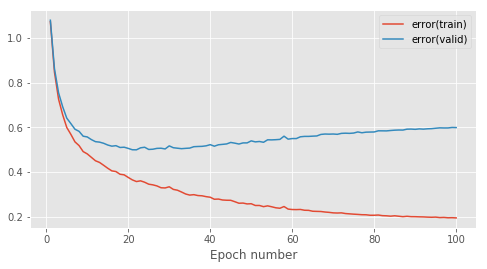

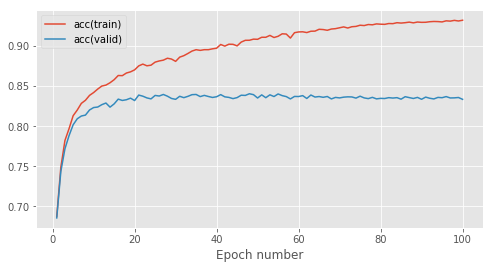

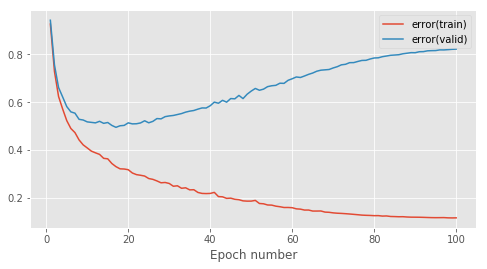

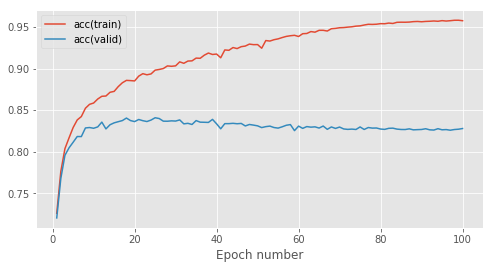

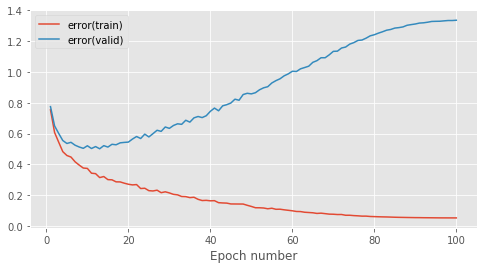

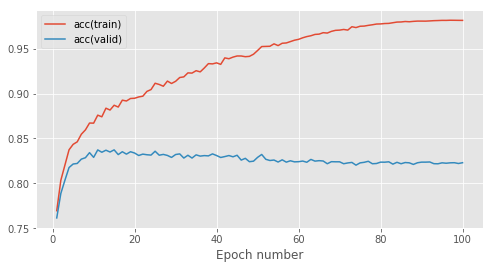

In [5]:
############# Adam BaseLine with no restart scheduler

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 1e-4
# learning_ranges = [1.05,1.1,1.15,1.2]
learning_ranges = [3,5,10]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

for learning_range in learning_ranges:
    

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    adam_scheduler_no_restart = CosineAnnealingWithWarmRestarts(min_learning_rate=learning_rate / learning_range, max_learning_rate=learning_rate * learning_range,
                                                       total_iters_per_period=100,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=1.0)

    error = CrossEntropySoftmaxError() 

    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=adam_scheduler_no_restart)

learning_rate 0.00030000000000000003
epoch 1


Epoch 1: 4.5s to complete
    error(train)=1.05e+00, acc(train)=6.95e-01, error(valid)=1.07e+00, acc(valid)=6.92e-01


learning_rate 0.0002989486268419304
epoch 2


Epoch 2: 4.4s to complete
    error(train)=8.39e-01, acc(train)=7.48e-01, error(valid)=8.57e-01, acc(valid)=7.47e-01


learning_rate 0.0002958110881504842
epoch 3


Epoch 3: 4.4s to complete
    error(train)=7.28e-01, acc(train)=7.78e-01, error(valid)=7.56e-01, acc(valid)=7.72e-01


learning_rate 0.00029063686478510023
epoch 4


Epoch 4: 4.4s to complete
    error(train)=6.72e-01, acc(train)=7.92e-01, error(valid)=7.06e-01, acc(valid)=7.82e-01


learning_rate 0.0002835075573391818
epoch 5


Epoch 5: 4.5s to complete
    error(train)=6.19e-01, acc(train)=8.06e-01, error(valid)=6.59e-01, acc(valid)=7.95e-01


learning_rate 0.000274535599249993
epoch 6


Epoch 6: 4.4s to complete
    error(train)=5.85e-01, acc(train)=8.17e-01, error(valid)=6.33e-01, acc(valid)=8.04e-01


learning_rate 0.0002638624836561882
epoch 7


Epoch 7: 4.5s to complete
    error(train)=5.49e-01, acc(train)=8.24e-01, error(valid)=5.99e-01, acc(valid)=8.09e-01


learning_rate 0.00025165653196649197
epoch 8


Epoch 8: 4.6s to complete
    error(train)=5.35e-01, acc(train)=8.28e-01, error(valid)=5.92e-01, acc(valid)=8.13e-01


learning_rate 0.00023811023933053286
epoch 9


Epoch 9: 4.7s to complete
    error(train)=5.12e-01, acc(train)=8.35e-01, error(valid)=5.68e-01, acc(valid)=8.19e-01


learning_rate 0.00022343723887534306
epoch 10


Epoch 10: 4.6s to complete
    error(train)=4.98e-01, acc(train)=8.38e-01, error(valid)=5.63e-01, acc(valid)=8.21e-01


learning_rate 0.00020786893258332631
epoch 11


Epoch 11: 4.7s to complete
    error(train)=4.80e-01, acc(train)=8.43e-01, error(valid)=5.49e-01, acc(valid)=8.22e-01


learning_rate 0.00019165084194476333
epoch 12


Epoch 12: 4.7s to complete
    error(train)=4.68e-01, acc(train)=8.47e-01, error(valid)=5.43e-01, acc(valid)=8.25e-01


learning_rate 0.00017503873593724178
epoch 13


Epoch 13: 4.6s to complete
    error(train)=4.59e-01, acc(train)=8.50e-01, error(valid)=5.37e-01, acc(valid)=8.26e-01


learning_rate 0.00015829459739609154
epoch 14


Epoch 14: 4.7s to complete
    error(train)=4.46e-01, acc(train)=8.52e-01, error(valid)=5.28e-01, acc(valid)=8.29e-01


learning_rate 0.00014168249138857004
epoch 15


Epoch 15: 4.7s to complete
    error(train)=4.37e-01, acc(train)=8.56e-01, error(valid)=5.21e-01, acc(valid)=8.30e-01


learning_rate 0.000125464400750007
epoch 16


Epoch 16: 4.8s to complete
    error(train)=4.29e-01, acc(train)=8.59e-01, error(valid)=5.16e-01, acc(valid)=8.32e-01


learning_rate 0.00010989609445799032
epoch 17


Epoch 17: 4.8s to complete
    error(train)=4.29e-01, acc(train)=8.57e-01, error(valid)=5.19e-01, acc(valid)=8.31e-01


learning_rate 9.522309400280042e-05
epoch 18


Epoch 18: 4.7s to complete
    error(train)=4.19e-01, acc(train)=8.62e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


learning_rate 8.167680136684137e-05
epoch 19


Epoch 19: 4.8s to complete
    error(train)=4.14e-01, acc(train)=8.63e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


learning_rate 6.947084967714515e-05
epoch 20


Epoch 20: 4.8s to complete
    error(train)=4.09e-01, acc(train)=8.65e-01, error(valid)=5.07e-01, acc(valid)=8.36e-01


learning_rate 5.879773408334036e-05
epoch 21


Epoch 21: 4.8s to complete
    error(train)=4.06e-01, acc(train)=8.66e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


learning_rate 4.982577599415155e-05
epoch 22


Epoch 22: 4.7s to complete
    error(train)=4.03e-01, acc(train)=8.66e-01, error(valid)=5.04e-01, acc(valid)=8.35e-01


learning_rate 4.269646854823316e-05
epoch 23


Epoch 23: 4.7s to complete
    error(train)=4.02e-01, acc(train)=8.67e-01, error(valid)=5.03e-01, acc(valid)=8.36e-01


learning_rate 3.752224518284919e-05
epoch 24


Epoch 24: 4.7s to complete
    error(train)=4.00e-01, acc(train)=8.68e-01, error(valid)=5.03e-01, acc(valid)=8.38e-01


learning_rate 3.4384706491402965e-05
epoch 25


Epoch 25: 4.7s to complete
    error(train)=3.98e-01, acc(train)=8.68e-01, error(valid)=5.02e-01, acc(valid)=8.37e-01


learning_rate 0.00027000000000000006
epoch 26


Epoch 26: 4.8s to complete
    error(train)=4.19e-01, acc(train)=8.58e-01, error(valid)=5.26e-01, acc(valid)=8.29e-01


learning_rate 0.00026989620156169826
epoch 27


Epoch 27: 4.6s to complete
    error(train)=4.15e-01, acc(train)=8.58e-01, error(valid)=5.25e-01, acc(valid)=8.28e-01


learning_rate 0.0002695849883445247
epoch 28


Epoch 28: 4.6s to complete
    error(train)=3.99e-01, acc(train)=8.65e-01, error(valid)=5.11e-01, acc(valid)=8.34e-01


learning_rate 0.0002690669063222133
epoch 29


Epoch 29: 4.7s to complete
    error(train)=3.88e-01, acc(train)=8.69e-01, error(valid)=5.07e-01, acc(valid)=8.33e-01


learning_rate 0.00026834286438667647
epoch 30


Epoch 30: 4.7s to complete
    error(train)=3.82e-01, acc(train)=8.71e-01, error(valid)=5.08e-01, acc(valid)=8.36e-01


learning_rate 0.00026741413275350036
epoch 31


Epoch 31: 4.7s to complete
    error(train)=3.78e-01, acc(train)=8.71e-01, error(valid)=5.07e-01, acc(valid)=8.35e-01


learning_rate 0.0002662823407335547
epoch 32


Epoch 32: 4.9s to complete
    error(train)=3.78e-01, acc(train)=8.70e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


learning_rate 0.00026494947387462796
epoch 33


Epoch 33: 5.0s to complete
    error(train)=3.73e-01, acc(train)=8.72e-01, error(valid)=5.12e-01, acc(valid)=8.33e-01


learning_rate 0.000263417870478102
epoch 34


Epoch 34: 5.1s to complete
    error(train)=3.72e-01, acc(train)=8.71e-01, error(valid)=5.19e-01, acc(valid)=8.35e-01


learning_rate 0.00026169021749677647
epoch 35


Epoch 35: 5.7s to complete
    error(train)=3.53e-01, acc(train)=8.78e-01, error(valid)=4.98e-01, acc(valid)=8.39e-01


learning_rate 0.0002597695458210411
epoch 36


Epoch 36: 5.9s to complete
    error(train)=3.47e-01, acc(train)=8.80e-01, error(valid)=4.99e-01, acc(valid)=8.38e-01


learning_rate 0.0002576592249616639
epoch 37


Epoch 37: 5.7s to complete
    error(train)=3.44e-01, acc(train)=8.80e-01, error(valid)=5.05e-01, acc(valid)=8.37e-01


learning_rate 0.0002553629571385239
epoch 38


Epoch 38: 5.2s to complete
    error(train)=3.40e-01, acc(train)=8.81e-01, error(valid)=5.01e-01, acc(valid)=8.37e-01


learning_rate 0.00025288477078566
epoch 39


Epoch 39: 4.7s to complete
    error(train)=3.31e-01, acc(train)=8.86e-01, error(valid)=5.00e-01, acc(valid)=8.39e-01


learning_rate 0.0002502290134840285
epoch 40


Epoch 40: 4.7s to complete
    error(train)=3.34e-01, acc(train)=8.83e-01, error(valid)=5.06e-01, acc(valid)=8.37e-01


learning_rate 0.00024740034433436885
epoch 41


Epoch 41: 4.7s to complete
    error(train)=3.29e-01, acc(train)=8.85e-01, error(valid)=5.03e-01, acc(valid)=8.40e-01


learning_rate 0.00024440372578355774
epoch 42


Epoch 42: 4.8s to complete
    error(train)=3.13e-01, acc(train)=8.91e-01, error(valid)=4.94e-01, acc(valid)=8.41e-01


learning_rate 0.00024124441491879122
epoch 43


Epoch 43: 4.8s to complete
    error(train)=3.22e-01, acc(train)=8.86e-01, error(valid)=5.08e-01, acc(valid)=8.34e-01


learning_rate 0.00023792795424486707
epoch 44


Epoch 44: 4.8s to complete
    error(train)=3.08e-01, acc(train)=8.93e-01, error(valid)=4.99e-01, acc(valid)=8.41e-01


learning_rate 0.00023446016196074828
epoch 45


Epoch 45: 4.8s to complete
    error(train)=3.01e-01, acc(train)=8.96e-01, error(valid)=4.96e-01, acc(valid)=8.42e-01


learning_rate 0.00023084712175246494
epoch 46


Epoch 46: 4.7s to complete
    error(train)=3.08e-01, acc(train)=8.90e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


learning_rate 0.00022709517212026164
epoch 47


Epoch 47: 4.9s to complete
    error(train)=3.05e-01, acc(train)=8.92e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


learning_rate 0.00022321089525871444
epoch 48


Epoch 48: 4.6s to complete
    error(train)=2.94e-01, acc(train)=8.97e-01, error(valid)=5.04e-01, acc(valid)=8.41e-01


learning_rate 0.0002192011055093245
epoch 49


Epoch 49: 4.7s to complete
    error(train)=2.89e-01, acc(train)=8.98e-01, error(valid)=5.02e-01, acc(valid)=8.42e-01


learning_rate 0.00021507283740584797
epoch 50


Epoch 50: 4.8s to complete
    error(train)=2.86e-01, acc(train)=8.98e-01, error(valid)=5.02e-01, acc(valid)=8.39e-01


learning_rate 0.00021083333333333338
epoch 51


Epoch 51: 4.7s to complete
    error(train)=2.87e-01, acc(train)=8.98e-01, error(valid)=5.09e-01, acc(valid)=8.38e-01


learning_rate 0.000206490030822517
epoch 52


Epoch 52: 4.7s to complete
    error(train)=2.83e-01, acc(train)=9.00e-01, error(valid)=5.06e-01, acc(valid)=8.42e-01


learning_rate 0.00020205054950186697
epoch 53


Epoch 53: 4.8s to complete
    error(train)=2.81e-01, acc(train)=9.00e-01, error(valid)=5.13e-01, acc(valid)=8.39e-01


learning_rate 0.00019752267773016555
epoch 54


Epoch 54: 4.8s to complete
    error(train)=2.73e-01, acc(train)=9.04e-01, error(valid)=5.09e-01, acc(valid)=8.42e-01


learning_rate 0.00019291435893308148
epoch 55


Epoch 55: 4.7s to complete
    error(train)=2.71e-01, acc(train)=9.05e-01, error(valid)=5.09e-01, acc(valid)=8.41e-01


learning_rate 0.00018823367766770217
epoch 56


Epoch 56: 4.8s to complete
    error(train)=2.68e-01, acc(train)=9.04e-01, error(valid)=5.14e-01, acc(valid)=8.40e-01


learning_rate 0.00018348884543947314
epoch 57


Epoch 57: 4.7s to complete
    error(train)=2.65e-01, acc(train)=9.06e-01, error(valid)=5.10e-01, acc(valid)=8.43e-01


learning_rate 0.00017868818629642765
epoch 58


Epoch 58: 4.7s to complete
    error(train)=2.65e-01, acc(train)=9.06e-01, error(valid)=5.18e-01, acc(valid)=8.40e-01


learning_rate 0.00017384012222597747
epoch 59


Epoch 59: 4.7s to complete
    error(train)=2.67e-01, acc(train)=9.05e-01, error(valid)=5.23e-01, acc(valid)=8.40e-01


learning_rate 0.00016895315837988544
epoch 60


Epoch 60: 4.6s to complete
    error(train)=2.60e-01, acc(train)=9.08e-01, error(valid)=5.23e-01, acc(valid)=8.40e-01


learning_rate 0.00016403586815333902
epoch 61


Epoch 61: 4.6s to complete
    error(train)=2.59e-01, acc(train)=9.07e-01, error(valid)=5.25e-01, acc(valid)=8.39e-01


learning_rate 0.00015909687814430213
epoch 62


Epoch 62: 4.6s to complete
    error(train)=2.60e-01, acc(train)=9.07e-01, error(valid)=5.27e-01, acc(valid)=8.39e-01


learning_rate 0.0001541448530195306
epoch 63


Epoch 63: 4.7s to complete
    error(train)=2.54e-01, acc(train)=9.09e-01, error(valid)=5.28e-01, acc(valid)=8.40e-01


learning_rate 0.0001491884803138028
epoch 64


Epoch 64: 4.7s to complete
    error(train)=2.51e-01, acc(train)=9.10e-01, error(valid)=5.30e-01, acc(valid)=8.40e-01


learning_rate 0.00014423645518903128
epoch 65


Epoch 65: 4.7s to complete
    error(train)=2.47e-01, acc(train)=9.12e-01, error(valid)=5.24e-01, acc(valid)=8.38e-01


learning_rate 0.00013929746517999438
epoch 66


Epoch 66: 4.8s to complete
    error(train)=2.45e-01, acc(train)=9.13e-01, error(valid)=5.28e-01, acc(valid)=8.41e-01


learning_rate 0.000134380174953448
epoch 67


Epoch 67: 4.6s to complete
    error(train)=2.41e-01, acc(train)=9.14e-01, error(valid)=5.28e-01, acc(valid)=8.40e-01


learning_rate 0.0001294932111073559
epoch 68


Epoch 68: 4.6s to complete
    error(train)=2.38e-01, acc(train)=9.15e-01, error(valid)=5.26e-01, acc(valid)=8.41e-01


learning_rate 0.00012464514703690576
epoch 69


Epoch 69: 4.6s to complete
    error(train)=2.36e-01, acc(train)=9.17e-01, error(valid)=5.31e-01, acc(valid)=8.41e-01


learning_rate 0.00011984448789386025
epoch 70


Epoch 70: 4.6s to complete
    error(train)=2.36e-01, acc(train)=9.16e-01, error(valid)=5.31e-01, acc(valid)=8.42e-01


learning_rate 0.00011509965566563125
epoch 71


Epoch 71: 4.6s to complete
    error(train)=2.34e-01, acc(train)=9.18e-01, error(valid)=5.34e-01, acc(valid)=8.40e-01


learning_rate 0.0001104189744002519
epoch 72


Epoch 72: 4.6s to complete
    error(train)=2.33e-01, acc(train)=9.17e-01, error(valid)=5.34e-01, acc(valid)=8.42e-01


learning_rate 0.00010581065560316783
epoch 73


Epoch 73: 4.7s to complete
    error(train)=2.36e-01, acc(train)=9.16e-01, error(valid)=5.40e-01, acc(valid)=8.40e-01


learning_rate 0.00010128278383146642
epoch 74


Epoch 74: 4.7s to complete
    error(train)=2.28e-01, acc(train)=9.20e-01, error(valid)=5.34e-01, acc(valid)=8.43e-01


learning_rate 9.68433025108164e-05
epoch 75


Epoch 75: 4.7s to complete
    error(train)=2.27e-01, acc(train)=9.21e-01, error(valid)=5.37e-01, acc(valid)=8.40e-01


learning_rate 9.250000000000004e-05
epoch 76


Epoch 76: 4.7s to complete
    error(train)=2.28e-01, acc(train)=9.20e-01, error(valid)=5.42e-01, acc(valid)=8.41e-01


learning_rate 8.826049592748538e-05
epoch 77


Epoch 77: 4.7s to complete
    error(train)=2.24e-01, acc(train)=9.22e-01, error(valid)=5.39e-01, acc(valid)=8.42e-01


learning_rate 8.413222782400894e-05
epoch 78


Epoch 78: 4.7s to complete
    error(train)=2.29e-01, acc(train)=9.18e-01, error(valid)=5.50e-01, acc(valid)=8.39e-01


learning_rate 8.0122438074619e-05
epoch 79


Epoch 79: 4.7s to complete
    error(train)=2.24e-01, acc(train)=9.21e-01, error(valid)=5.46e-01, acc(valid)=8.41e-01


learning_rate 7.623816121307173e-05
epoch 80


Epoch 80: 4.7s to complete
    error(train)=2.22e-01, acc(train)=9.21e-01, error(valid)=5.44e-01, acc(valid)=8.40e-01


learning_rate 7.248621158086849e-05
epoch 81


Epoch 81: 4.7s to complete
    error(train)=2.22e-01, acc(train)=9.22e-01, error(valid)=5.51e-01, acc(valid)=8.38e-01


learning_rate 6.887317137258508e-05
epoch 82


Epoch 82: 4.7s to complete
    error(train)=2.18e-01, acc(train)=9.24e-01, error(valid)=5.46e-01, acc(valid)=8.40e-01


learning_rate 6.540537908846633e-05
epoch 83


Epoch 83: 4.7s to complete
    error(train)=2.17e-01, acc(train)=9.24e-01, error(valid)=5.49e-01, acc(valid)=8.38e-01


learning_rate 6.208891841454218e-05
epoch 84


Epoch 84: 4.8s to complete
    error(train)=2.16e-01, acc(train)=9.24e-01, error(valid)=5.47e-01, acc(valid)=8.41e-01


learning_rate 5.892960754977564e-05
epoch 85


Epoch 85: 5.3s to complete
    error(train)=2.15e-01, acc(train)=9.26e-01, error(valid)=5.48e-01, acc(valid)=8.41e-01


learning_rate 5.593298899896457e-05
epoch 86


Epoch 86: 5.3s to complete
    error(train)=2.15e-01, acc(train)=9.24e-01, error(valid)=5.49e-01, acc(valid)=8.39e-01


learning_rate 5.3104319849304904e-05
epoch 87


Epoch 87: 4.7s to complete
    error(train)=2.16e-01, acc(train)=9.25e-01, error(valid)=5.52e-01, acc(valid)=8.40e-01


learning_rate 5.044856254767339e-05
epoch 88


Epoch 88: 4.7s to complete
    error(train)=2.15e-01, acc(train)=9.25e-01, error(valid)=5.53e-01, acc(valid)=8.40e-01


learning_rate 4.7970376194809506e-05
epoch 89


Epoch 89: 4.7s to complete
    error(train)=2.12e-01, acc(train)=9.26e-01, error(valid)=5.53e-01, acc(valid)=8.40e-01


learning_rate 4.567410837166948e-05
epoch 90


Epoch 90: 4.7s to complete
    error(train)=2.12e-01, acc(train)=9.26e-01, error(valid)=5.53e-01, acc(valid)=8.40e-01


learning_rate 4.3563787512292224e-05
epoch 91


Epoch 91: 4.7s to complete
    error(train)=2.13e-01, acc(train)=9.25e-01, error(valid)=5.57e-01, acc(valid)=8.40e-01


learning_rate 4.164311583655693e-05
epoch 92


Epoch 92: 4.7s to complete
    error(train)=2.11e-01, acc(train)=9.27e-01, error(valid)=5.55e-01, acc(valid)=8.40e-01


learning_rate 3.991546285523142e-05
epoch 93


Epoch 93: 4.7s to complete
    error(train)=2.10e-01, acc(train)=9.27e-01, error(valid)=5.55e-01, acc(valid)=8.40e-01


learning_rate 3.838385945870538e-05
epoch 94


Epoch 94: 4.7s to complete
    error(train)=2.09e-01, acc(train)=9.27e-01, error(valid)=5.57e-01, acc(valid)=8.39e-01


learning_rate 3.7050992599778656e-05
epoch 95


Epoch 95: 4.7s to complete
    error(train)=2.10e-01, acc(train)=9.27e-01, error(valid)=5.57e-01, acc(valid)=8.38e-01


learning_rate 3.5919200579832996e-05
epoch 96


Epoch 96: 4.6s to complete
    error(train)=2.09e-01, acc(train)=9.27e-01, error(valid)=5.58e-01, acc(valid)=8.39e-01


learning_rate 3.4990468946656926e-05
epoch 97


Epoch 97: 4.6s to complete
    error(train)=2.08e-01, acc(train)=9.27e-01, error(valid)=5.58e-01, acc(valid)=8.39e-01


learning_rate 3.4266427011120135e-05
epoch 98


Epoch 98: 4.6s to complete
    error(train)=2.08e-01, acc(train)=9.27e-01, error(valid)=5.60e-01, acc(valid)=8.40e-01


learning_rate 3.374834498880865e-05
epoch 99


Epoch 99: 4.6s to complete
    error(train)=2.07e-01, acc(train)=9.28e-01, error(valid)=5.60e-01, acc(valid)=8.39e-01


learning_rate 3.343713177163509e-05
epoch 100


Epoch 100: 4.6s to complete
    error(train)=2.07e-01, acc(train)=9.28e-01, error(valid)=5.62e-01, acc(valid)=8.39e-01


learning_rate 0.0005
epoch 1


Epoch 1: 4.5s to complete
    error(train)=9.36e-01, acc(train)=7.24e-01, error(valid)=9.50e-01, acc(valid)=7.19e-01


learning_rate 0.0004981075283154747
epoch 2


Epoch 2: 4.6s to complete
    error(train)=7.26e-01, acc(train)=7.78e-01, error(valid)=7.45e-01, acc(valid)=7.69e-01


learning_rate 0.0004924599586708715
epoch 3


Epoch 3: 4.6s to complete
    error(train)=6.47e-01, acc(train)=7.97e-01, error(valid)=6.82e-01, acc(valid)=7.88e-01


learning_rate 0.00048314635661318034
epoch 4


Epoch 4: 4.6s to complete
    error(train)=5.73e-01, acc(train)=8.15e-01, error(valid)=6.20e-01, acc(valid)=8.01e-01


learning_rate 0.00047031360321052724
epoch 5


Epoch 5: 5.0s to complete
    error(train)=5.19e-01, acc(train)=8.31e-01, error(valid)=5.70e-01, acc(valid)=8.18e-01


learning_rate 0.0004541640786499874
epoch 6


Epoch 6: 4.6s to complete
    error(train)=4.93e-01, acc(train)=8.38e-01, error(valid)=5.53e-01, acc(valid)=8.23e-01


learning_rate 0.0004349524705811388
epoch 7


Epoch 7: 4.7s to complete
    error(train)=4.67e-01, acc(train)=8.44e-01, error(valid)=5.39e-01, acc(valid)=8.23e-01


learning_rate 0.00041298175753968553
epoch 8


Epoch 8: 4.6s to complete
    error(train)=4.57e-01, acc(train)=8.46e-01, error(valid)=5.34e-01, acc(valid)=8.27e-01


learning_rate 0.0003885984307949592
epoch 9


Epoch 9: 4.7s to complete
    error(train)=4.31e-01, acc(train)=8.55e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


learning_rate 0.00036218702997561745
epoch 10


Epoch 10: 4.7s to complete
    error(train)=4.27e-01, acc(train)=8.54e-01, error(valid)=5.20e-01, acc(valid)=8.31e-01


learning_rate 0.00033416407864998737
epoch 11


Epoch 11: 4.8s to complete
    error(train)=3.96e-01, acc(train)=8.65e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


learning_rate 0.00030497151550057394
epoch 12


Epoch 12: 4.7s to complete
    error(train)=3.85e-01, acc(train)=8.68e-01, error(valid)=4.95e-01, acc(valid)=8.37e-01


learning_rate 0.0002750697246870352
epoch 13


Epoch 13: 4.7s to complete
    error(train)=3.77e-01, acc(train)=8.71e-01, error(valid)=4.96e-01, acc(valid)=8.39e-01


learning_rate 0.00024493027531296484
epoch 14


Epoch 14: 4.8s to complete
    error(train)=3.64e-01, acc(train)=8.76e-01, error(valid)=4.87e-01, acc(valid)=8.40e-01


learning_rate 0.00021502848449942604
epoch 15


Epoch 15: 4.7s to complete
    error(train)=3.54e-01, acc(train)=8.79e-01, error(valid)=4.84e-01, acc(valid)=8.42e-01


learning_rate 0.00018583592135001264
epoch 16


Epoch 16: 4.6s to complete
    error(train)=3.53e-01, acc(train)=8.79e-01, error(valid)=4.86e-01, acc(valid)=8.43e-01


learning_rate 0.00015781297002438255
epoch 17


Epoch 17: 4.6s to complete
    error(train)=3.39e-01, acc(train)=8.84e-01, error(valid)=4.78e-01, acc(valid)=8.44e-01


learning_rate 0.00013140156920504075
epoch 18


Epoch 18: 4.7s to complete
    error(train)=3.35e-01, acc(train)=8.84e-01, error(valid)=4.76e-01, acc(valid)=8.46e-01


learning_rate 0.00010701824246031446
epoch 19


Epoch 19: 4.7s to complete
    error(train)=3.32e-01, acc(train)=8.85e-01, error(valid)=4.77e-01, acc(valid)=8.45e-01


learning_rate 8.504752941886128e-05
epoch 20


Epoch 20: 4.6s to complete
    error(train)=3.26e-01, acc(train)=8.88e-01, error(valid)=4.75e-01, acc(valid)=8.47e-01


learning_rate 6.583592135001264e-05
epoch 21


Epoch 21: 4.7s to complete
    error(train)=3.24e-01, acc(train)=8.88e-01, error(valid)=4.75e-01, acc(valid)=8.48e-01


learning_rate 4.968639678947279e-05
epoch 22


Epoch 22: 4.7s to complete
    error(train)=3.21e-01, acc(train)=8.90e-01, error(valid)=4.73e-01, acc(valid)=8.48e-01


learning_rate 3.685364338681968e-05
epoch 23


Epoch 23: 4.7s to complete
    error(train)=3.19e-01, acc(train)=8.90e-01, error(valid)=4.72e-01, acc(valid)=8.49e-01


learning_rate 2.7540041329128542e-05
epoch 24


Epoch 24: 4.9s to complete
    error(train)=3.17e-01, acc(train)=8.91e-01, error(valid)=4.72e-01, acc(valid)=8.48e-01


learning_rate 2.1892471684525338e-05
epoch 25


Epoch 25: 4.7s to complete
    error(train)=3.16e-01, acc(train)=8.92e-01, error(valid)=4.72e-01, acc(valid)=8.48e-01


learning_rate 0.00045000000000000004
epoch 26


Epoch 26: 4.7s to complete
    error(train)=3.50e-01, acc(train)=8.78e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


learning_rate 0.0004498114084712546
epoch 27


Epoch 27: 4.7s to complete
    error(train)=3.36e-01, acc(train)=8.83e-01, error(valid)=4.95e-01, acc(valid)=8.41e-01


learning_rate 0.0004492459647386435
epoch 28


Epoch 28: 4.7s to complete
    error(train)=3.42e-01, acc(train)=8.76e-01, error(valid)=5.05e-01, acc(valid)=8.35e-01


learning_rate 0.0004483046607826128
epoch 29


Epoch 29: 4.7s to complete
    error(train)=3.29e-01, acc(train)=8.83e-01, error(valid)=5.05e-01, acc(valid)=8.36e-01


learning_rate 0.0004469891479701586
epoch 30


Epoch 30: 4.7s to complete
    error(train)=3.18e-01, acc(train)=8.86e-01, error(valid)=5.04e-01, acc(valid)=8.40e-01


learning_rate 0.00044530173415776827
epoch 31


Epoch 31: 4.6s to complete
    error(train)=3.19e-01, acc(train)=8.84e-01, error(valid)=5.10e-01, acc(valid)=8.38e-01


learning_rate 0.00044324537964265573
epoch 32


Epoch 32: 5.0s to complete
    error(train)=3.00e-01, acc(train)=8.93e-01, error(valid)=4.96e-01, acc(valid)=8.44e-01


learning_rate 0.00044082369196939445
epoch 33


Epoch 33: 5.1s to complete
    error(train)=3.06e-01, acc(train)=8.90e-01, error(valid)=5.11e-01, acc(valid)=8.38e-01


learning_rate 0.00043804091960105844
epoch 34


Epoch 34: 5.5s to complete
    error(train)=2.97e-01, acc(train)=8.91e-01, error(valid)=5.13e-01, acc(valid)=8.35e-01


learning_rate 0.0004349019444659741
epoch 35


Epoch 35: 5.6s to complete
    error(train)=2.85e-01, acc(train)=8.96e-01, error(valid)=5.06e-01, acc(valid)=8.40e-01


learning_rate 0.0004314122733931592
epoch 36


Epoch 36: 5.2s to complete
    error(train)=2.84e-01, acc(train)=8.97e-01, error(valid)=5.16e-01, acc(valid)=8.40e-01


learning_rate 0.00042757802845147383
epoch 37


Epoch 37: 5.1s to complete
    error(train)=2.83e-01, acc(train)=8.96e-01, error(valid)=5.17e-01, acc(valid)=8.37e-01


learning_rate 0.0004234059362094307
epoch 38


Epoch 38: 4.9s to complete
    error(train)=2.73e-01, acc(train)=8.99e-01, error(valid)=5.19e-01, acc(valid)=8.37e-01


learning_rate 0.000418903315934509
epoch 39


Epoch 39: 4.5s to complete
    error(train)=2.68e-01, acc(train)=9.02e-01, error(valid)=5.24e-01, acc(valid)=8.41e-01


learning_rate 0.00041407806675267144
epoch 40


Epoch 40: 4.7s to complete
    error(train)=2.67e-01, acc(train)=9.01e-01, error(valid)=5.27e-01, acc(valid)=8.35e-01


learning_rate 0.00040893865379061374
epoch 41


Epoch 41: 4.6s to complete
    error(train)=2.61e-01, acc(train)=9.04e-01, error(valid)=5.27e-01, acc(valid)=8.38e-01


learning_rate 0.0004034940933250556
epoch 42


Epoch 42: 4.6s to complete
    error(train)=2.52e-01, acc(train)=9.07e-01, error(valid)=5.37e-01, acc(valid)=8.39e-01


learning_rate 0.00039775393696512765
epoch 43


Epoch 43: 5.0s to complete
    error(train)=2.46e-01, acc(train)=9.09e-01, error(valid)=5.29e-01, acc(valid)=8.40e-01


learning_rate 0.0003917282548956035
epoch 44


Epoch 44: 4.5s to complete
    error(train)=2.40e-01, acc(train)=9.11e-01, error(valid)=5.28e-01, acc(valid)=8.40e-01


learning_rate 0.0003854276182103736
epoch 45


Epoch 45: 4.6s to complete
    error(train)=2.47e-01, acc(train)=9.07e-01, error(valid)=5.46e-01, acc(valid)=8.37e-01


learning_rate 0.00037886308036715456
epoch 46


Epoch 46: 4.6s to complete
    error(train)=2.44e-01, acc(train)=9.08e-01, error(valid)=5.58e-01, acc(valid)=8.34e-01


learning_rate 0.0003720461577959683
epoch 47


Epoch 47: 4.5s to complete
    error(train)=2.34e-01, acc(train)=9.12e-01, error(valid)=5.57e-01, acc(valid)=8.38e-01


learning_rate 0.00036498880969541066
epoch 48


Epoch 48: 4.6s to complete
    error(train)=2.30e-01, acc(train)=9.14e-01, error(valid)=5.61e-01, acc(valid)=8.39e-01


learning_rate 0.0003577034170521529
epoch 49


Epoch 49: 4.5s to complete
    error(train)=2.22e-01, acc(train)=9.18e-01, error(valid)=5.59e-01, acc(valid)=8.38e-01


learning_rate 0.0003502027609204843
epoch 50


Epoch 50: 4.6s to complete
    error(train)=2.12e-01, acc(train)=9.22e-01, error(valid)=5.50e-01, acc(valid)=8.41e-01


learning_rate 0.00034250000000000003
epoch 51


Epoch 51: 4.6s to complete
    error(train)=2.16e-01, acc(train)=9.18e-01, error(valid)=5.69e-01, acc(valid)=8.37e-01


learning_rate 0.00033460864755077035
epoch 52


Epoch 52: 4.6s to complete
    error(train)=2.18e-01, acc(train)=9.18e-01, error(valid)=5.83e-01, acc(valid)=8.37e-01


learning_rate 0.00032654254768649065
epoch 53


Epoch 53: 4.6s to complete
    error(train)=2.08e-01, acc(train)=9.22e-01, error(valid)=5.72e-01, acc(valid)=8.37e-01


learning_rate 0.0003183158510872022
epoch 54


Epoch 54: 4.6s to complete
    error(train)=2.07e-01, acc(train)=9.23e-01, error(valid)=5.87e-01, acc(valid)=8.37e-01


learning_rate 0.0003099429901741903
epoch 55


Epoch 55: 4.6s to complete
    error(train)=1.98e-01, acc(train)=9.25e-01, error(valid)=5.81e-01, acc(valid)=8.35e-01


learning_rate 0.0003014386537906137
epoch 56


Epoch 56: 4.5s to complete
    error(train)=1.95e-01, acc(train)=9.26e-01, error(valid)=5.92e-01, acc(valid)=8.35e-01


learning_rate 0.00029281776143228215
epoch 57


Epoch 57: 4.6s to complete
    error(train)=1.98e-01, acc(train)=9.24e-01, error(valid)=6.01e-01, acc(valid)=8.34e-01


learning_rate 0.000284095437073791
epoch 58


Epoch 58: 4.6s to complete
    error(train)=1.96e-01, acc(train)=9.24e-01, error(valid)=6.11e-01, acc(valid)=8.33e-01


learning_rate 0.00027528698263593087
epoch 59


Epoch 59: 4.6s to complete
    error(train)=1.89e-01, acc(train)=9.29e-01, error(valid)=6.04e-01, acc(valid)=8.37e-01


learning_rate 0.00026640785114091857
epoch 60


Epoch 60: 4.5s to complete
    error(train)=1.90e-01, acc(train)=9.29e-01, error(valid)=6.18e-01, acc(valid)=8.37e-01


learning_rate 0.0002574736196025455
epoch 61


Epoch 61: 4.6s to complete
    error(train)=1.85e-01, acc(train)=9.30e-01, error(valid)=6.25e-01, acc(valid)=8.33e-01


learning_rate 0.0002484999616988024
epoch 62


Epoch 62: 4.8s to complete
    error(train)=1.82e-01, acc(train)=9.31e-01, error(valid)=6.28e-01, acc(valid)=8.35e-01


learning_rate 0.00023950262027492178
epoch 63


Epoch 63: 4.7s to complete
    error(train)=1.80e-01, acc(train)=9.31e-01, error(valid)=6.36e-01, acc(valid)=8.33e-01


learning_rate 0.00023049737972507828
epoch 64


Epoch 64: 4.7s to complete
    error(train)=1.73e-01, acc(train)=9.36e-01, error(valid)=6.35e-01, acc(valid)=8.35e-01


learning_rate 0.00022150003830119765
epoch 65


Epoch 65: 4.7s to complete
    error(train)=1.70e-01, acc(train)=9.37e-01, error(valid)=6.39e-01, acc(valid)=8.36e-01


learning_rate 0.00021252638039745455
epoch 66


Epoch 66: 4.6s to complete
    error(train)=1.65e-01, acc(train)=9.38e-01, error(valid)=6.45e-01, acc(valid)=8.36e-01


learning_rate 0.00020359214885908155
epoch 67


Epoch 67: 4.7s to complete
    error(train)=1.71e-01, acc(train)=9.34e-01, error(valid)=6.59e-01, acc(valid)=8.31e-01


learning_rate 0.00019471301736406917
epoch 68


Epoch 68: 4.7s to complete
    error(train)=1.66e-01, acc(train)=9.38e-01, error(valid)=6.56e-01, acc(valid)=8.35e-01


learning_rate 0.000185904562926209
epoch 69


Epoch 69: 4.8s to complete
    error(train)=1.69e-01, acc(train)=9.35e-01, error(valid)=6.63e-01, acc(valid)=8.31e-01


learning_rate 0.0001771822385677179
epoch 70


Epoch 70: 4.7s to complete
    error(train)=1.63e-01, acc(train)=9.38e-01, error(valid)=6.70e-01, acc(valid)=8.31e-01


learning_rate 0.00016856134620938634
epoch 71


Epoch 71: 4.7s to complete
    error(train)=1.56e-01, acc(train)=9.43e-01, error(valid)=6.67e-01, acc(valid)=8.33e-01


learning_rate 0.00016005700982580978
epoch 72


Epoch 72: 4.8s to complete
    error(train)=1.54e-01, acc(train)=9.43e-01, error(valid)=6.72e-01, acc(valid)=8.33e-01


learning_rate 0.00015168414891279788
epoch 73


Epoch 73: 4.8s to complete
    error(train)=1.54e-01, acc(train)=9.43e-01, error(valid)=6.73e-01, acc(valid)=8.31e-01


learning_rate 0.0001434574523135094
epoch 74


Epoch 74: 4.7s to complete
    error(train)=1.51e-01, acc(train)=9.45e-01, error(valid)=6.81e-01, acc(valid)=8.33e-01


learning_rate 0.0001353913524492298
epoch 75


Epoch 75: 4.7s to complete
    error(train)=1.49e-01, acc(train)=9.45e-01, error(valid)=6.88e-01, acc(valid)=8.32e-01


learning_rate 0.00012750000000000006
epoch 76


Epoch 76: 4.6s to complete
    error(train)=1.45e-01, acc(train)=9.47e-01, error(valid)=6.86e-01, acc(valid)=8.34e-01


learning_rate 0.00011979723907951568
epoch 77


Epoch 77: 4.7s to complete
    error(train)=1.45e-01, acc(train)=9.46e-01, error(valid)=6.90e-01, acc(valid)=8.34e-01


learning_rate 0.00011229658294784722
epoch 78


Epoch 78: 4.7s to complete
    error(train)=1.46e-01, acc(train)=9.45e-01, error(valid)=7.00e-01, acc(valid)=8.30e-01


learning_rate 0.00010501119030458942
epoch 79


Epoch 79: 4.6s to complete
    error(train)=1.42e-01, acc(train)=9.48e-01, error(valid)=6.98e-01, acc(valid)=8.33e-01


learning_rate 9.795384220403171e-05
epoch 80


Epoch 80: 4.6s to complete
    error(train)=1.41e-01, acc(train)=9.49e-01, error(valid)=7.03e-01, acc(valid)=8.33e-01


learning_rate 9.113691963284556e-05
epoch 81


Epoch 81: 4.7s to complete
    error(train)=1.39e-01, acc(train)=9.50e-01, error(valid)=7.08e-01, acc(valid)=8.32e-01


learning_rate 8.457238178962642e-05
epoch 82


Epoch 82: 4.7s to complete
    error(train)=1.39e-01, acc(train)=9.50e-01, error(valid)=7.09e-01, acc(valid)=8.30e-01


learning_rate 7.827174510439657e-05
epoch 83


Epoch 83: 4.7s to complete
    error(train)=1.38e-01, acc(train)=9.49e-01, error(valid)=7.14e-01, acc(valid)=8.32e-01


learning_rate 7.22460630348724e-05
epoch 84


Epoch 84: 5.2s to complete
    error(train)=1.37e-01, acc(train)=9.50e-01, error(valid)=7.18e-01, acc(valid)=8.32e-01


learning_rate 6.650590667494446e-05
epoch 85


Epoch 85: 5.8s to complete
    error(train)=1.35e-01, acc(train)=9.50e-01, error(valid)=7.21e-01, acc(valid)=8.31e-01


learning_rate 6.106134620938633e-05
epoch 86


Epoch 86: 5.1s to complete
    error(train)=1.34e-01, acc(train)=9.51e-01, error(valid)=7.19e-01, acc(valid)=8.32e-01


learning_rate 5.592193324732863e-05
epoch 87


Epoch 87: 4.7s to complete
    error(train)=1.35e-01, acc(train)=9.52e-01, error(valid)=7.24e-01, acc(valid)=8.30e-01


learning_rate 5.109668406549109e-05
epoch 88


Epoch 88: 4.7s to complete
    error(train)=1.34e-01, acc(train)=9.51e-01, error(valid)=7.24e-01, acc(valid)=8.33e-01


learning_rate 4.659406379056938e-05
epoch 89


Epoch 89: 4.7s to complete
    error(train)=1.32e-01, acc(train)=9.53e-01, error(valid)=7.24e-01, acc(valid)=8.32e-01


learning_rate 4.242197154852623e-05
epoch 90


Epoch 90: 4.6s to complete
    error(train)=1.32e-01, acc(train)=9.52e-01, error(valid)=7.27e-01, acc(valid)=8.32e-01


learning_rate 3.858772660684079e-05
epoch 91


Epoch 91: 4.7s to complete
    error(train)=1.31e-01, acc(train)=9.53e-01, error(valid)=7.30e-01, acc(valid)=8.32e-01


learning_rate 3.509805553402597e-05
epoch 92


Epoch 92: 4.7s to complete
    error(train)=1.30e-01, acc(train)=9.54e-01, error(valid)=7.32e-01, acc(valid)=8.31e-01


learning_rate 3.195908039894159e-05
epoch 93


Epoch 93: 4.7s to complete
    error(train)=1.29e-01, acc(train)=9.53e-01, error(valid)=7.33e-01, acc(valid)=8.32e-01


learning_rate 2.9176308030605546e-05
epoch 94


Epoch 94: 4.6s to complete
    error(train)=1.29e-01, acc(train)=9.54e-01, error(valid)=7.35e-01, acc(valid)=8.30e-01


learning_rate 2.675462035734432e-05
epoch 95


Epoch 95: 4.6s to complete
    error(train)=1.28e-01, acc(train)=9.54e-01, error(valid)=7.36e-01, acc(valid)=8.32e-01


learning_rate 2.469826584223178e-05
epoch 96


Epoch 96: 4.6s to complete
    error(train)=1.29e-01, acc(train)=9.54e-01, error(valid)=7.37e-01, acc(valid)=8.32e-01


learning_rate 2.3010852029841454e-05
epoch 97


Epoch 97: 4.6s to complete
    error(train)=1.28e-01, acc(train)=9.54e-01, error(valid)=7.39e-01, acc(valid)=8.32e-01


learning_rate 2.169533921738728e-05
epoch 98


Epoch 98: 4.7s to complete
    error(train)=1.28e-01, acc(train)=9.54e-01, error(valid)=7.39e-01, acc(valid)=8.32e-01


learning_rate 2.0754035261356563e-05
epoch 99


Epoch 99: 4.7s to complete
    error(train)=1.27e-01, acc(train)=9.54e-01, error(valid)=7.39e-01, acc(valid)=8.32e-01


learning_rate 2.018859152874545e-05
epoch 100


Epoch 100: 5.0s to complete
    error(train)=1.27e-01, acc(train)=9.54e-01, error(valid)=7.43e-01, acc(valid)=8.32e-01


learning_rate 0.001
epoch 1


Epoch 1: 4.5s to complete
    error(train)=7.51e-01, acc(train)=7.68e-01, error(valid)=7.77e-01, acc(valid)=7.57e-01


learning_rate 0.0009960967771506667
epoch 2


Epoch 2: 4.5s to complete
    error(train)=6.31e-01, acc(train)=7.97e-01, error(valid)=6.75e-01, acc(valid)=7.80e-01


learning_rate 0.0009844486647586723
epoch 3


Epoch 3: 4.6s to complete
    error(train)=5.42e-01, acc(train)=8.19e-01, error(valid)=6.01e-01, acc(valid)=8.02e-01


learning_rate 0.0009652393605146844
epoch 4


Epoch 4: 4.6s to complete
    error(train)=5.01e-01, acc(train)=8.33e-01, error(valid)=5.74e-01, acc(valid)=8.13e-01


learning_rate 0.0009387718066217125
epoch 5


Epoch 5: 4.5s to complete
    error(train)=4.54e-01, acc(train)=8.46e-01, error(valid)=5.46e-01, acc(valid)=8.21e-01


learning_rate 0.000905463412215599
epoch 6


Epoch 6: 4.4s to complete
    error(train)=4.30e-01, acc(train)=8.48e-01, error(valid)=5.30e-01, acc(valid)=8.21e-01


learning_rate 0.0008658394705735987
epoch 7


Epoch 7: 4.5s to complete
    error(train)=3.90e-01, acc(train)=8.64e-01, error(valid)=5.05e-01, acc(valid)=8.34e-01


learning_rate 0.0008205248749256015
epoch 8


Epoch 8: 4.4s to complete
    error(train)=3.81e-01, acc(train)=8.67e-01, error(valid)=5.10e-01, acc(valid)=8.33e-01


learning_rate 0.0007702342635146033
epoch 9


Epoch 9: 4.5s to complete
    error(train)=3.53e-01, acc(train)=8.75e-01, error(valid)=4.92e-01, acc(valid)=8.38e-01


learning_rate 0.000715760749324711
epoch 10


Epoch 10: 4.5s to complete
    error(train)=3.51e-01, acc(train)=8.74e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


learning_rate 0.000657963412215599
epoch 11


Epoch 11: 4.6s to complete
    error(train)=3.33e-01, acc(train)=8.80e-01, error(valid)=4.99e-01, acc(valid)=8.36e-01


learning_rate 0.0005977537507199338
epoch 12


Epoch 12: 4.7s to complete
    error(train)=3.14e-01, acc(train)=8.86e-01, error(valid)=4.97e-01, acc(valid)=8.39e-01


learning_rate 0.0005360813071670102
epoch 13


Epoch 13: 4.7s to complete
    error(train)=2.98e-01, acc(train)=8.92e-01, error(valid)=4.89e-01, acc(valid)=8.42e-01


learning_rate 0.0004739186928329899
epoch 14


Epoch 14: 4.7s to complete
    error(train)=2.92e-01, acc(train)=8.93e-01, error(valid)=4.99e-01, acc(valid)=8.41e-01


learning_rate 0.0004122462492800662
epoch 15


Epoch 15: 4.8s to complete
    error(train)=2.80e-01, acc(train)=8.97e-01, error(valid)=4.97e-01, acc(valid)=8.42e-01


learning_rate 0.0003520365877844011
epoch 16


Epoch 16: 4.8s to complete
    error(train)=2.67e-01, acc(train)=9.02e-01, error(valid)=4.96e-01, acc(valid)=8.41e-01


learning_rate 0.0002942392506752891
epoch 17


Epoch 17: 4.8s to complete
    error(train)=2.53e-01, acc(train)=9.07e-01, error(valid)=4.91e-01, acc(valid)=8.47e-01


learning_rate 0.00023976573648539653
epoch 18


Epoch 18: 4.8s to complete
    error(train)=2.52e-01, acc(train)=9.08e-01, error(valid)=5.01e-01, acc(valid)=8.42e-01


learning_rate 0.00018947512507439858
epoch 19


Epoch 19: 4.8s to complete
    error(train)=2.42e-01, acc(train)=9.13e-01, error(valid)=4.98e-01, acc(valid)=8.45e-01


learning_rate 0.0001441605294264014
epoch 20


Epoch 20: 4.9s to complete
    error(train)=2.36e-01, acc(train)=9.15e-01, error(valid)=5.00e-01, acc(valid)=8.46e-01


learning_rate 0.00010453658778440107
epoch 21


Epoch 21: 4.8s to complete
    error(train)=2.31e-01, acc(train)=9.17e-01, error(valid)=5.00e-01, acc(valid)=8.46e-01


learning_rate 7.122819337828763e-05
epoch 22


Epoch 22: 4.8s to complete
    error(train)=2.29e-01, acc(train)=9.17e-01, error(valid)=5.00e-01, acc(valid)=8.46e-01


learning_rate 4.4760639485315584e-05
epoch 23


Epoch 23: 4.7s to complete
    error(train)=2.27e-01, acc(train)=9.18e-01, error(valid)=4.99e-01, acc(valid)=8.47e-01


learning_rate 2.5551335241327618e-05
epoch 24


Epoch 24: 4.8s to complete
    error(train)=2.26e-01, acc(train)=9.19e-01, error(valid)=5.00e-01, acc(valid)=8.48e-01


learning_rate 1.3903222849333507e-05
epoch 25


Epoch 25: 4.9s to complete
    error(train)=2.25e-01, acc(train)=9.20e-01, error(valid)=5.00e-01, acc(valid)=8.48e-01


learning_rate 0.0009000000000000001
epoch 26


Epoch 26: 4.9s to complete
    error(train)=3.02e-01, acc(train)=8.86e-01, error(valid)=5.44e-01, acc(valid)=8.30e-01


learning_rate 0.0008996096593939921
epoch 27


Epoch 27: 4.8s to complete
    error(train)=2.84e-01, acc(train)=8.94e-01, error(valid)=5.48e-01, acc(valid)=8.35e-01


learning_rate 0.0008984393223660295
epoch 28


Epoch 28: 4.9s to complete
    error(train)=2.73e-01, acc(train)=8.96e-01, error(valid)=5.33e-01, acc(valid)=8.36e-01


learning_rate 0.0008964910420849428
epoch 29


Epoch 29: 4.8s to complete
    error(train)=2.77e-01, acc(train)=8.94e-01, error(valid)=5.55e-01, acc(valid)=8.33e-01


learning_rate 0.0008937682364963748
epoch 30


Epoch 30: 4.8s to complete
    error(train)=2.64e-01, acc(train)=8.99e-01, error(valid)=5.48e-01, acc(valid)=8.33e-01


learning_rate 0.0008902756823265436
epoch 31


Epoch 31: 4.8s to complete
    error(train)=2.66e-01, acc(train)=8.98e-01, error(valid)=5.81e-01, acc(valid)=8.27e-01


learning_rate 0.0008860195067022409
epoch 32


Epoch 32: 5.0s to complete
    error(train)=2.61e-01, acc(train)=8.97e-01, error(valid)=5.72e-01, acc(valid)=8.31e-01


learning_rate 0.00088100717640177
epoch 33


Epoch 33: 5.4s to complete
    error(train)=2.60e-01, acc(train)=8.99e-01, error(valid)=5.77e-01, acc(valid)=8.31e-01


learning_rate 0.0008752474847556792
epoch 34


Epoch 34: 5.8s to complete
    error(train)=2.51e-01, acc(train)=9.02e-01, error(valid)=5.88e-01, acc(valid)=8.31e-01


learning_rate 0.0008687505362202719
epoch 35


Epoch 35: 5.4s to complete
    error(train)=2.39e-01, acc(train)=9.07e-01, error(valid)=5.95e-01, acc(valid)=8.34e-01


learning_rate 0.0008615277286509574
epoch 36


Epoch 36: 5.1s to complete
    error(train)=2.33e-01, acc(train)=9.07e-01, error(valid)=5.83e-01, acc(valid)=8.36e-01


learning_rate 0.0008535917333065389
epoch 37


Epoch 37: 5.3s to complete
    error(train)=2.32e-01, acc(train)=9.09e-01, error(valid)=6.05e-01, acc(valid)=8.30e-01


learning_rate 0.0008449564726195194
epoch 38


Epoch 38: 5.2s to complete
    error(train)=2.22e-01, acc(train)=9.13e-01, error(valid)=6.01e-01, acc(valid)=8.35e-01


learning_rate 0.0008356370957714256
epoch 39


Epoch 39: 4.7s to complete
    error(train)=2.31e-01, acc(train)=9.10e-01, error(valid)=6.27e-01, acc(valid)=8.30e-01


learning_rate 0.0008256499521159944
epoch 40


Epoch 40: 4.7s to complete
    error(train)=2.18e-01, acc(train)=9.14e-01, error(valid)=6.29e-01, acc(valid)=8.32e-01


learning_rate 0.0008150125624968517
epoch 41


Epoch 41: 4.7s to complete
    error(train)=2.15e-01, acc(train)=9.14e-01, error(valid)=6.37e-01, acc(valid)=8.26e-01


learning_rate 0.0008037435885099988
epoch 42


Epoch 42: 4.7s to complete
    error(train)=2.08e-01, acc(train)=9.18e-01, error(valid)=6.50e-01, acc(valid)=8.31e-01


learning_rate 0.0007918627997650317
epoch 43


Epoch 43: 4.7s to complete
    error(train)=1.99e-01, acc(train)=9.20e-01, error(valid)=6.55e-01, acc(valid)=8.25e-01


learning_rate 0.0007793910392025282
epoch 44


Epoch 44: 4.7s to complete
    error(train)=1.98e-01, acc(train)=9.21e-01, error(valid)=6.68e-01, acc(valid)=8.27e-01


learning_rate 0.0007663501865284477
epoch 45


Epoch 45: 4.7s to complete
    error(train)=1.91e-01, acc(train)=9.24e-01, error(valid)=6.70e-01, acc(valid)=8.29e-01


learning_rate 0.000752763119829692
epoch 46


Epoch 46: 4.7s to complete
    error(train)=1.84e-01, acc(train)=9.26e-01, error(valid)=6.74e-01, acc(valid)=8.34e-01


learning_rate 0.000738653675438167
epoch 47


Epoch 47: 4.7s to complete
    error(train)=1.77e-01, acc(train)=9.29e-01, error(valid)=6.84e-01, acc(valid)=8.31e-01


learning_rate 0.000724046606113757
epoch 48


Epoch 48: 4.8s to complete
    error(train)=1.86e-01, acc(train)=9.23e-01, error(valid)=6.98e-01, acc(valid)=8.27e-01


learning_rate 0.0007089675376195723
epoch 49


Epoch 49: 4.9s to complete
    error(train)=1.73e-01, acc(train)=9.29e-01, error(valid)=7.08e-01, acc(valid)=8.28e-01


learning_rate 0.0006934429237656535
epoch 50


Epoch 50: 4.8s to complete
    error(train)=1.67e-01, acc(train)=9.32e-01, error(valid)=7.20e-01, acc(valid)=8.31e-01


learning_rate 0.0006775
epoch 51


Epoch 51: 4.9s to complete
    error(train)=1.68e-01, acc(train)=9.32e-01, error(valid)=7.36e-01, acc(valid)=8.26e-01


learning_rate 0.0006611667356283385
epoch 52


Epoch 52: 5.0s to complete
    error(train)=1.69e-01, acc(train)=9.29e-01, error(valid)=7.52e-01, acc(valid)=8.26e-01


learning_rate 0.0006444717847464574
epoch 53


Epoch 53: 4.9s to complete
    error(train)=1.60e-01, acc(train)=9.35e-01, error(valid)=7.59e-01, acc(valid)=8.28e-01


learning_rate 0.0006274444359711859
epoch 54


Epoch 54: 4.9s to complete
    error(train)=1.58e-01, acc(train)=9.35e-01, error(valid)=7.81e-01, acc(valid)=8.24e-01


learning_rate 0.0006101145610582078
epoch 55


Epoch 55: 4.9s to complete
    error(train)=1.57e-01, acc(train)=9.36e-01, error(valid)=7.91e-01, acc(valid)=8.24e-01


learning_rate 0.0005925125624968517
epoch 56


Epoch 56: 4.9s to complete
    error(train)=1.53e-01, acc(train)=9.37e-01, error(valid)=8.03e-01, acc(valid)=8.23e-01


learning_rate 0.0005746693201737933
epoch 57


Epoch 57: 5.4s to complete
    error(train)=1.41e-01, acc(train)=9.43e-01, error(valid)=8.08e-01, acc(valid)=8.28e-01


learning_rate 0.0005566161371992419
epoch 58


Epoch 58: 4.9s to complete
    error(train)=1.40e-01, acc(train)=9.43e-01, error(valid)=8.20e-01, acc(valid)=8.27e-01


learning_rate 0.0005383846849906476
epoch 59


Epoch 59: 4.9s to complete
    error(train)=1.41e-01, acc(train)=9.42e-01, error(valid)=8.44e-01, acc(valid)=8.27e-01


learning_rate 0.0005200069477102733
epoch 60


Epoch 60: 4.9s to complete
    error(train)=1.38e-01, acc(train)=9.44e-01, error(valid)=8.59e-01, acc(valid)=8.28e-01


learning_rate 0.0005015151661541059
epoch 61


Epoch 61: 4.9s to complete
    error(train)=1.33e-01, acc(train)=9.46e-01, error(valid)=8.60e-01, acc(valid)=8.27e-01


learning_rate 0.00048294178119054457
epoch 62


Epoch 62: 4.9s to complete
    error(train)=1.27e-01, acc(train)=9.49e-01, error(valid)=8.84e-01, acc(valid)=8.27e-01


learning_rate 0.0004643193768480939
epoch 63


Epoch 63: 4.9s to complete
    error(train)=1.24e-01, acc(train)=9.49e-01, error(valid)=8.92e-01, acc(valid)=8.26e-01


learning_rate 0.0004456806231519062
epoch 64


Epoch 64: 4.8s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=9.09e-01, acc(valid)=8.24e-01


learning_rate 0.0004270582188094556
epoch 65


Epoch 65: 4.9s to complete
    error(train)=1.22e-01, acc(train)=9.50e-01, error(valid)=9.16e-01, acc(valid)=8.23e-01


learning_rate 0.0004084848338458943
epoch 66


Epoch 66: 4.9s to complete
    error(train)=1.17e-01, acc(train)=9.53e-01, error(valid)=9.40e-01, acc(valid)=8.23e-01


learning_rate 0.00038999305228972696
epoch 67


Epoch 67: 4.9s to complete
    error(train)=1.10e-01, acc(train)=9.56e-01, error(valid)=9.40e-01, acc(valid)=8.24e-01


learning_rate 0.0003716153150093525
epoch 68


Epoch 68: 5.0s to complete
    error(train)=1.07e-01, acc(train)=9.57e-01, error(valid)=9.54e-01, acc(valid)=8.26e-01


learning_rate 0.0003533838628007582
epoch 69


Epoch 69: 4.9s to complete
    error(train)=1.09e-01, acc(train)=9.56e-01, error(valid)=9.66e-01, acc(valid)=8.26e-01


learning_rate 0.00033533067982620683
epoch 70


Epoch 70: 5.0s to complete
    error(train)=9.99e-02, acc(train)=9.61e-01, error(valid)=9.72e-01, acc(valid)=8.24e-01


learning_rate 0.0003174874375031485
epoch 71


Epoch 71: 5.0s to complete
    error(train)=9.71e-02, acc(train)=9.62e-01, error(valid)=9.80e-01, acc(valid)=8.28e-01


learning_rate 0.00029988543894179237
epoch 72


Epoch 72: 5.0s to complete
    error(train)=9.30e-02, acc(train)=9.63e-01, error(valid)=9.88e-01, acc(valid)=8.27e-01


learning_rate 0.00028255556402881425
epoch 73


Epoch 73: 5.0s to complete
    error(train)=9.16e-02, acc(train)=9.64e-01, error(valid)=9.94e-01, acc(valid)=8.27e-01


learning_rate 0.0002655282152535427
epoch 74


Epoch 74: 4.9s to complete
    error(train)=8.98e-02, acc(train)=9.64e-01, error(valid)=1.02e+00, acc(valid)=8.24e-01


learning_rate 0.00024883326437166167
epoch 75


Epoch 75: 5.9s to complete
    error(train)=8.77e-02, acc(train)=9.67e-01, error(valid)=1.03e+00, acc(valid)=8.24e-01


learning_rate 0.00023250000000000012
epoch 76


Epoch 76: 4.9s to complete
    error(train)=8.67e-02, acc(train)=9.67e-01, error(valid)=1.05e+00, acc(valid)=8.23e-01


learning_rate 0.0002165570762343464
epoch 77


Epoch 77: 4.9s to complete
    error(train)=8.26e-02, acc(train)=9.69e-01, error(valid)=1.06e+00, acc(valid)=8.22e-01


learning_rate 0.00020103246238042794
epoch 78


Epoch 78: 4.9s to complete
    error(train)=8.31e-02, acc(train)=9.68e-01, error(valid)=1.07e+00, acc(valid)=8.22e-01


learning_rate 0.00018595339388624322
epoch 79


Epoch 79: 4.9s to complete
    error(train)=7.88e-02, acc(train)=9.70e-01, error(valid)=1.08e+00, acc(valid)=8.23e-01


learning_rate 0.00017134632456183307
epoch 80


Epoch 80: 4.9s to complete
    error(train)=7.77e-02, acc(train)=9.71e-01, error(valid)=1.09e+00, acc(valid)=8.23e-01


learning_rate 0.00015723688017030824
epoch 81


Epoch 81: 5.5s to complete
    error(train)=7.57e-02, acc(train)=9.71e-01, error(valid)=1.10e+00, acc(valid)=8.24e-01


learning_rate 0.00014364981347155233
epoch 82


Epoch 82: 5.4s to complete
    error(train)=7.49e-02, acc(train)=9.72e-01, error(valid)=1.11e+00, acc(valid)=8.23e-01


learning_rate 0.00013060896079747196
epoch 83


Epoch 83: 5.1s to complete
    error(train)=7.34e-02, acc(train)=9.73e-01, error(valid)=1.12e+00, acc(valid)=8.20e-01


learning_rate 0.00011813720023496846
epoch 84


Epoch 84: 4.8s to complete
    error(train)=7.21e-02, acc(train)=9.73e-01, error(valid)=1.13e+00, acc(valid)=8.24e-01


learning_rate 0.00010625641149000133
epoch 85


Epoch 85: 4.9s to complete
    error(train)=6.98e-02, acc(train)=9.74e-01, error(valid)=1.14e+00, acc(valid)=8.22e-01


learning_rate 9.498743750314843e-05
epoch 86


Epoch 86: 4.9s to complete
    error(train)=6.95e-02, acc(train)=9.75e-01, error(valid)=1.15e+00, acc(valid)=8.24e-01


learning_rate 8.435004788400575e-05
epoch 87


Epoch 87: 4.9s to complete
    error(train)=6.91e-02, acc(train)=9.75e-01, error(valid)=1.16e+00, acc(valid)=8.21e-01


learning_rate 7.436290422857456e-05
epoch 88


Epoch 88: 4.9s to complete
    error(train)=6.73e-02, acc(train)=9.76e-01, error(valid)=1.15e+00, acc(valid)=8.23e-01


learning_rate 6.50435273804808e-05
epoch 89


Epoch 89: 4.8s to complete
    error(train)=6.72e-02, acc(train)=9.75e-01, error(valid)=1.16e+00, acc(valid)=8.23e-01


learning_rate 5.640826669346126e-05
epoch 90


Epoch 90: 4.9s to complete
    error(train)=6.66e-02, acc(train)=9.76e-01, error(valid)=1.17e+00, acc(valid)=8.22e-01


learning_rate 4.8472271349042566e-05
epoch 91


Epoch 91: 4.9s to complete
    error(train)=6.56e-02, acc(train)=9.76e-01, error(valid)=1.17e+00, acc(valid)=8.23e-01


learning_rate 4.1249463779728154e-05
epoch 92


Epoch 92: 4.8s to complete
    error(train)=6.49e-02, acc(train)=9.77e-01, error(valid)=1.18e+00, acc(valid)=8.23e-01


learning_rate 3.475251524432096e-05
epoch 93


Epoch 93: 5.0s to complete
    error(train)=6.45e-02, acc(train)=9.77e-01, error(valid)=1.18e+00, acc(valid)=8.22e-01


learning_rate 2.8992823598230078e-05
epoch 94


Epoch 94: 4.8s to complete
    error(train)=6.40e-02, acc(train)=9.77e-01, error(valid)=1.19e+00, acc(valid)=8.23e-01


learning_rate 2.3980493297759172e-05
epoch 95


Epoch 95: 4.9s to complete
    error(train)=6.38e-02, acc(train)=9.77e-01, error(valid)=1.19e+00, acc(valid)=8.22e-01


learning_rate 1.9724317673456472e-05
epoch 96


Epoch 96: 4.8s to complete
    error(train)=6.35e-02, acc(train)=9.77e-01, error(valid)=1.19e+00, acc(valid)=8.22e-01


learning_rate 1.6231763503625334e-05
epoch 97


Epoch 97: 4.8s to complete
    error(train)=6.34e-02, acc(train)=9.78e-01, error(valid)=1.19e+00, acc(valid)=8.22e-01


learning_rate 1.3508957915057395e-05
epoch 98


Epoch 98: 4.8s to complete
    error(train)=6.31e-02, acc(train)=9.78e-01, error(valid)=1.19e+00, acc(valid)=8.22e-01


learning_rate 1.1560677633970556e-05
epoch 99


Epoch 99: 4.8s to complete
    error(train)=6.30e-02, acc(train)=9.78e-01, error(valid)=1.20e+00, acc(valid)=8.22e-01


learning_rate 1.039034060600802e-05
epoch 100


Epoch 100: 4.8s to complete
    error(train)=6.29e-02, acc(train)=9.78e-01, error(valid)=1.20e+00, acc(valid)=8.23e-01


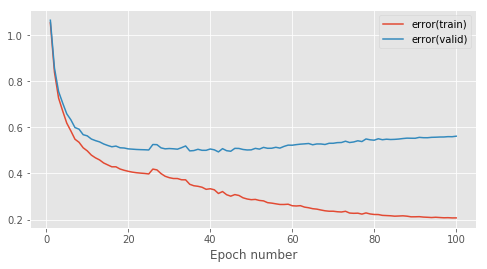

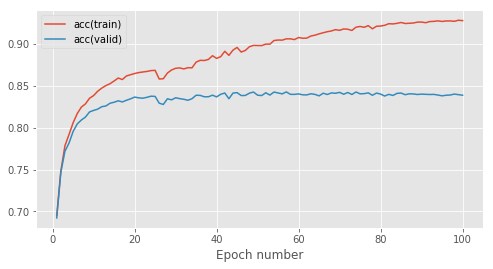

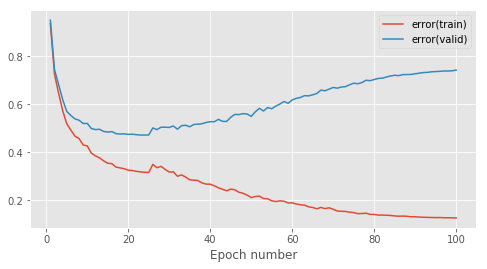

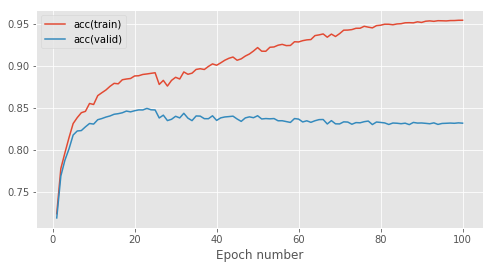

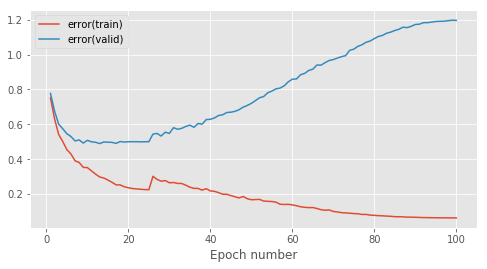

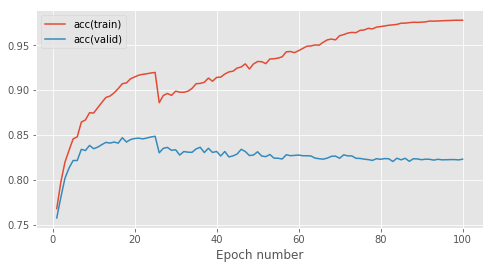

In [6]:
############## Adam With scheduler with specified restarts

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule,GradientDescentLearningRule,RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

#setup hyperparameters
learning_rate = 1e-4
# learning_ranges = [1.05,1.1,1.15,1.2]
learning_ranges = [3,5,10]
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

for learning_range in learning_ranges:
    

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    adam_scheduler_warm = CosineAnnealingWithWarmRestarts(0.001, 0.00001,
                                                       total_iters_per_period=5,
                                                       max_learning_rate_discount_factor=0.9,
                                                       period_iteration_expansion_factor=3)

    error = CrossEntropySoftmaxError() 

    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate)

    #Remember to use notebook=False when you write a script to be run in a terminal
    _ = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True,scheduler=adam_scheduler_special)